In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path = "experiment_results"
files = os.listdir(path)
X_datas = []
Y_datas = []
for file in files:
    full_path = os.path.join(path, file)
    X_datas.append(pd.read_excel(full_path, usecols=["H2O", "Gd(ClO4)3", "Ni-NMIDA", "NaOH", "UREA"]))
    Y_datas.append(pd.read_excel(full_path, usecols=["Crystal"]))
X = pd.concat([X_datas[0], X_datas[1]])
Y = pd.concat([Y_datas[0], Y_datas[1]])
for i in range(2,len(X_datas)):
    X = pd.concat([X, X_datas[i]])
    Y = pd.concat([Y, Y_datas[i]])
X = np.array(X)
Y = np.array(Y, dtype = bool)
Y = Y.T[0]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [4]:
data_train_num = []
data_test_num = []
for i in Y_train:
    data_train_num.append([i])
for i in Y_test:
    data_test_num.append([i])
Gd = [X.T[1].mean(), X.T[1].std()]
for i in range(len(X_train)):
    if X_train.T[1][i] < Gd[0] - Gd[1]:
        data_train_num[i].append(1)
    elif Gd[0] - Gd[1] < X_train.T[1][i] < Gd[0]:
        data_train_num[i].append(2)
    elif Gd[0] < X_train.T[1][i] < Gd[0] + Gd[1]:
        data_train_num[i].append(3)
    else:
        data_train_num[i].append(4)
for i in range(len(X_test)):
    if X_test.T[1][i] < Gd[0] - Gd[1]:
        data_test_num[i].append(1)
    elif Gd[0] - Gd[1] < X_test.T[1][i] < Gd[0]:
        data_test_num[i].append(2)
    elif Gd[0] < X_test.T[1][i] < Gd[0] + Gd[1]:
        data_test_num[i].append(3)
    else:
        data_test_num[i].append(4)

In [5]:
Ni_L = [X.T[2].mean(), X.T[2].std()]
for i in range(len(X_train)):
    if X_train.T[2][i] < Ni_L[0] - Ni_L[1]:
        data_train_num[i].append(1)
    elif Ni_L[0] - Ni_L[1] < X_train.T[2][i] < Ni_L[0]:
        data_train_num[i].append(2)
    elif Ni_L[0] < X_train.T[2][i] < Ni_L[0] + Ni_L[1]:
        data_train_num[i].append(3)
    else:
        data_train_num[i].append(4)
for i in range(len(X_test)):
    if X_test.T[2][i] < Ni_L[0] - Ni_L[1]:
        data_test_num[i].append(1)
    elif Ni_L[0] - Ni_L[1] < X_test.T[2][i] < Ni_L[0]:
        data_test_num[i].append(2)
    elif Ni_L[0] < X_test.T[2][i] < Ni_L[0] + Ni_L[1]:
        data_test_num[i].append(3)
    else:
        data_test_num[i].append(4)

In [6]:
train_class_all = np.zeros([4,4])
for i in range(len(data_train_num)):
    m = data_train_num[i][1] -1
    n = data_train_num[i][2] -1
    train_class_all[m][n] += 1 
print(train_class_all)

[[30. 49. 22. 24.]
 [23. 68. 50. 38.]
 [33. 68. 58. 52.]
 [23. 39. 23. 24.]]


In [7]:
test_class_all = np.zeros([4,4])
for i in range(len(data_test_num)):
    m = data_test_num[i][1] -1
    n = data_test_num[i][2] -1
    test_class_all[m][n] += 1 
print(test_class_all)

[[ 6. 12.  6.  1.]
 [ 6. 21. 13.  9.]
 [ 4. 15. 19. 14.]
 [ 7.  9.  8.  6.]]


In [8]:
train_class_true = np.zeros([4,4])
for i in range(len(data_train_num)):
    if data_train_num[i][0] == 1:
        m = data_train_num[i][1] -1
        n = data_train_num[i][2] -1
        train_class_true[m][n] += 1 
print(train_class_true)

[[ 1. 10.  5.  7.]
 [ 2. 18. 17. 12.]
 [ 1. 19. 15. 22.]
 [ 2.  6.  4.  2.]]


LS 1 1
X_real: [False  True False False False False]
X_pre: [False False False False False False]
confusion_matrix: [[5 0]
 [1 0]]
RF 1 1
X_real: [False  True False False False False]
X_pre: [False False False False False False]
confusion_matrix: [[5 0]
 [1 0]]
LS 1 2
X_real: [False False False False  True False False False  True False False False]
X_pre: [False False False False  True False False False False False  True False]
confusion_matrix: [[9 1]
 [1 1]]
RF 1 2
X_real: [False False False False  True False False False  True False False False]
X_pre: [False False False False False False False False False False False False]
confusion_matrix: [[10  0]
 [ 2  0]]
LS 1 3
X_real: [False False False False False False]
X_pre: [False False False False False  True]
confusion_matrix: [[5 1]
 [0 0]]
RF 1 3
X_real: [False False False False False False]
X_pre: [False False False False False False]
confusion_matrix: [[6]]
LS 1 4
X_real: [False]
X_pre: [False]
confusion_matrix: [[1]]
RF 1 4
X_real

C:\Users\14241\AppData\Local\Temp\ipykernel_30300\140171264.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(7.2,6), dpi=300)


LS 3 3
X_real: [False False  True  True False False  True False  True False  True False
 False False False False  True False  True]
X_pre: [False False False False False False False False  True False False False
 False False False False False False False]
confusion_matrix: [[12  0]
 [ 6  1]]
RF 3 3
X_real: [False False  True  True False False  True False  True False  True False
 False False False False  True False  True]
X_pre: [False False False  True False False False  True  True False False False
 False False False False  True  True False]
confusion_matrix: [[10  2]
 [ 4  3]]
LS 3 4
X_real: [False False False False False False False False False False False  True
  True False]
X_pre: [False False  True False False False  True  True False False False  True
  True  True]
confusion_matrix: [[8 4]
 [0 2]]
RF 3 4
X_real: [False False False False False False False False False False False  True
  True False]
X_pre: [False False False False False False False  True False False False False
  T

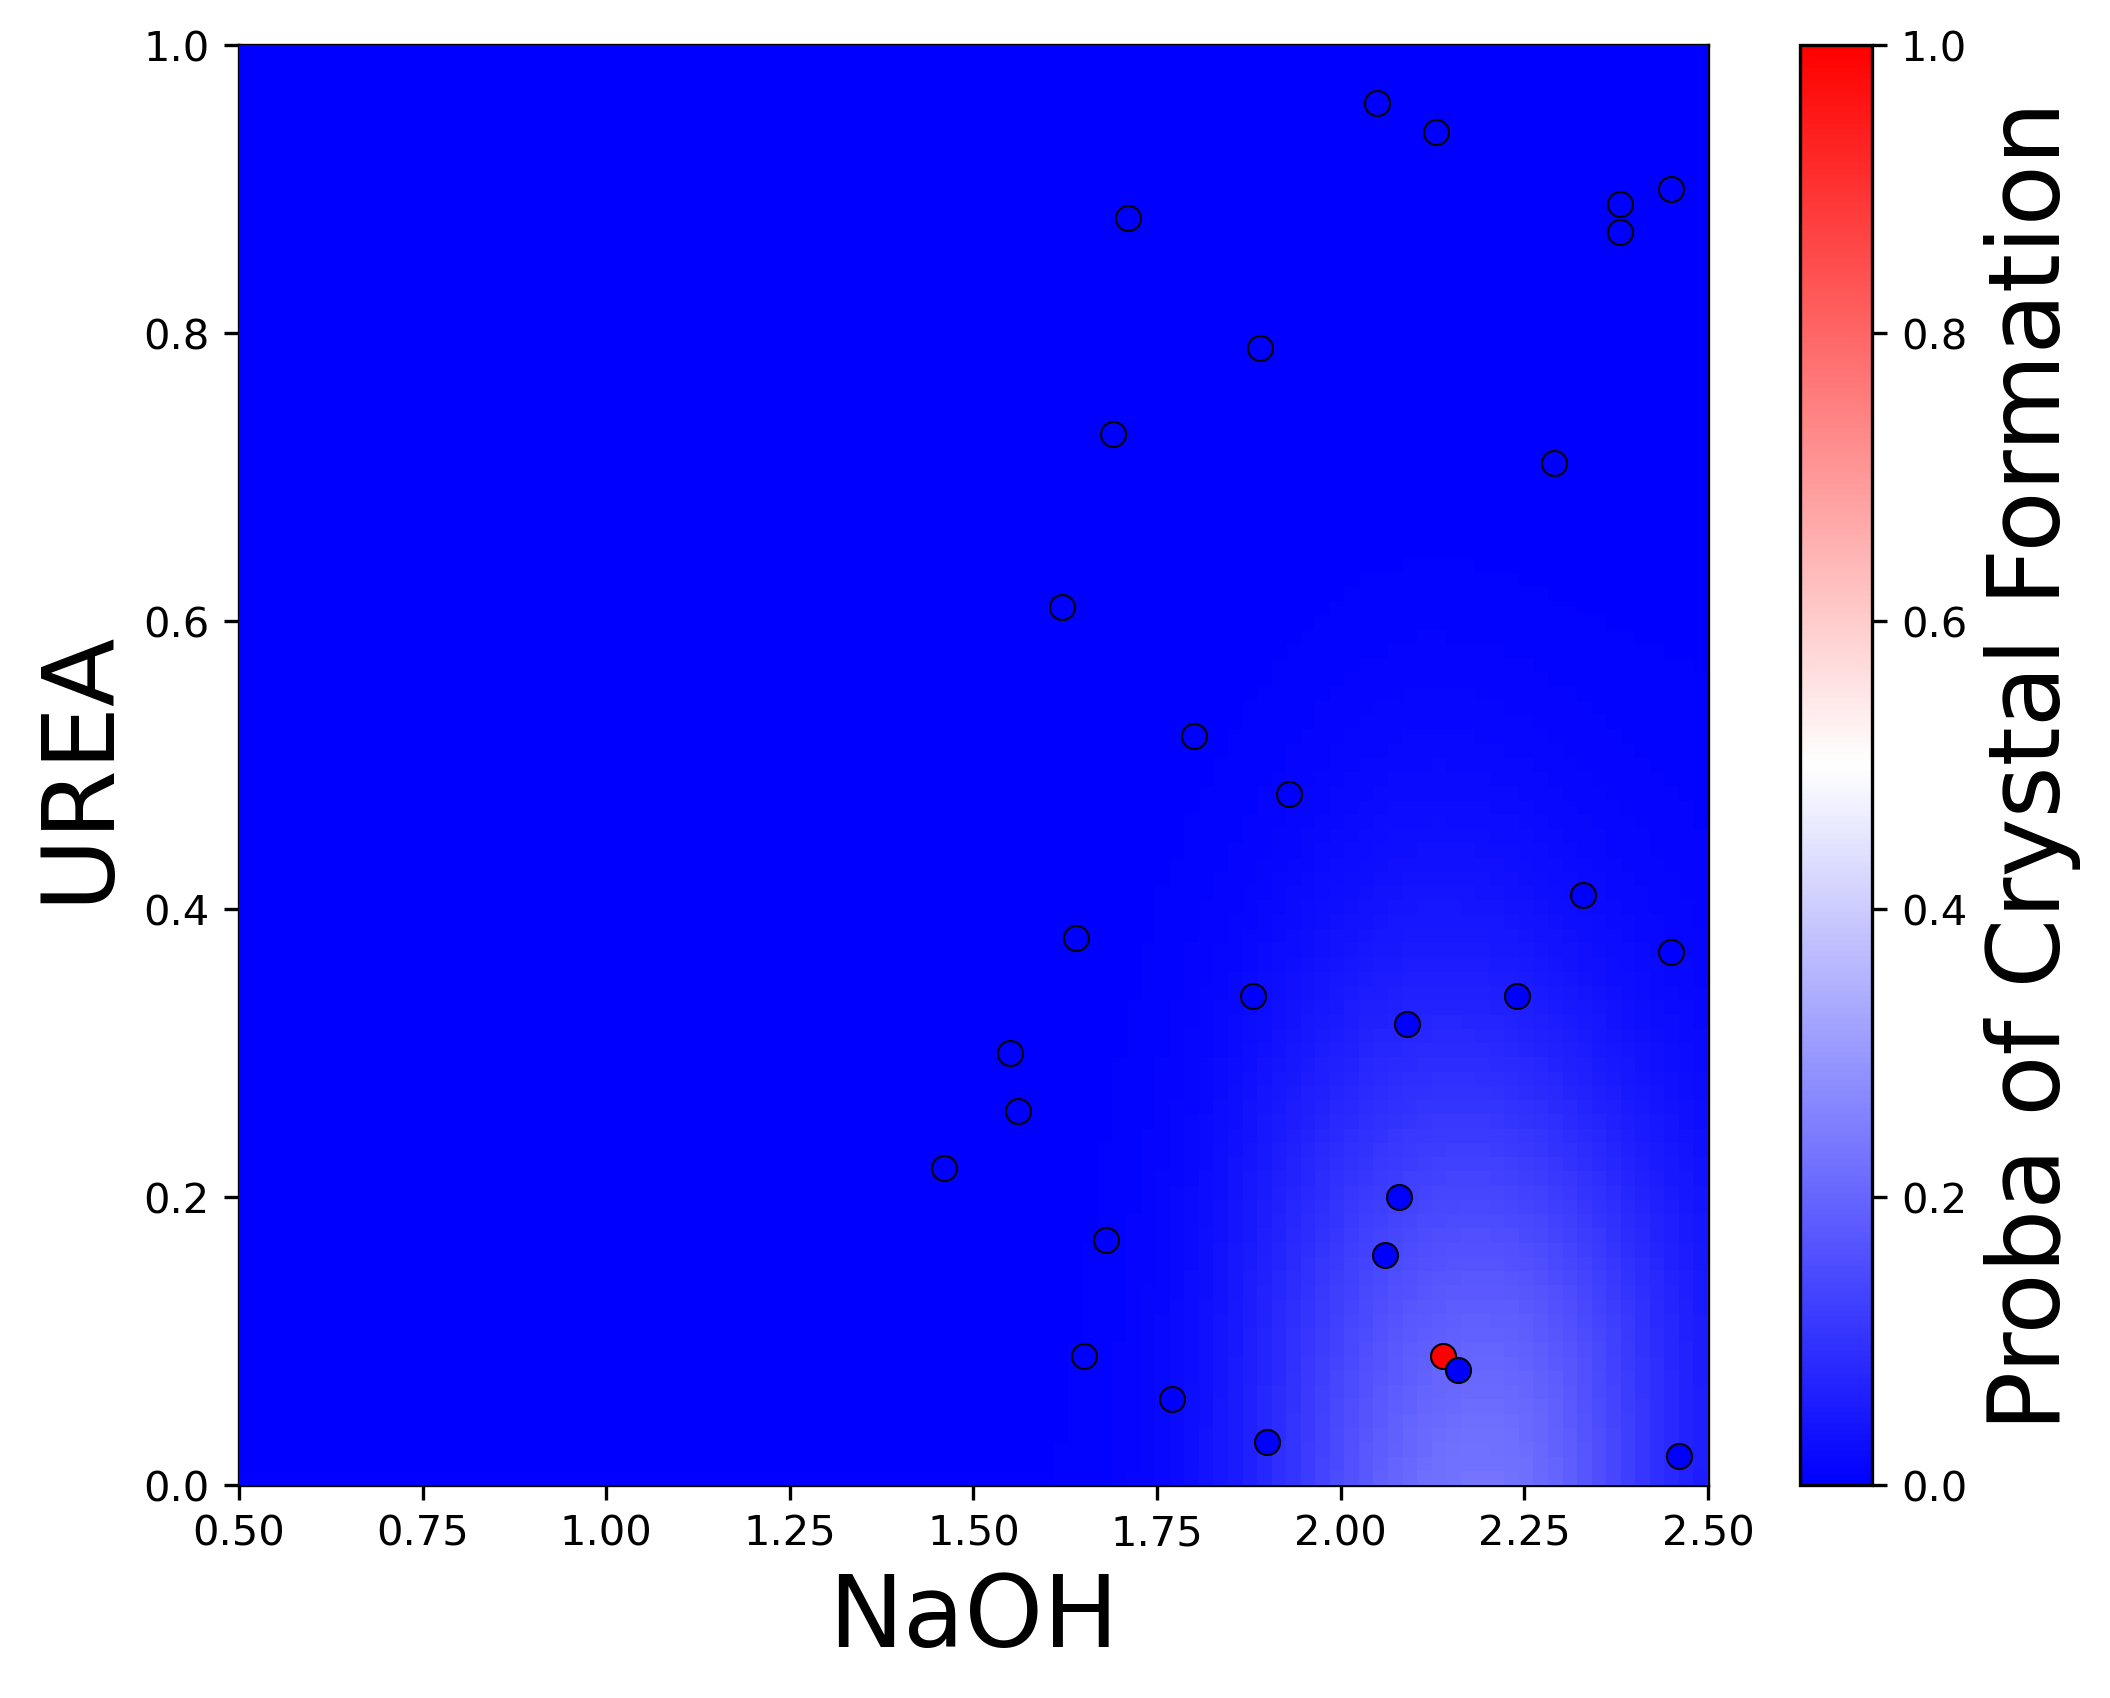

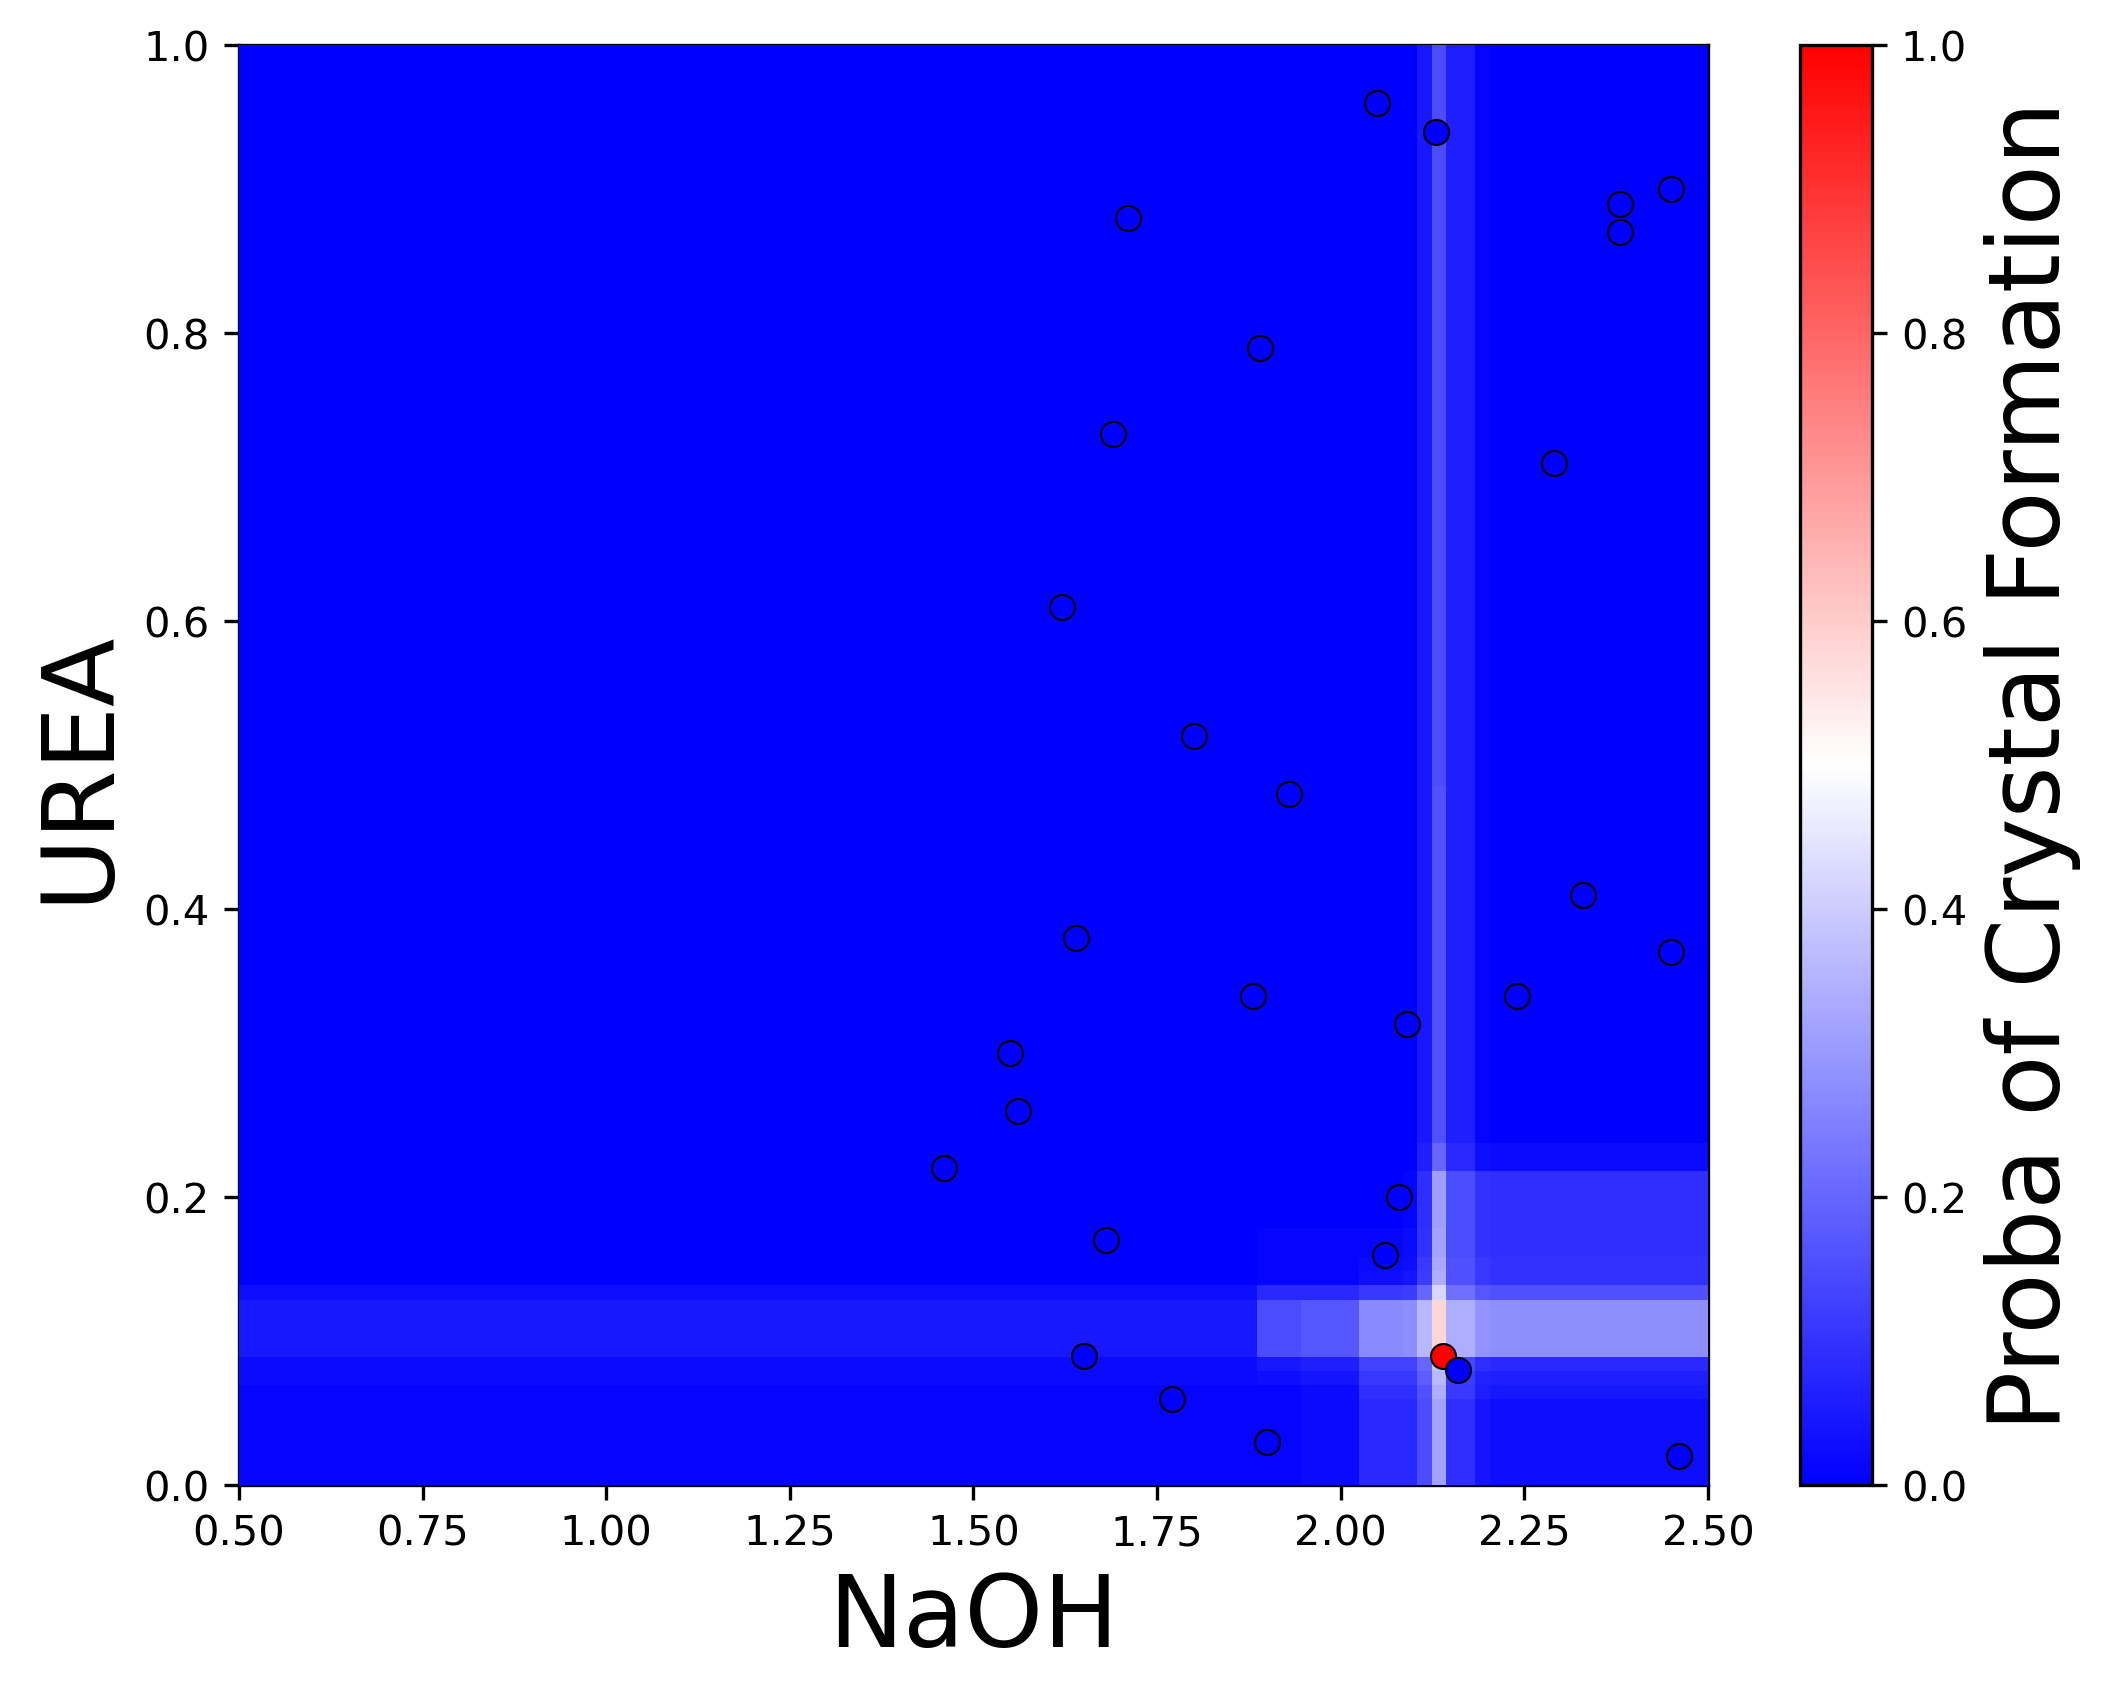

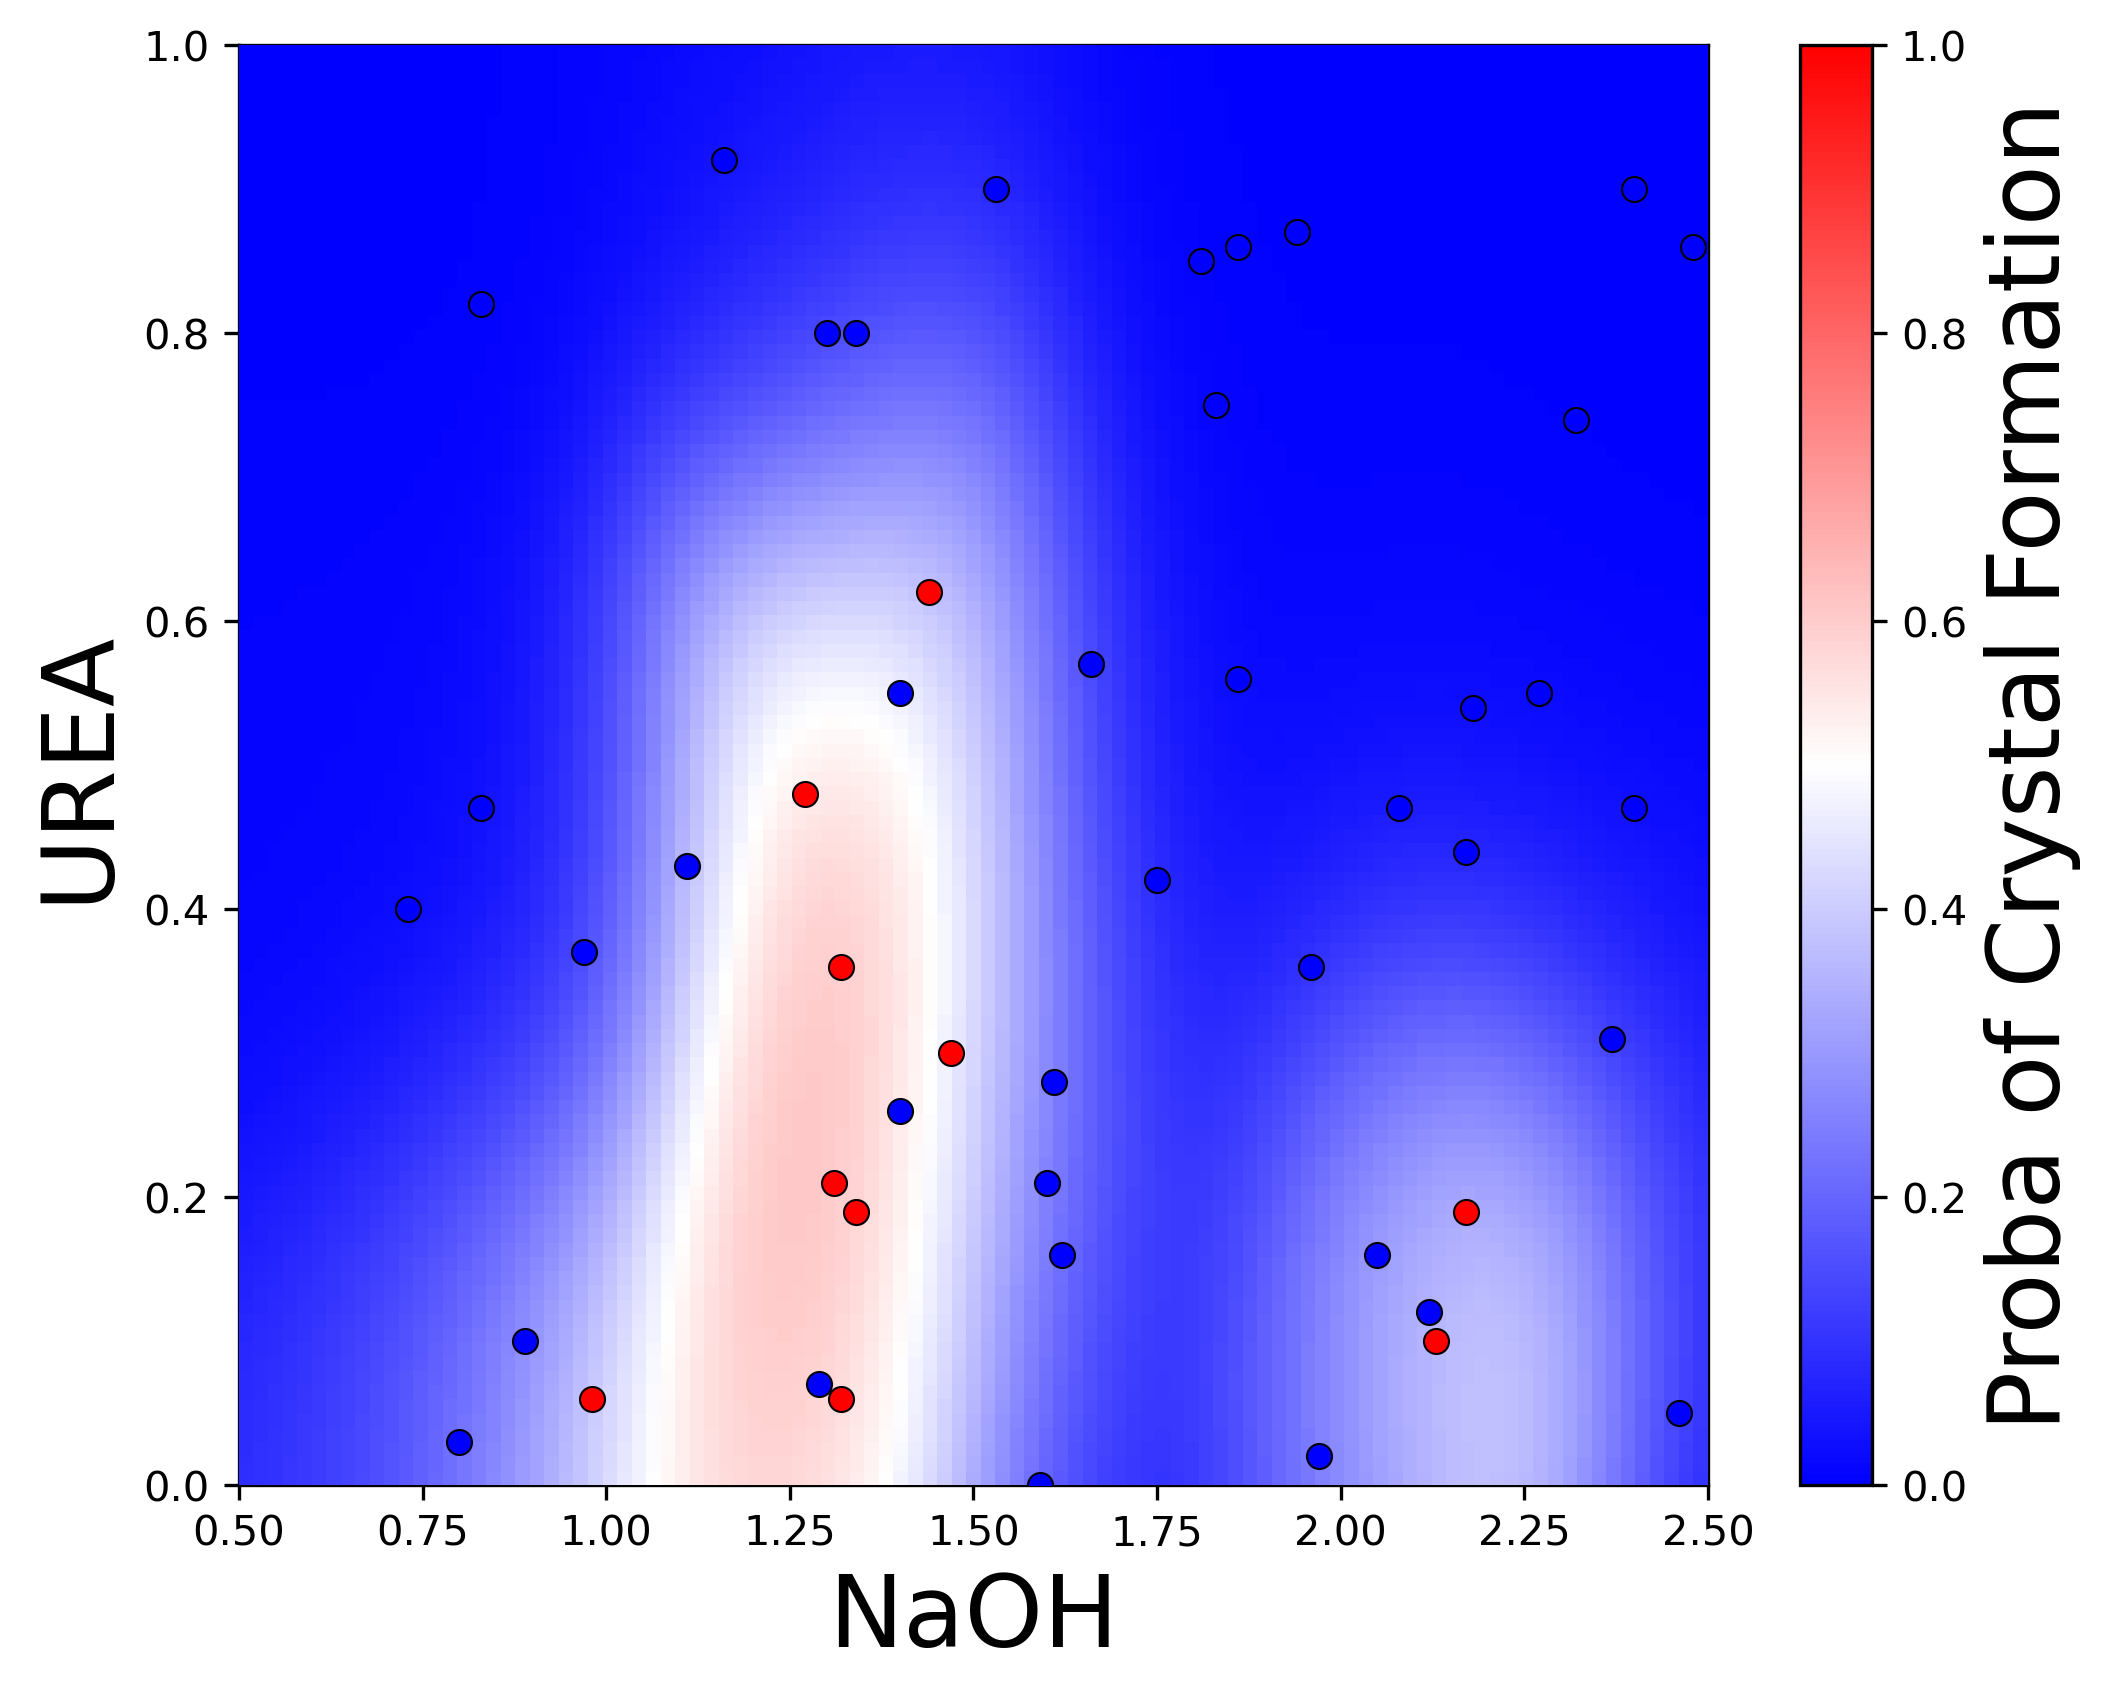

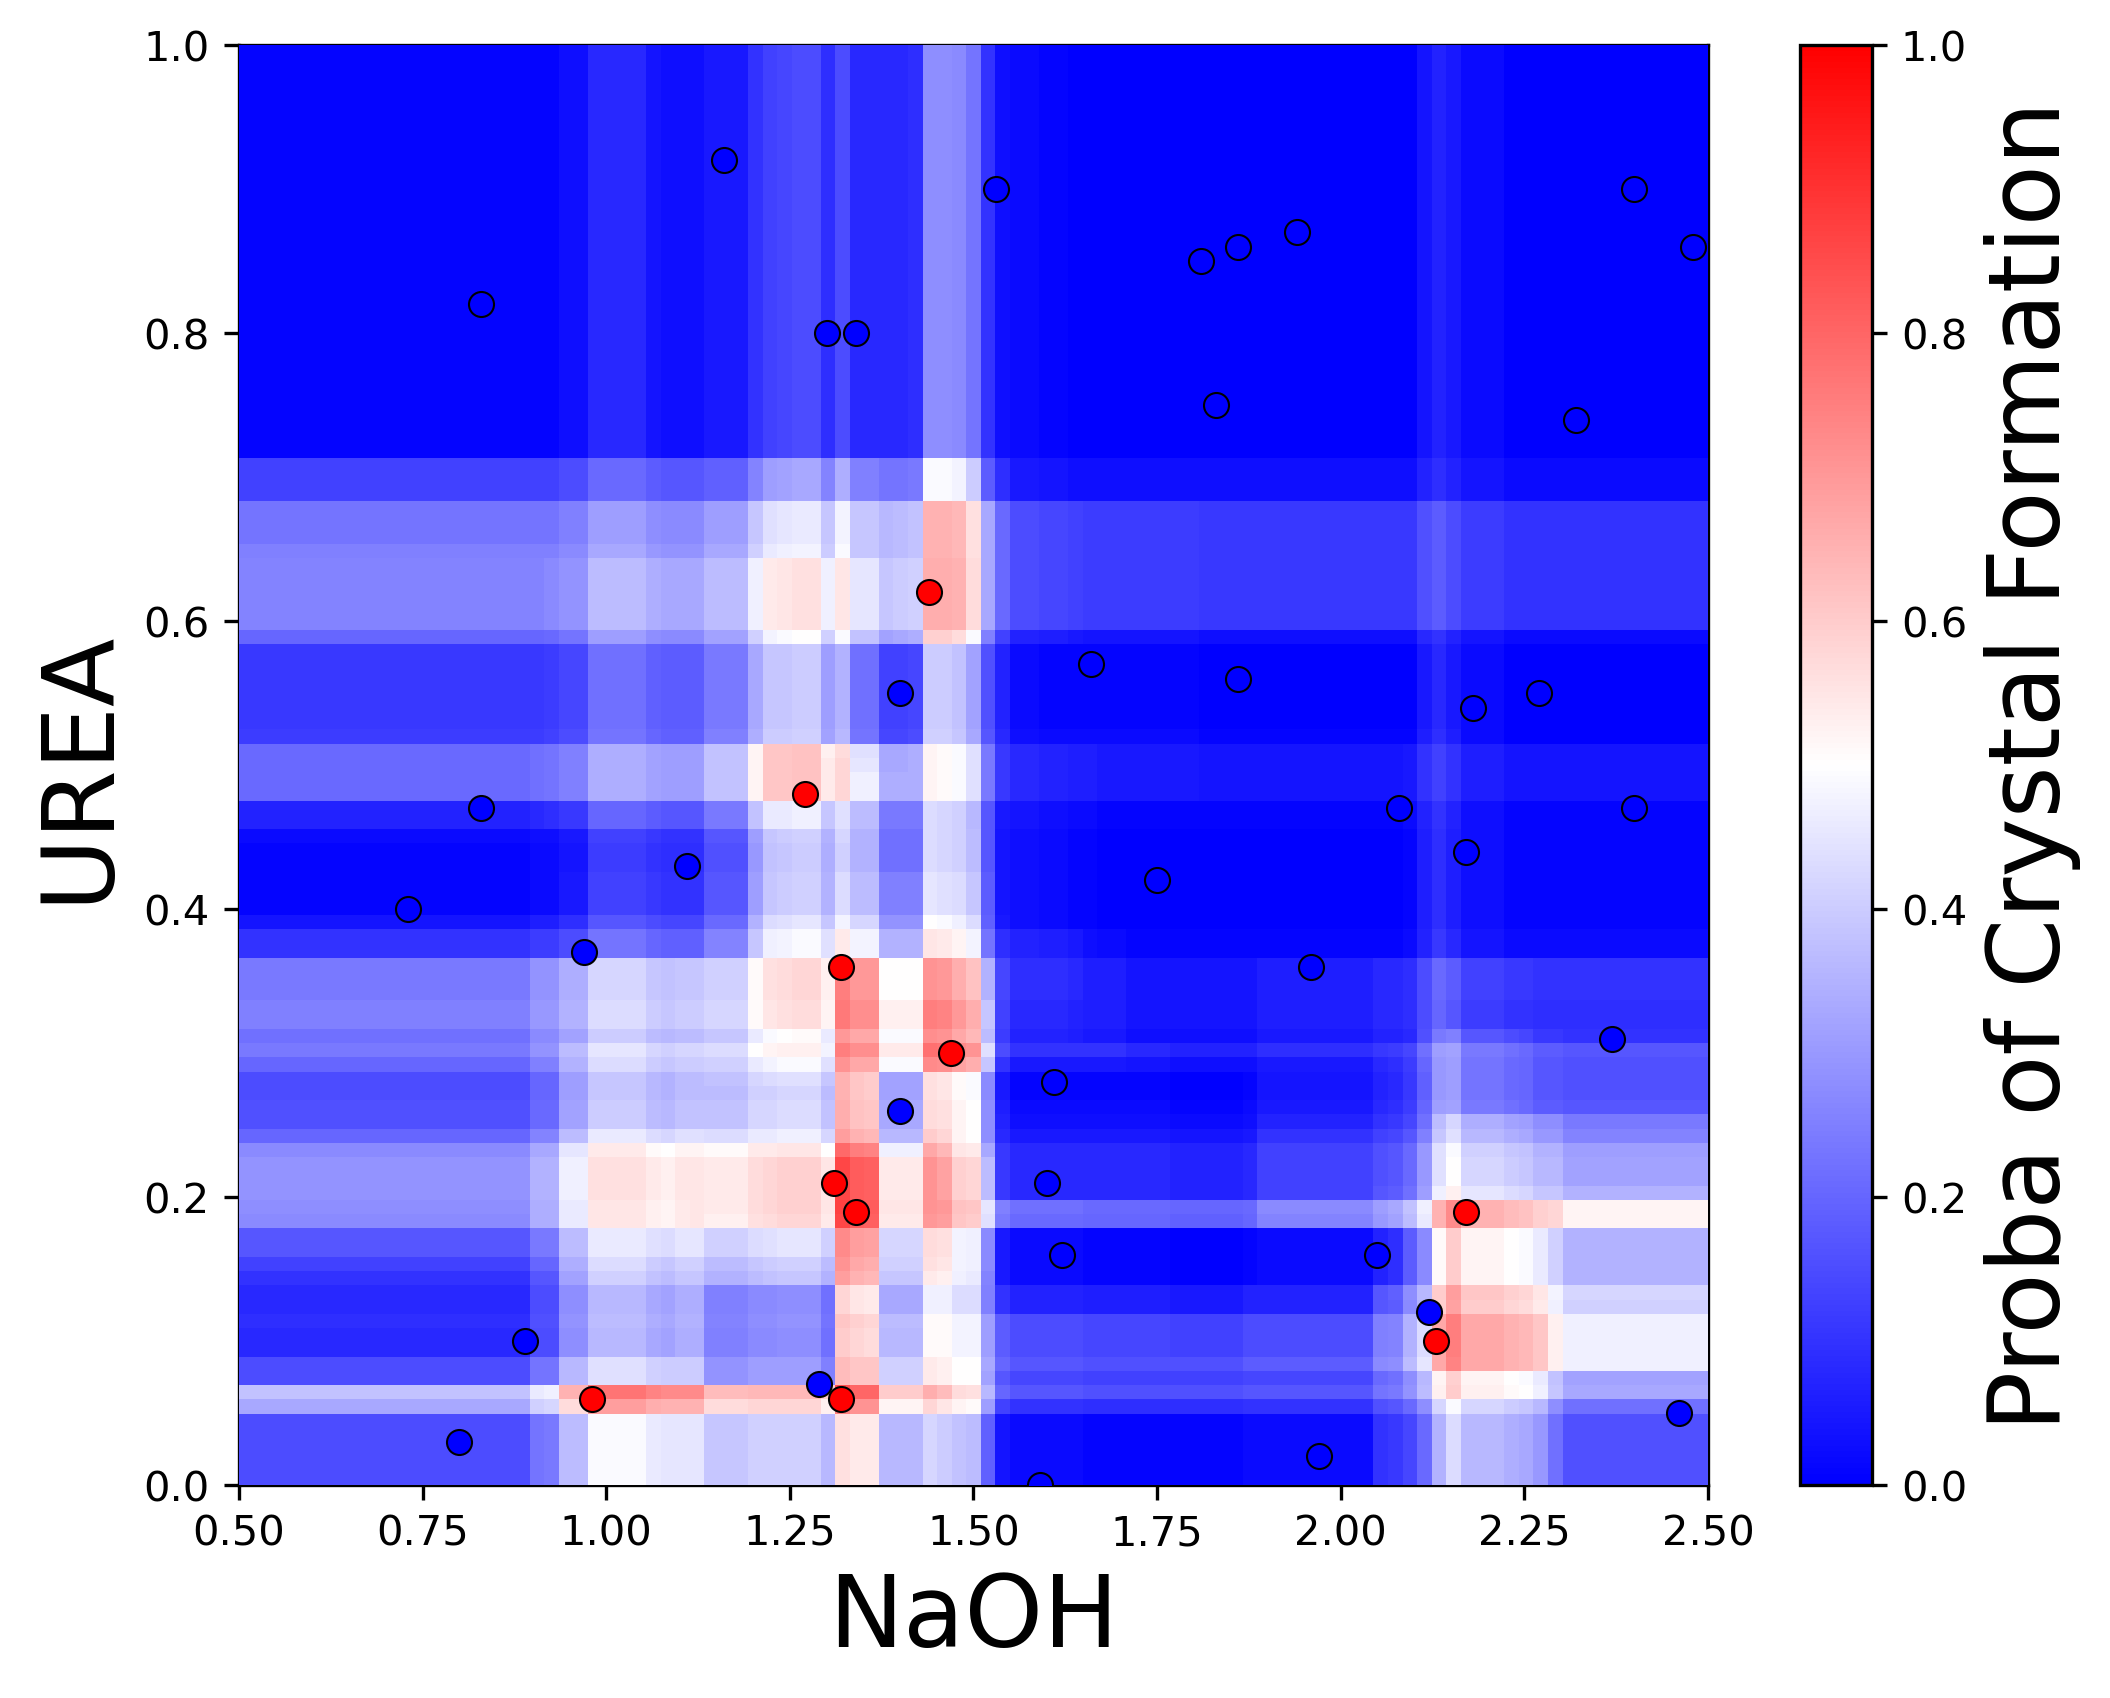

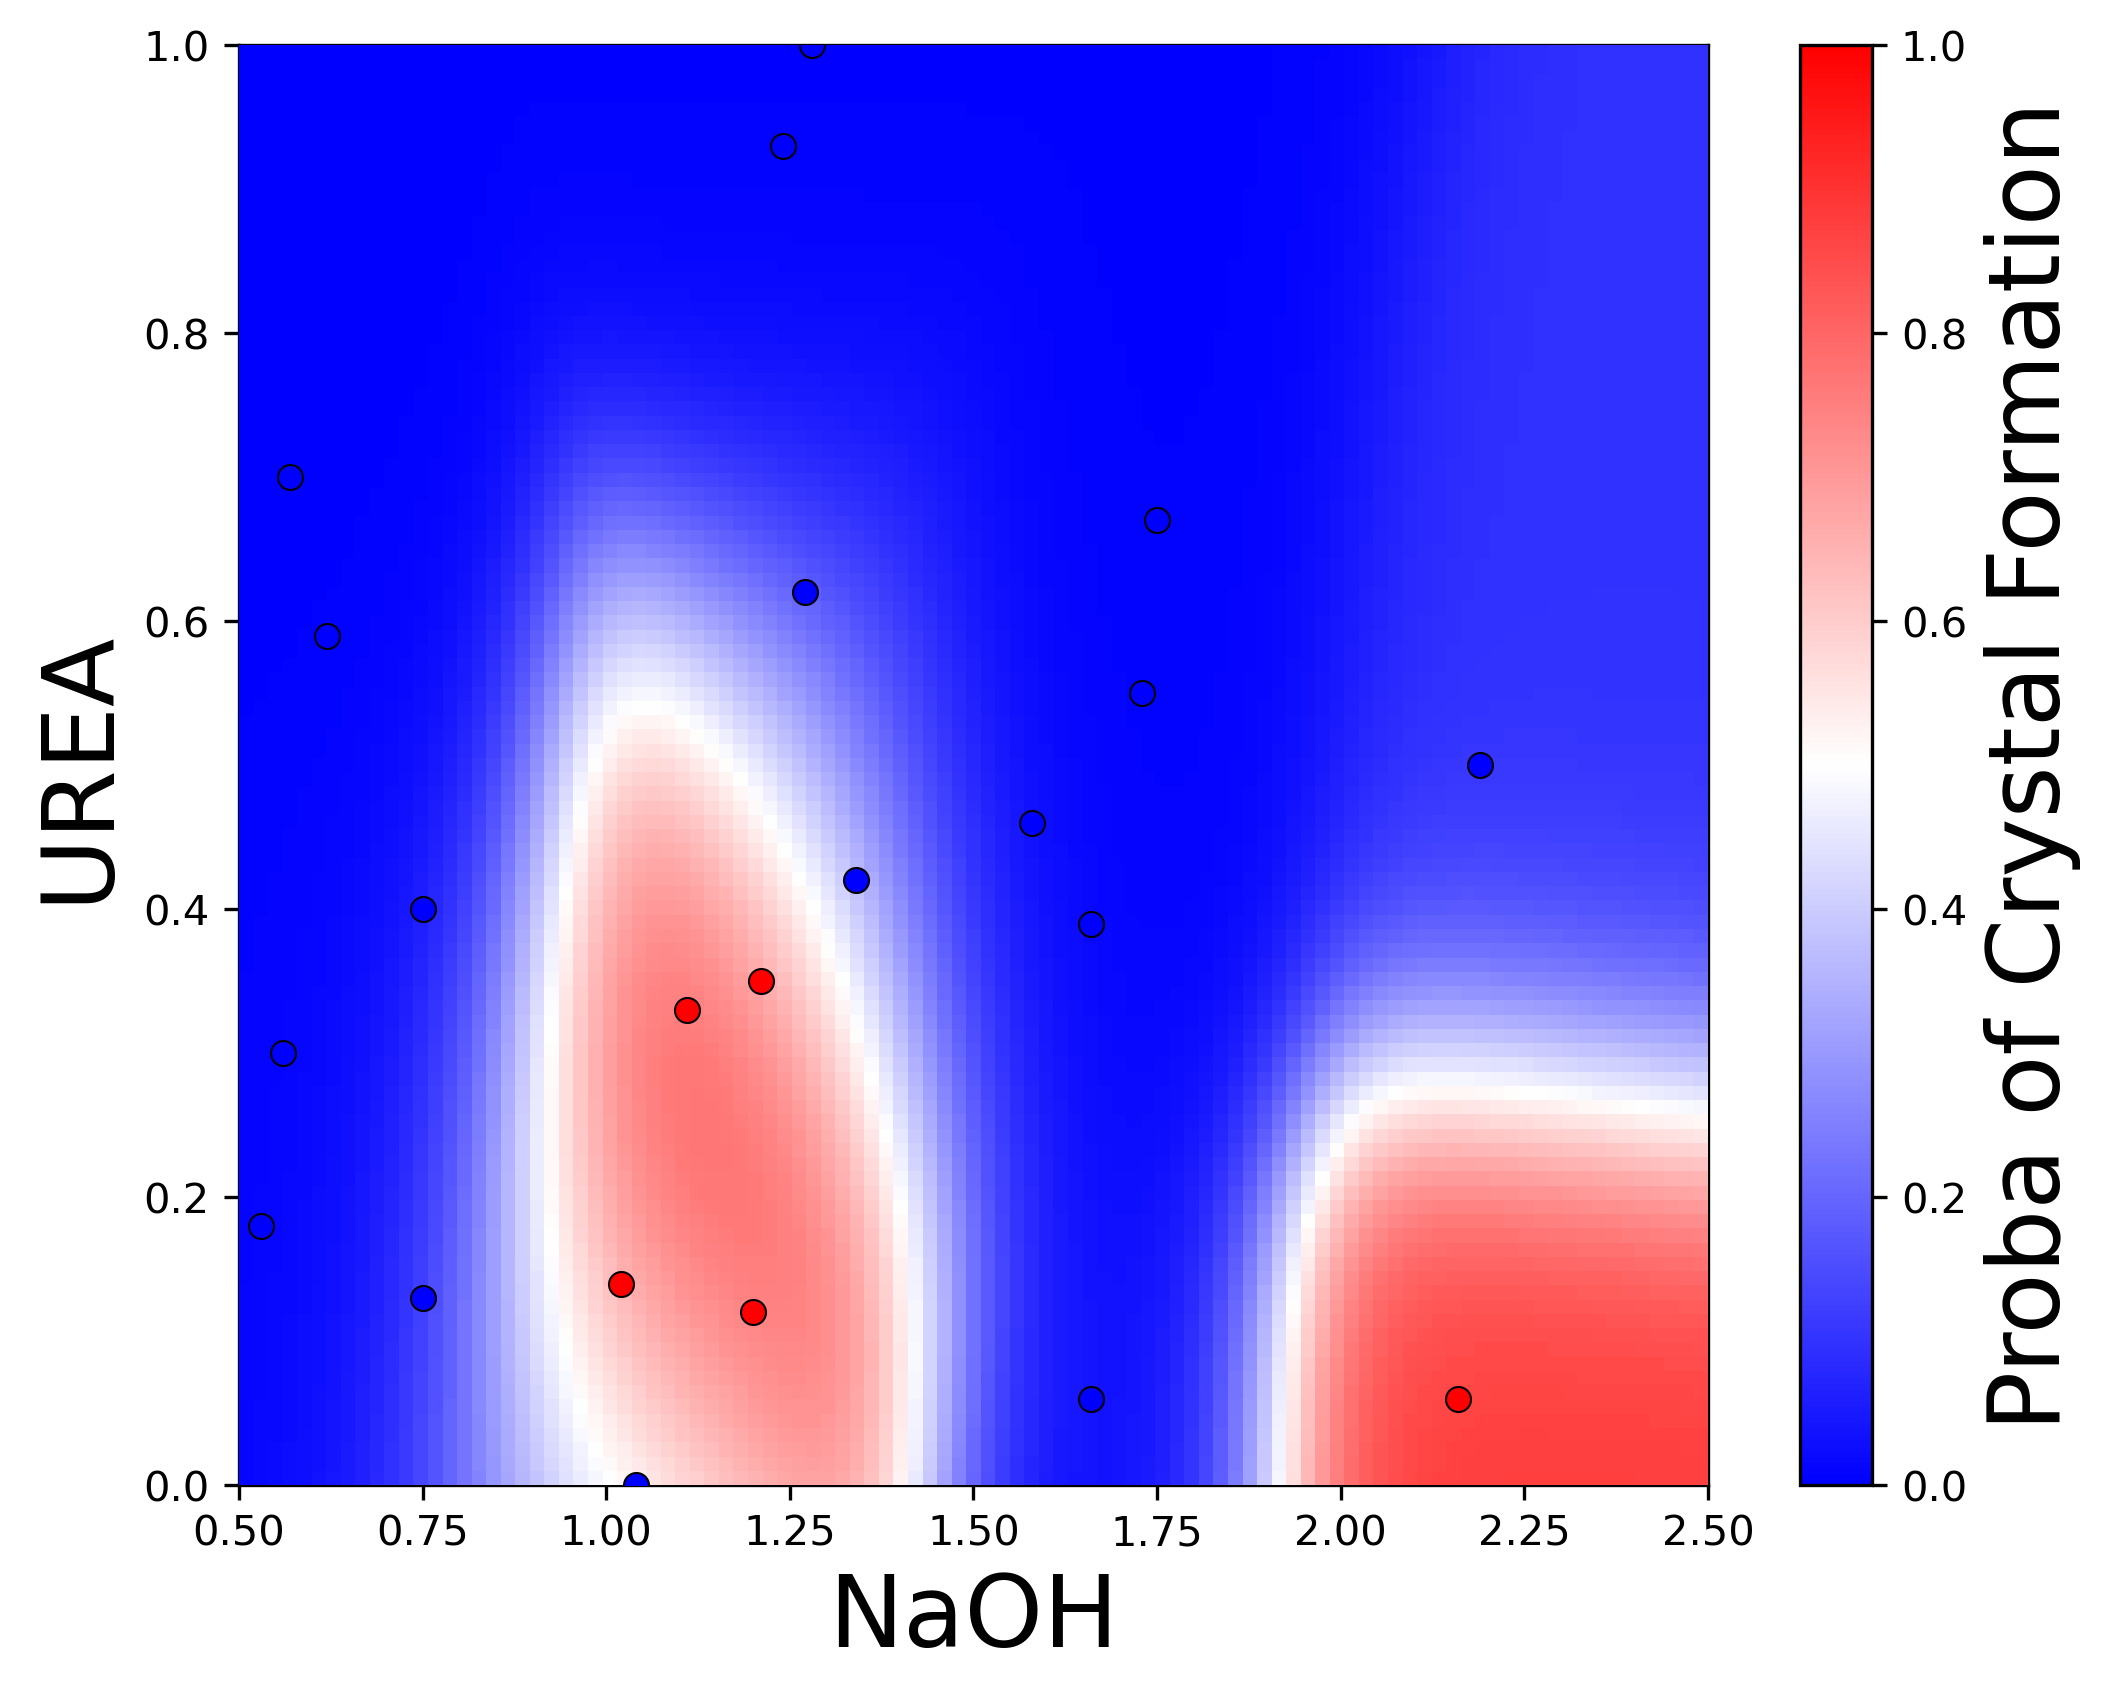

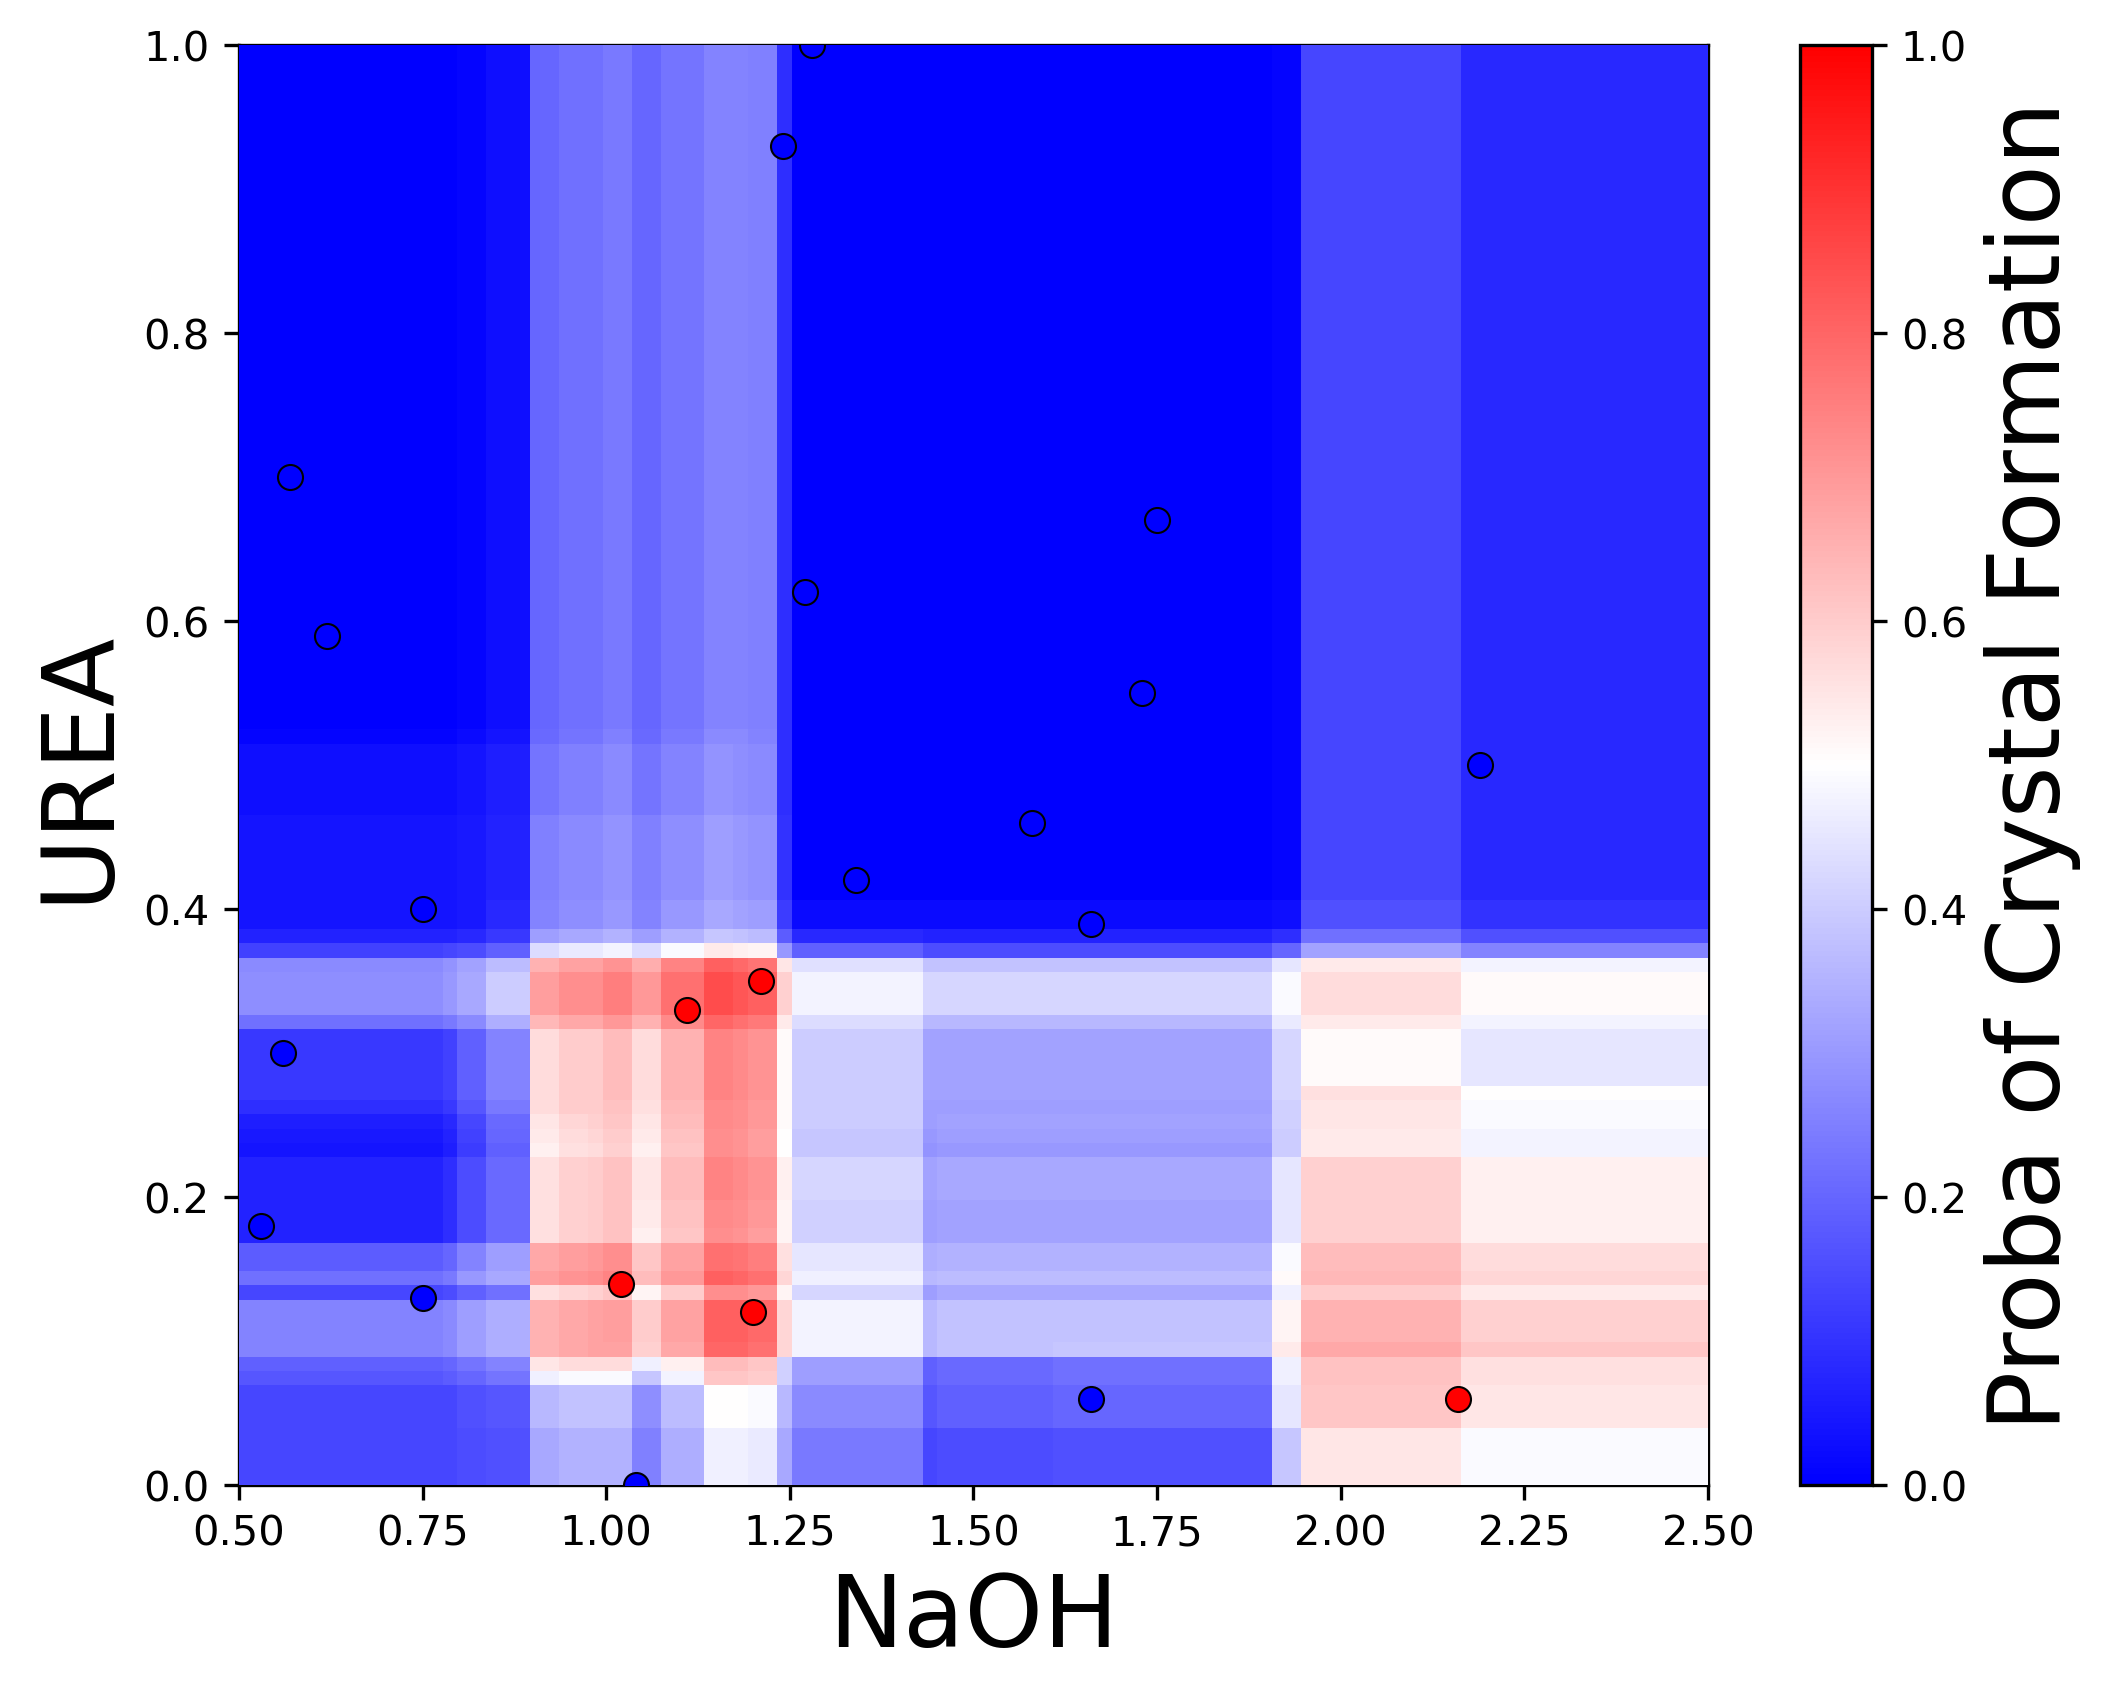

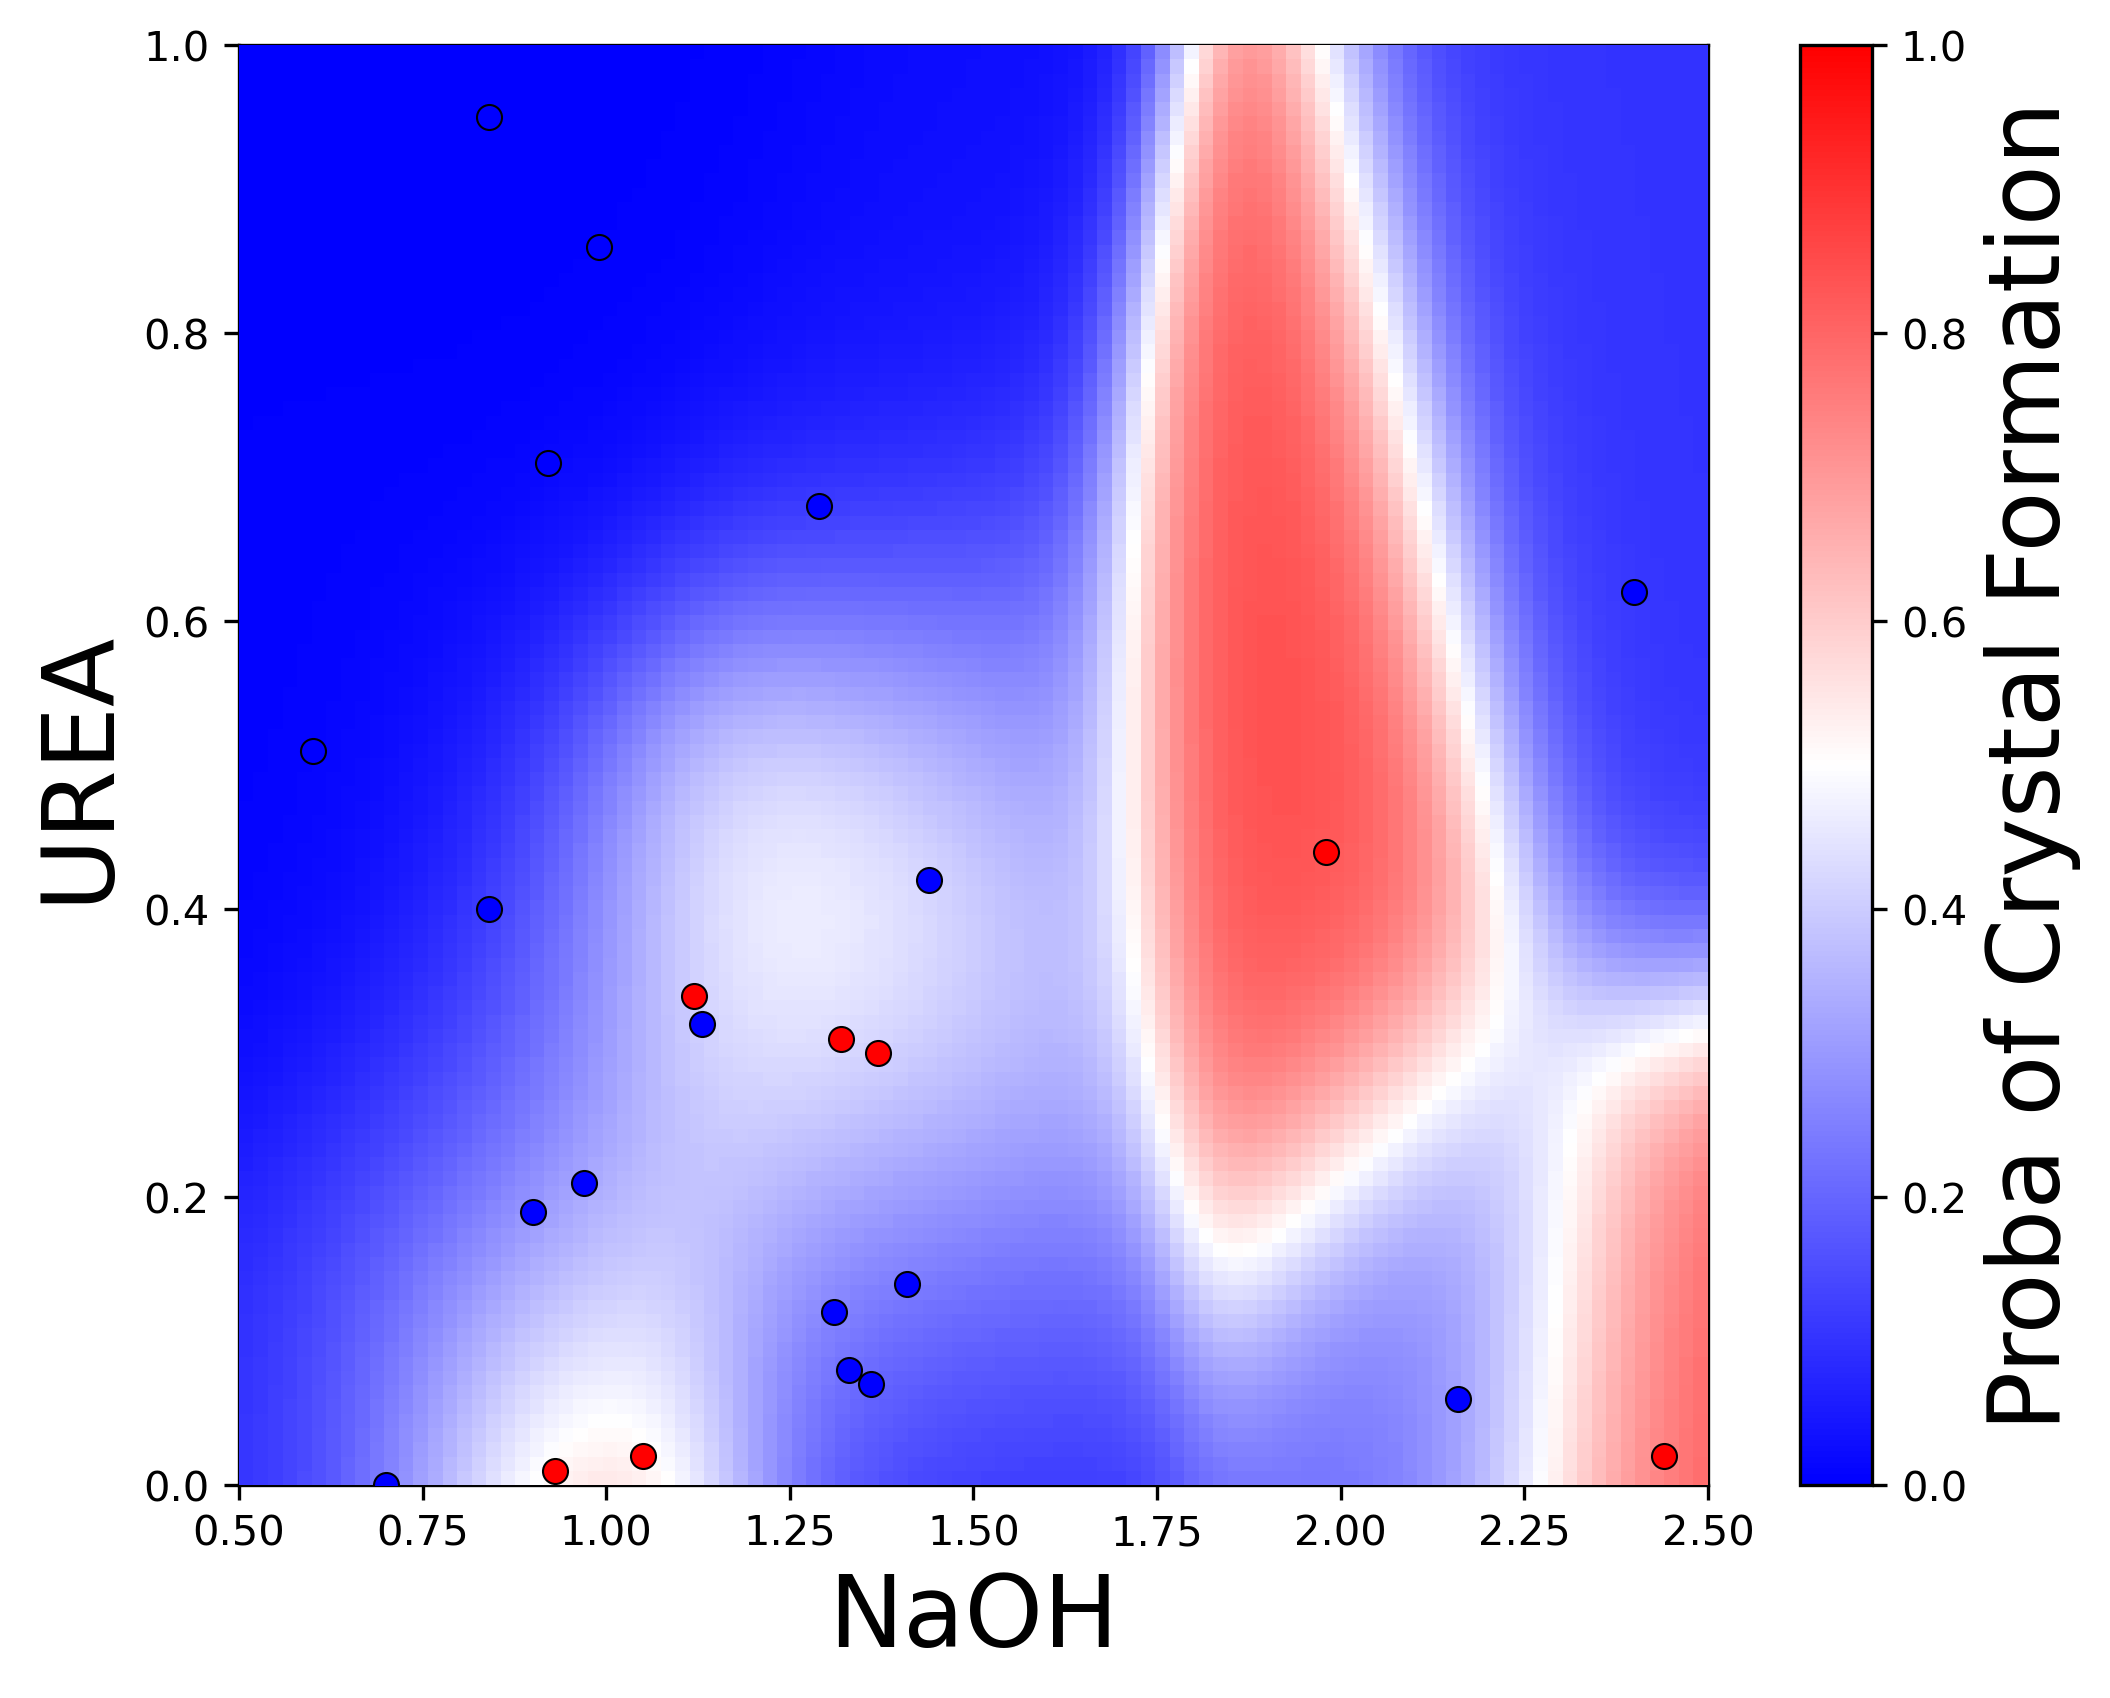

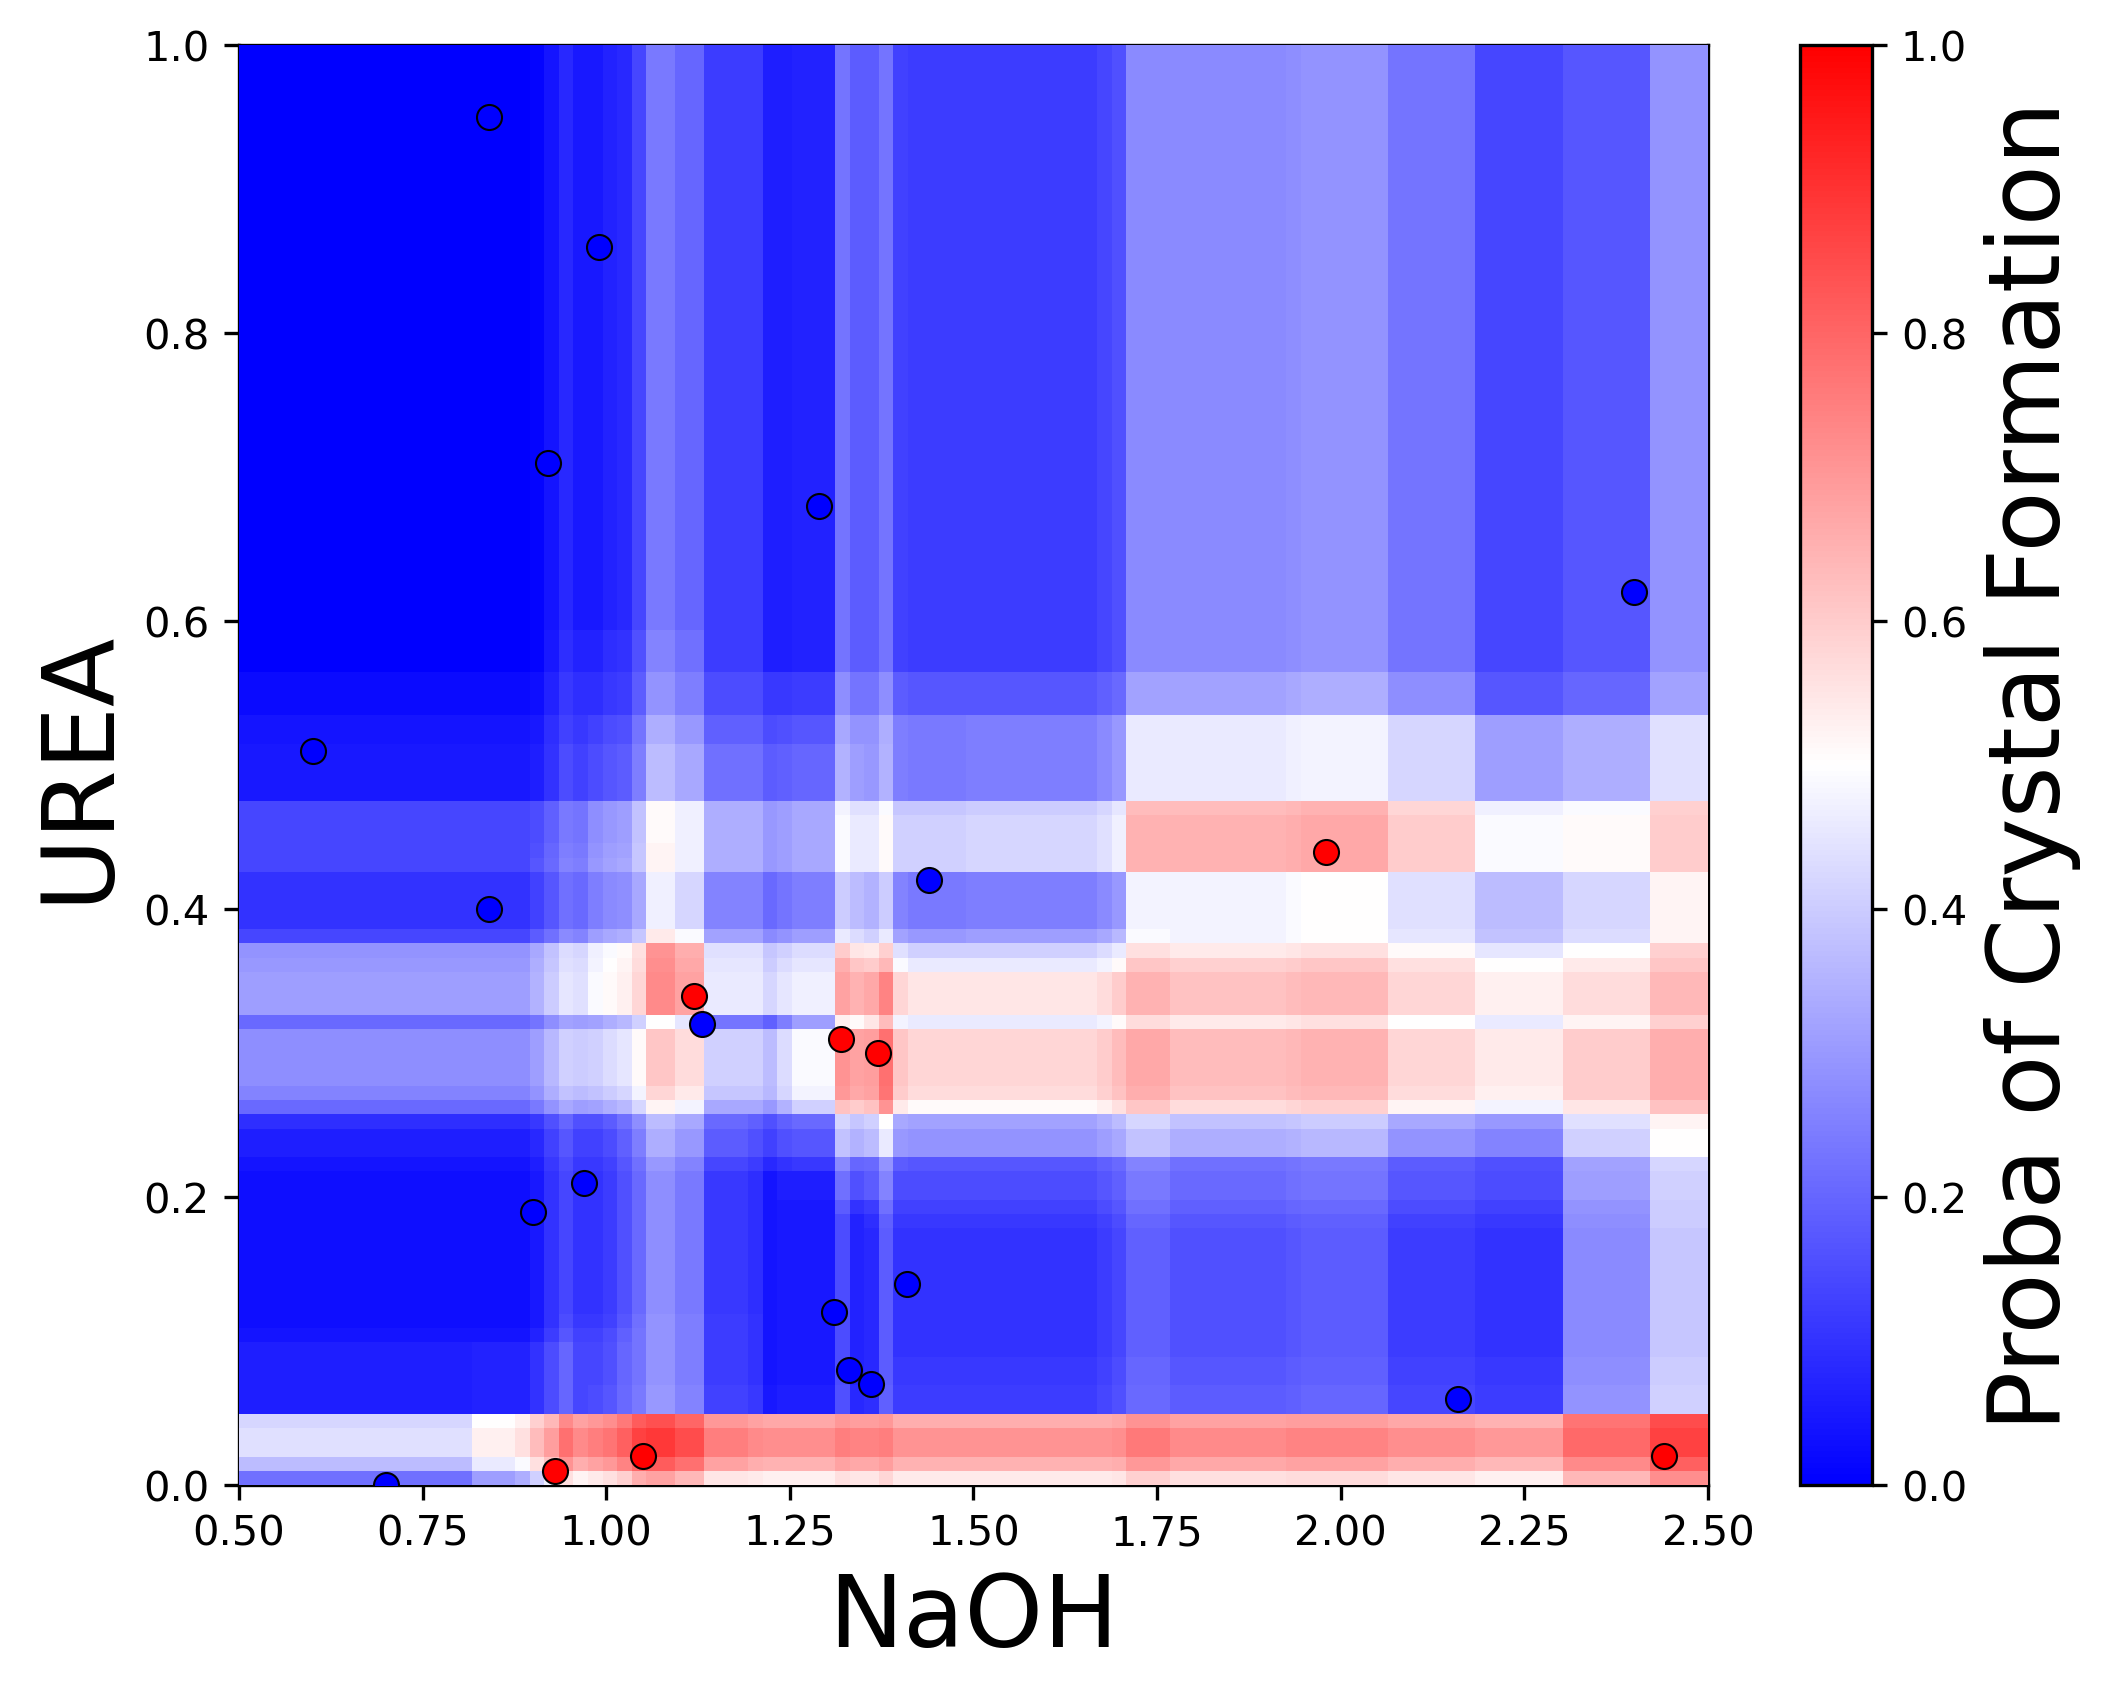

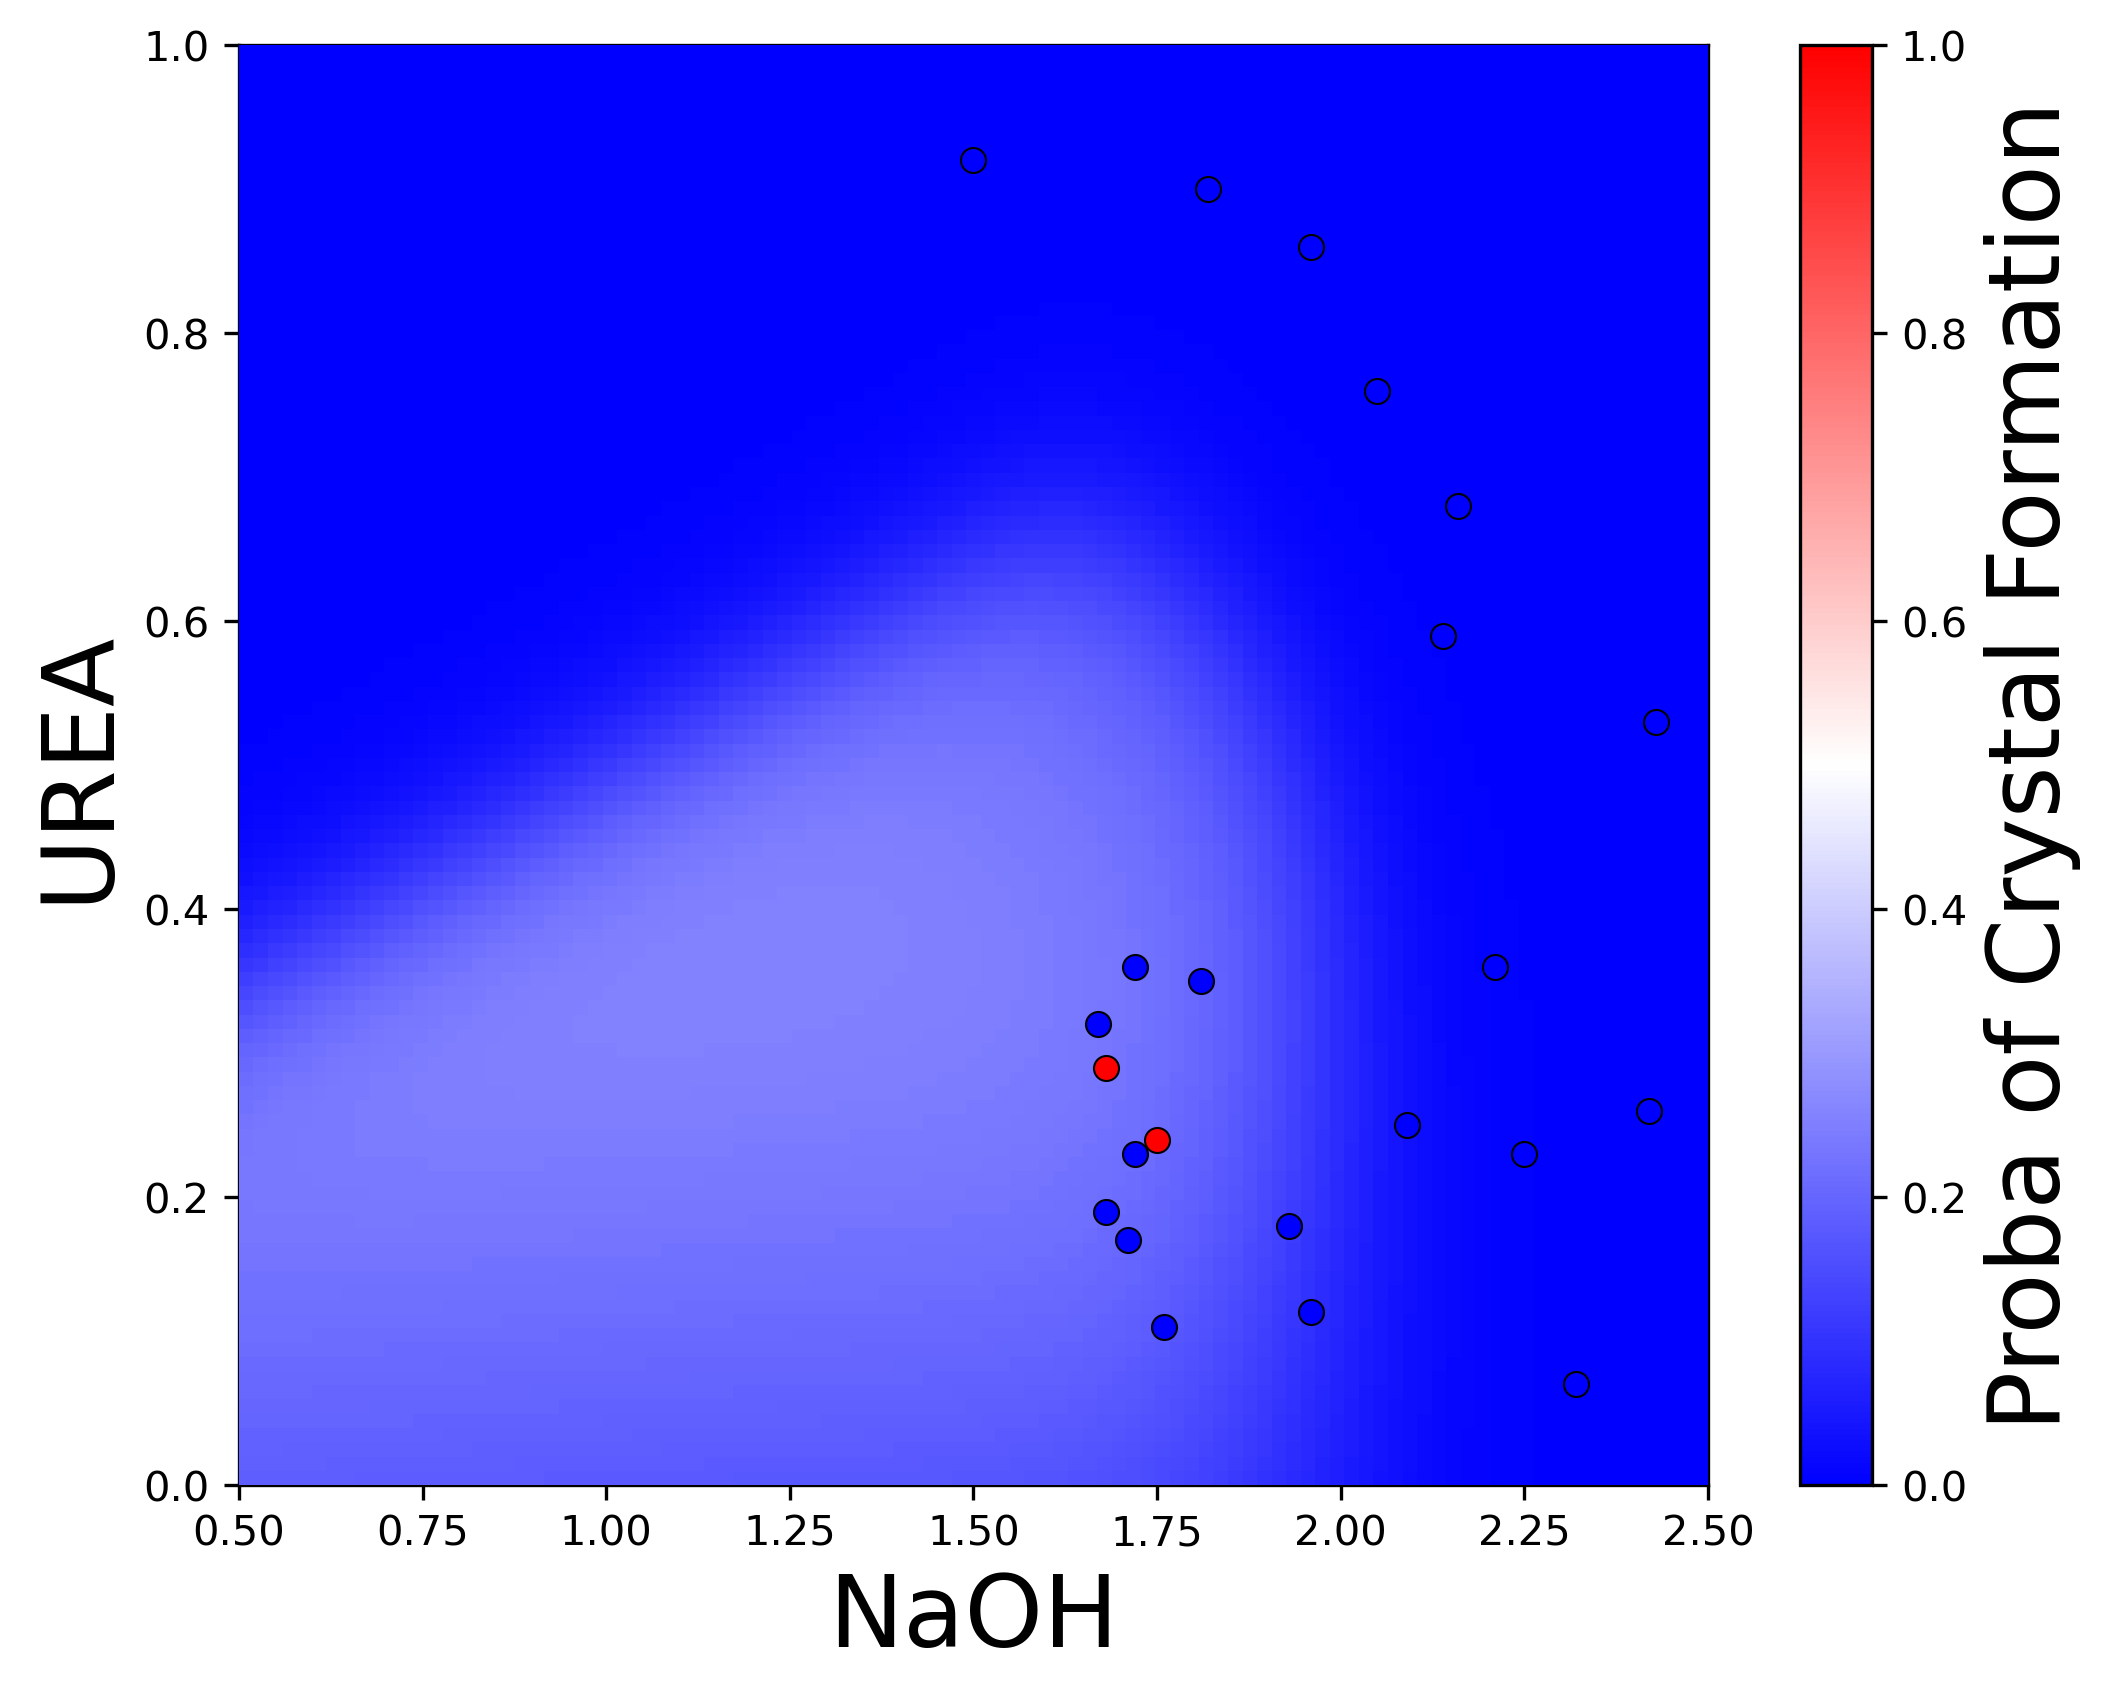

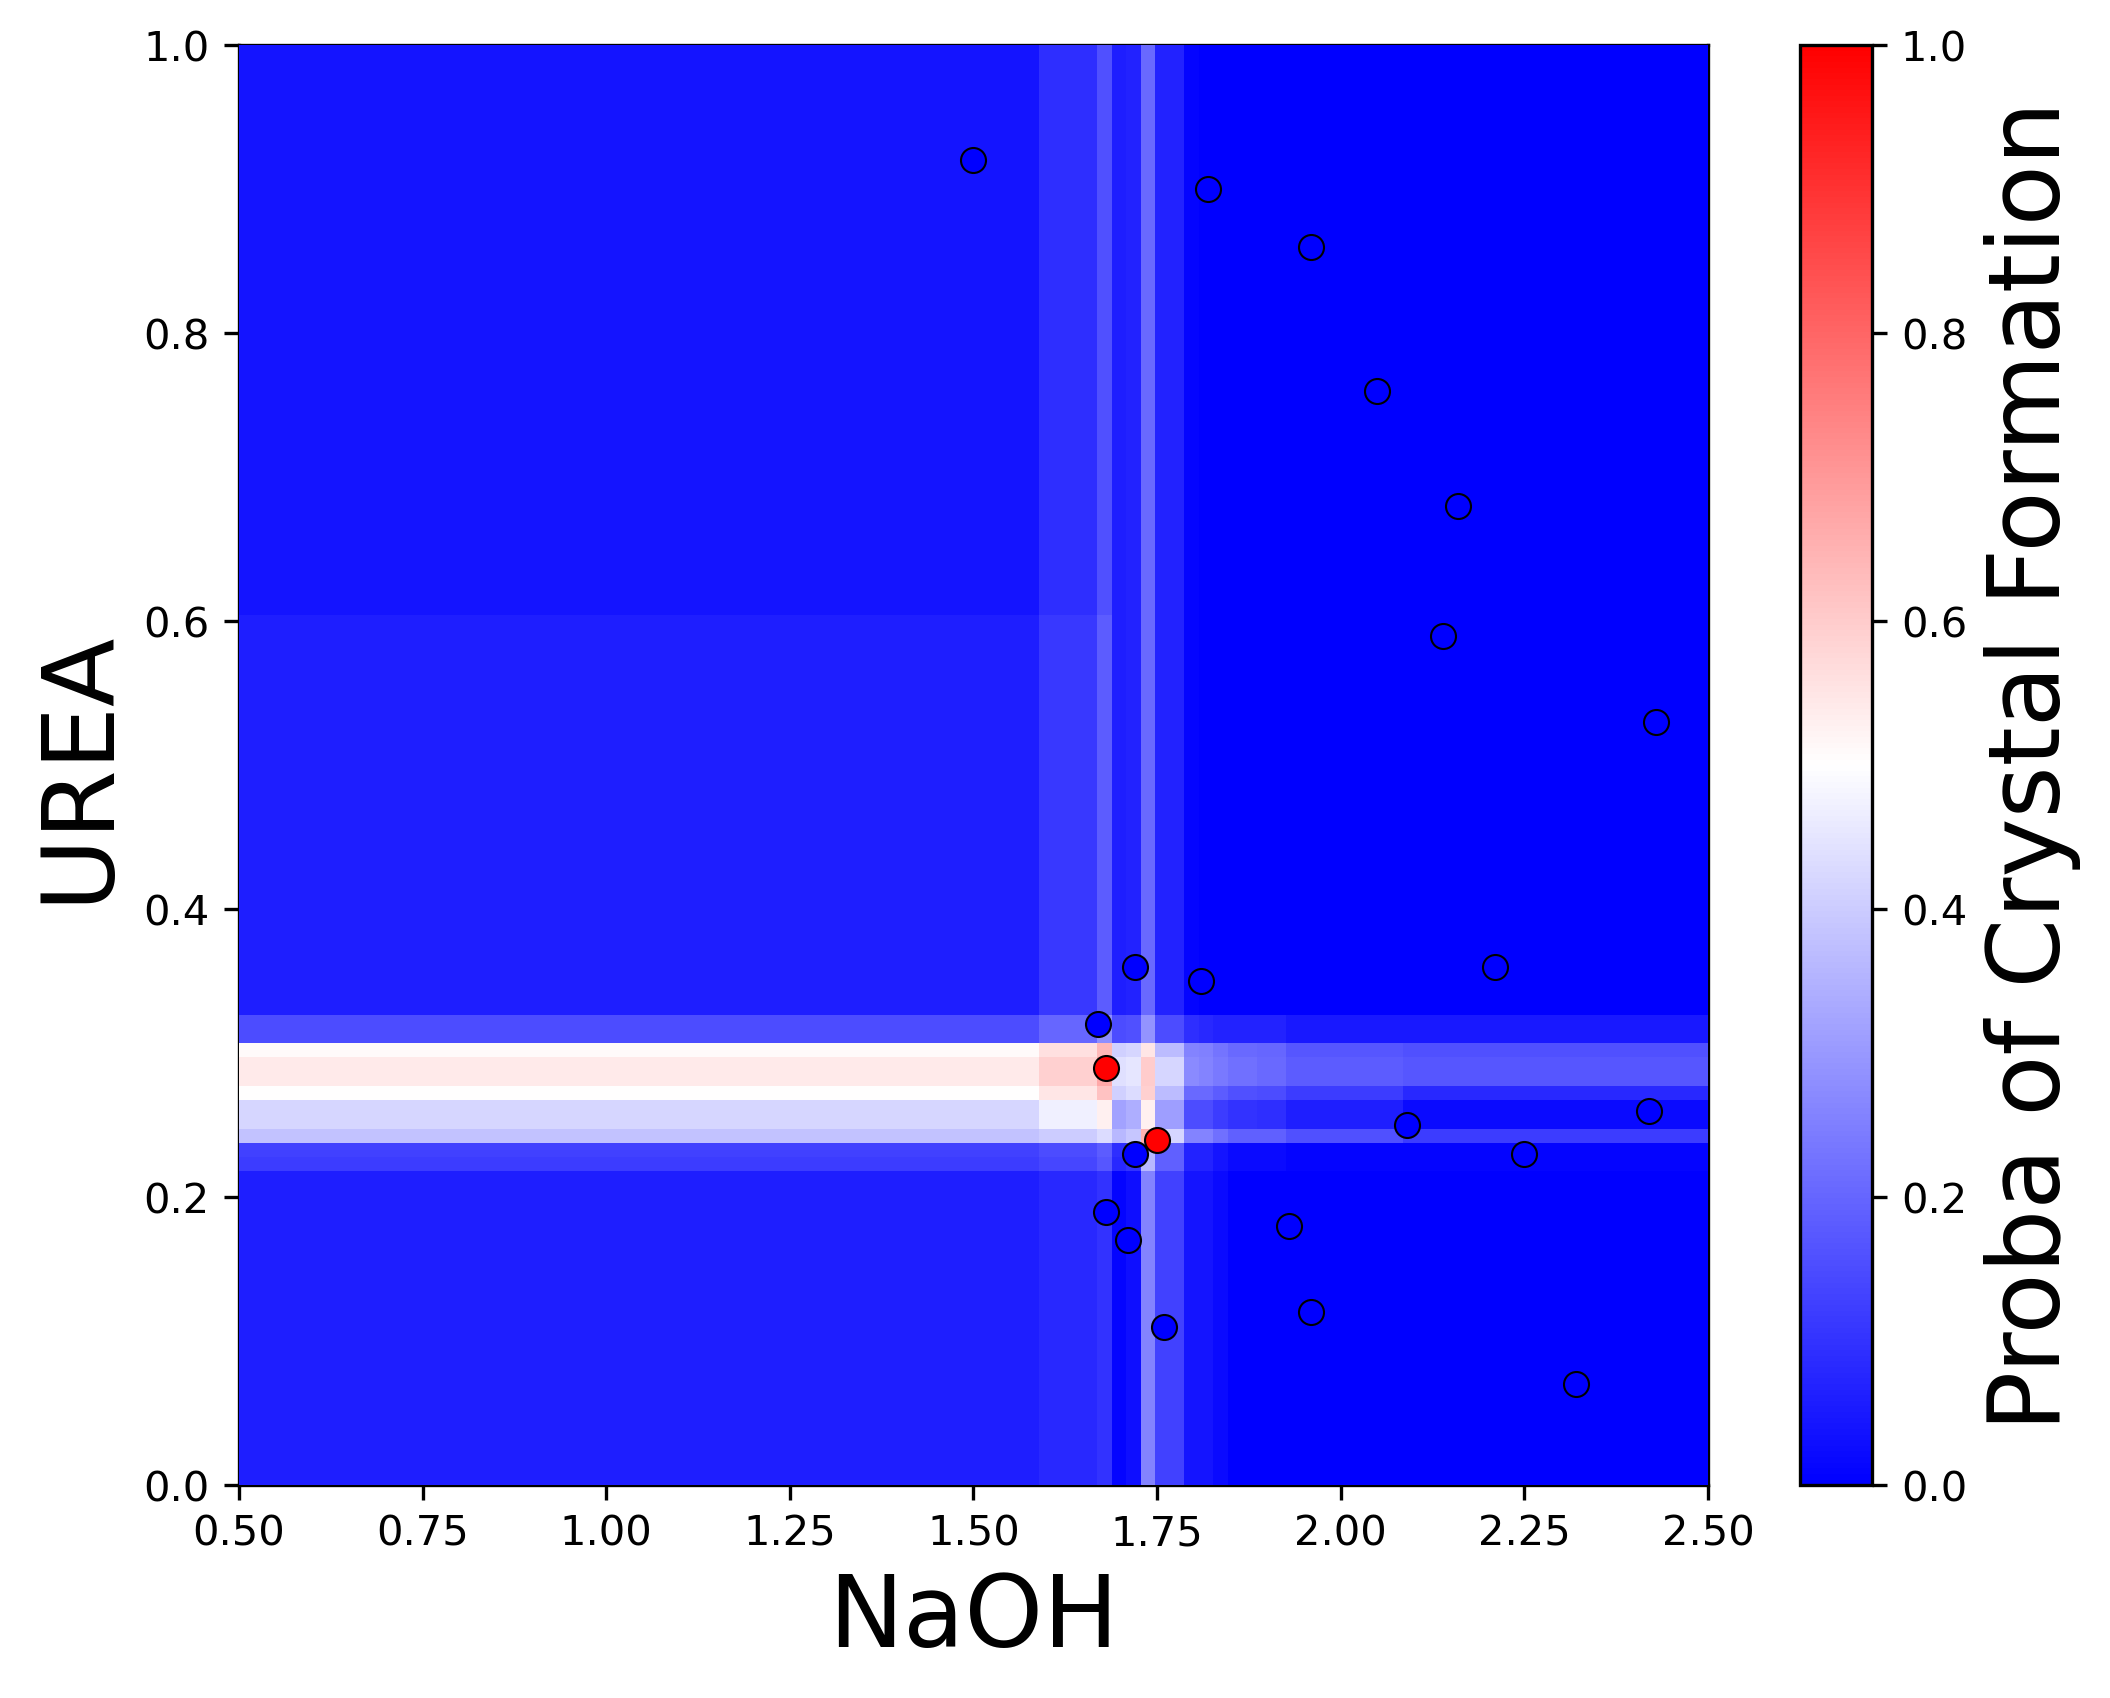

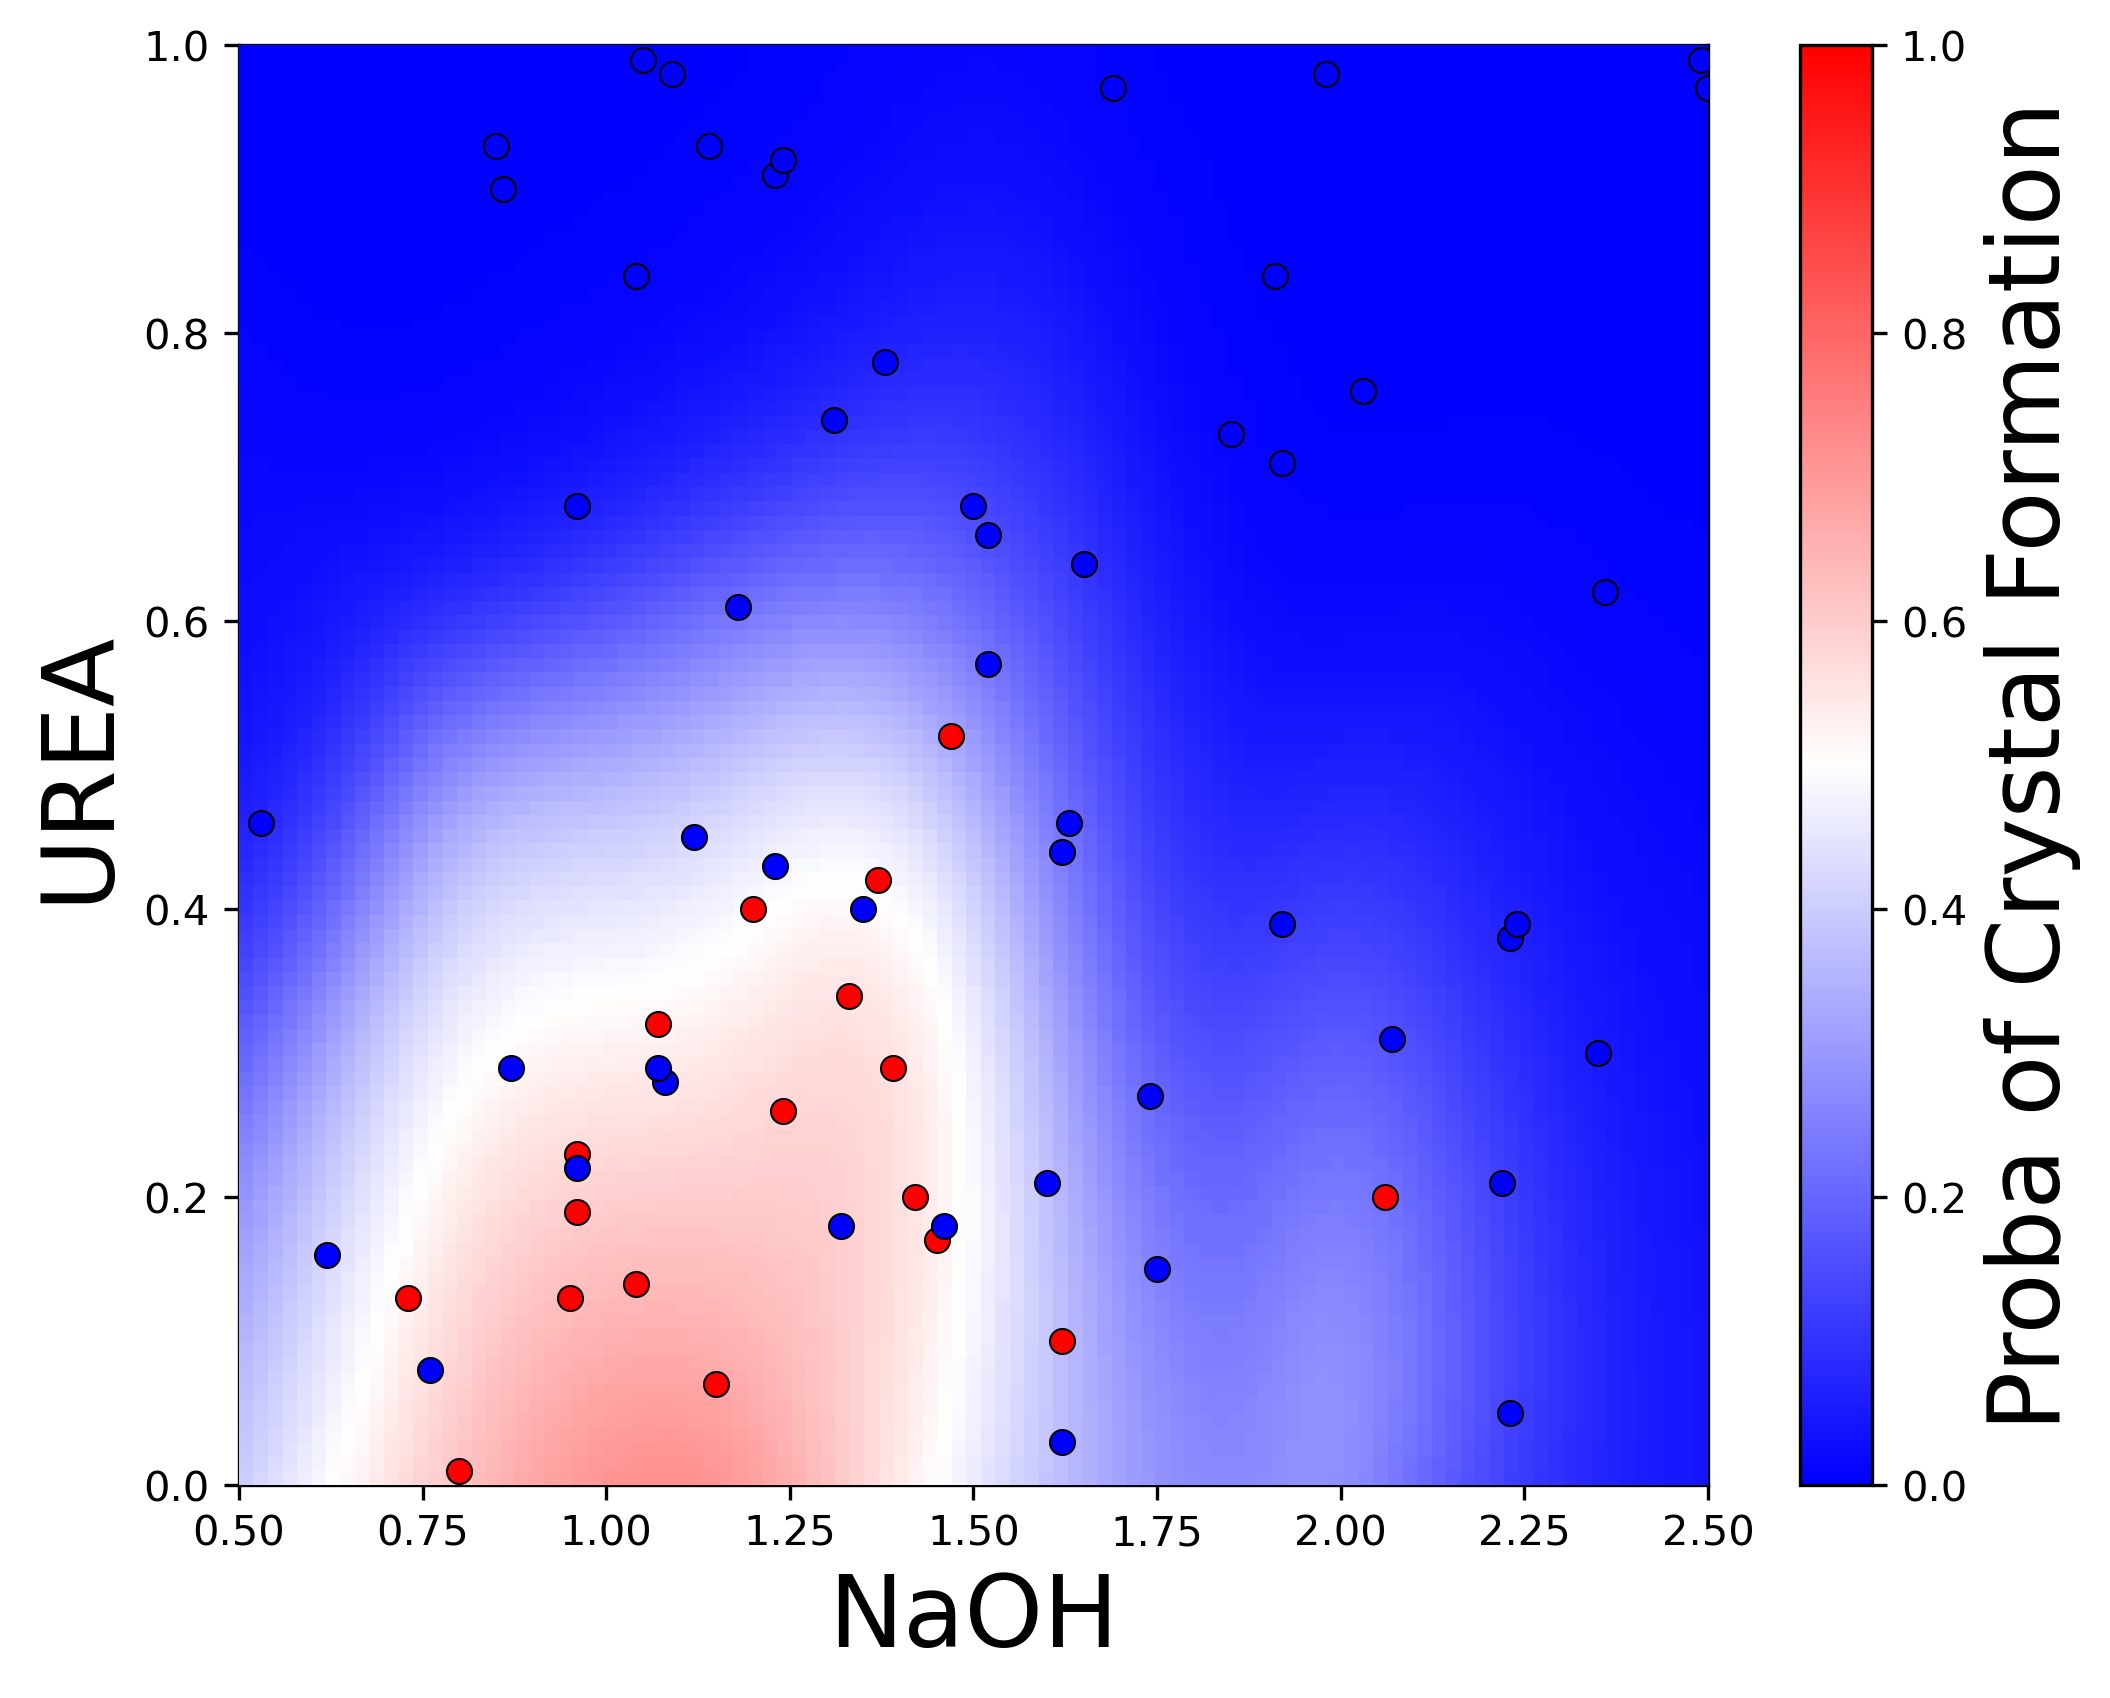

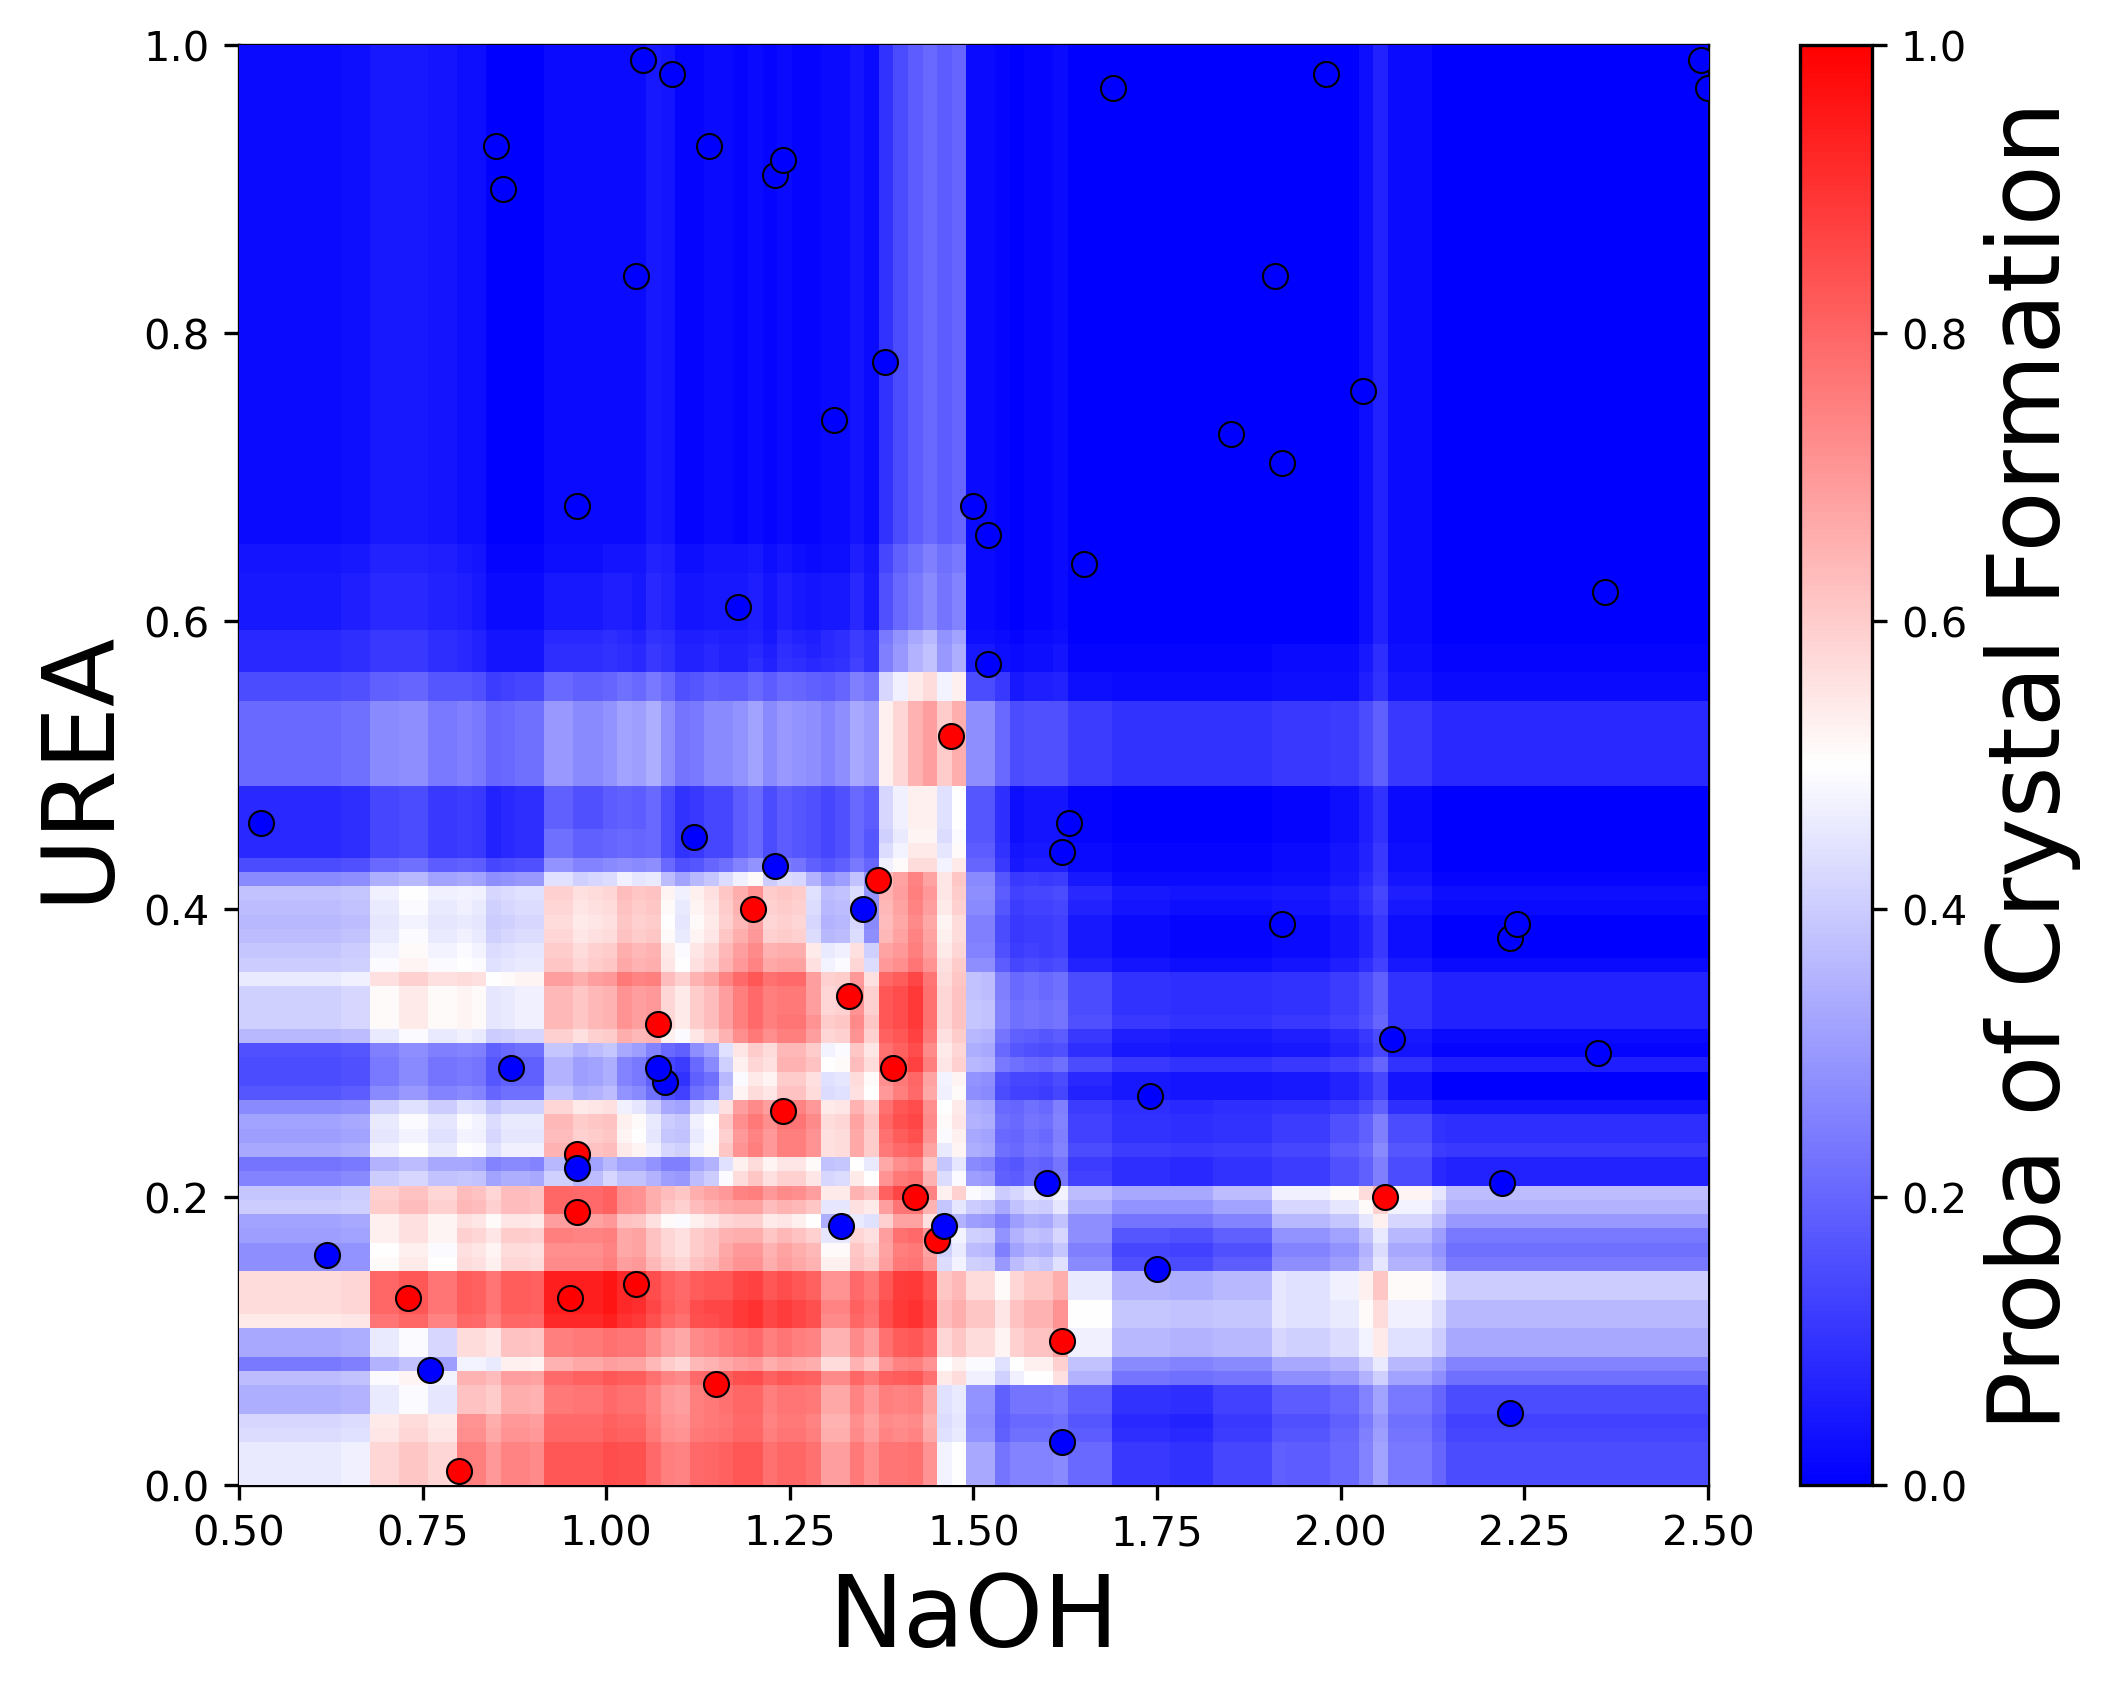

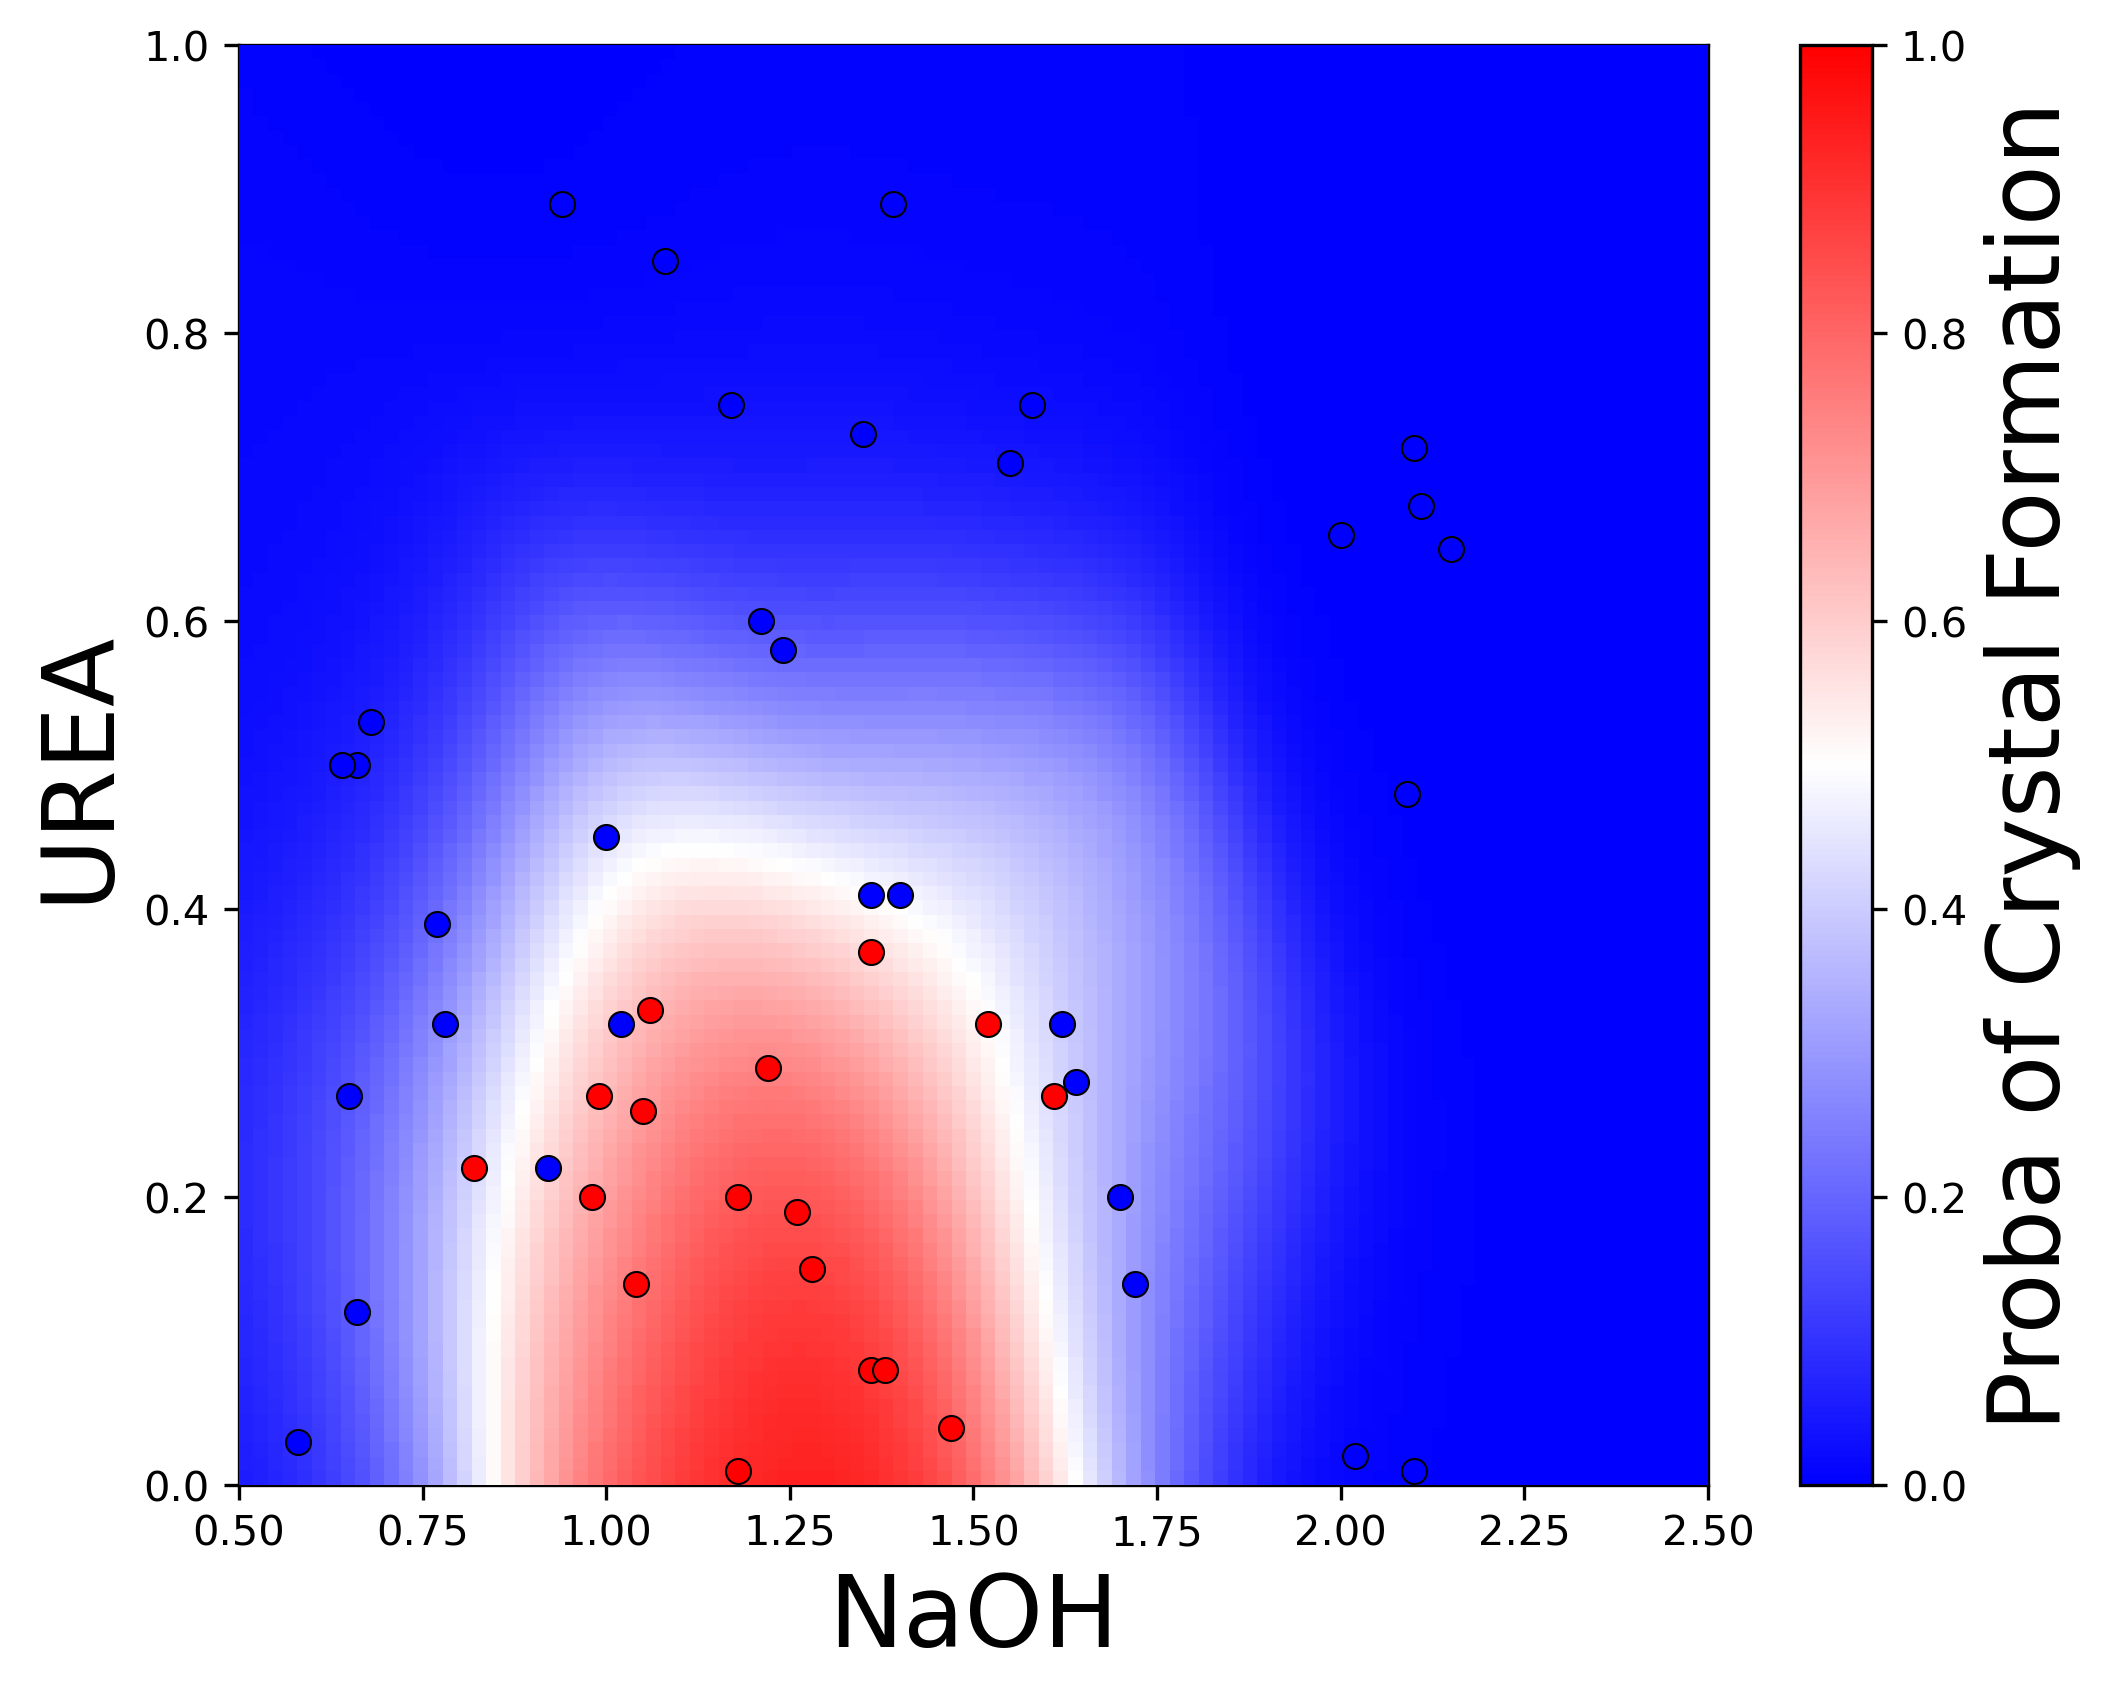

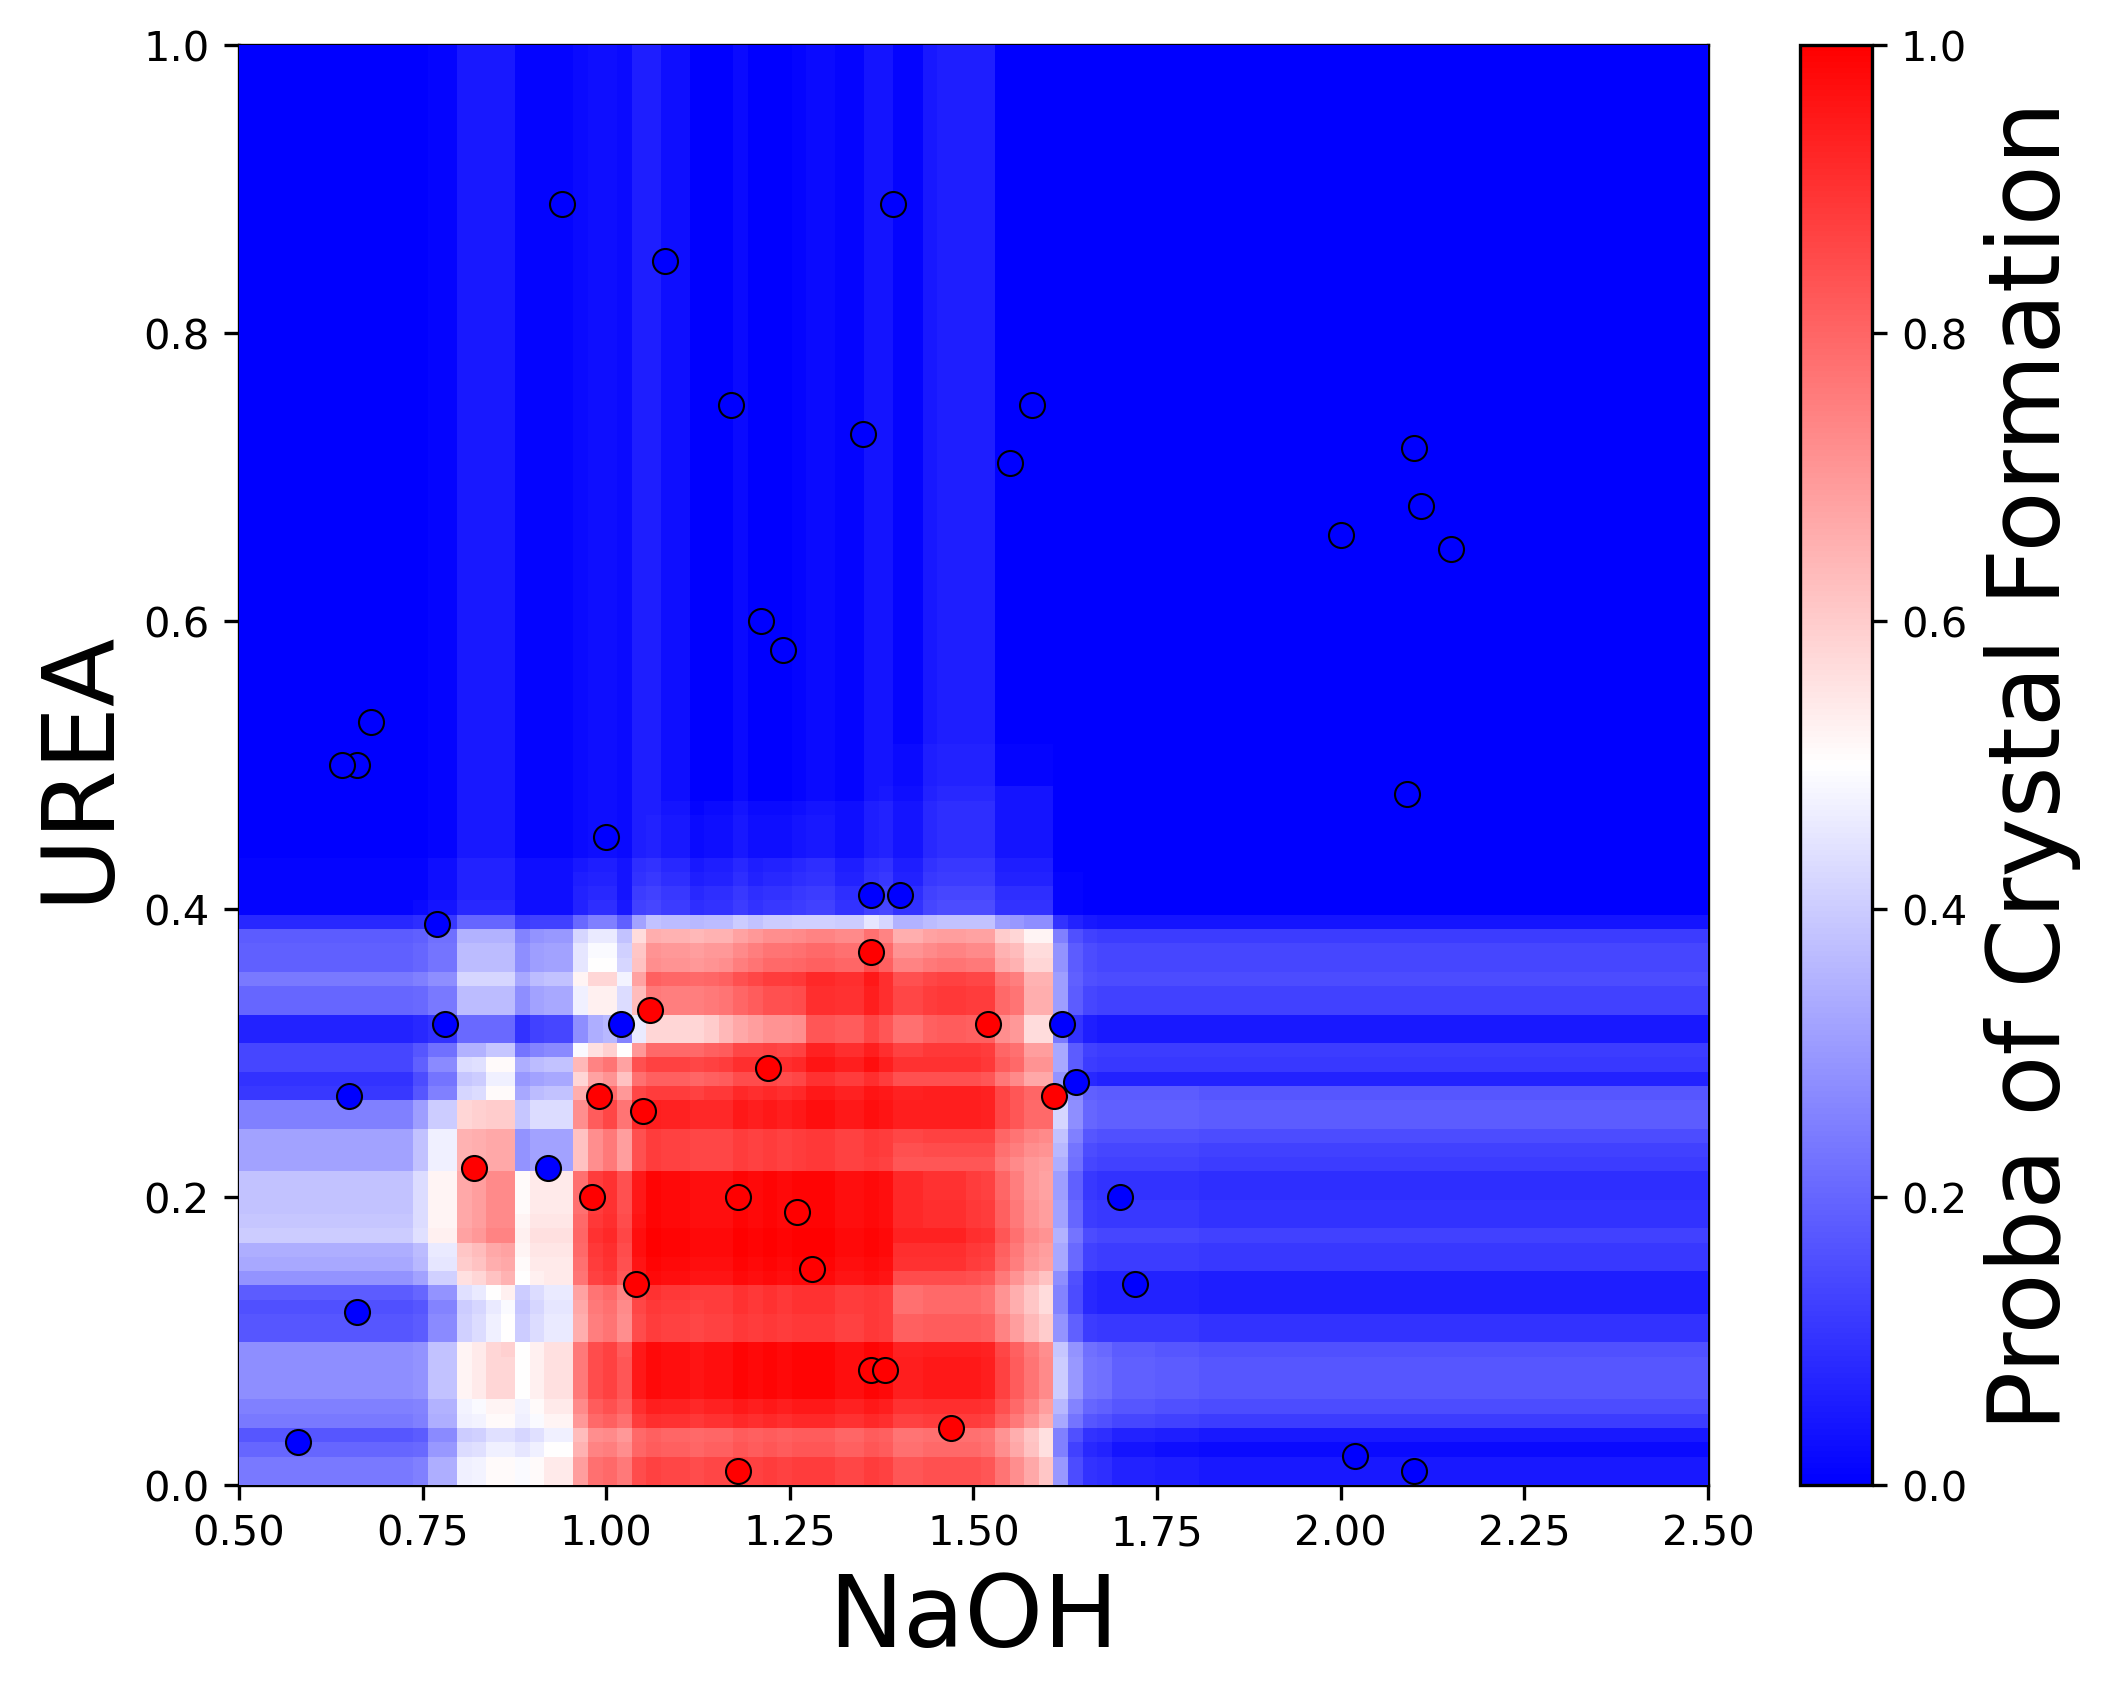

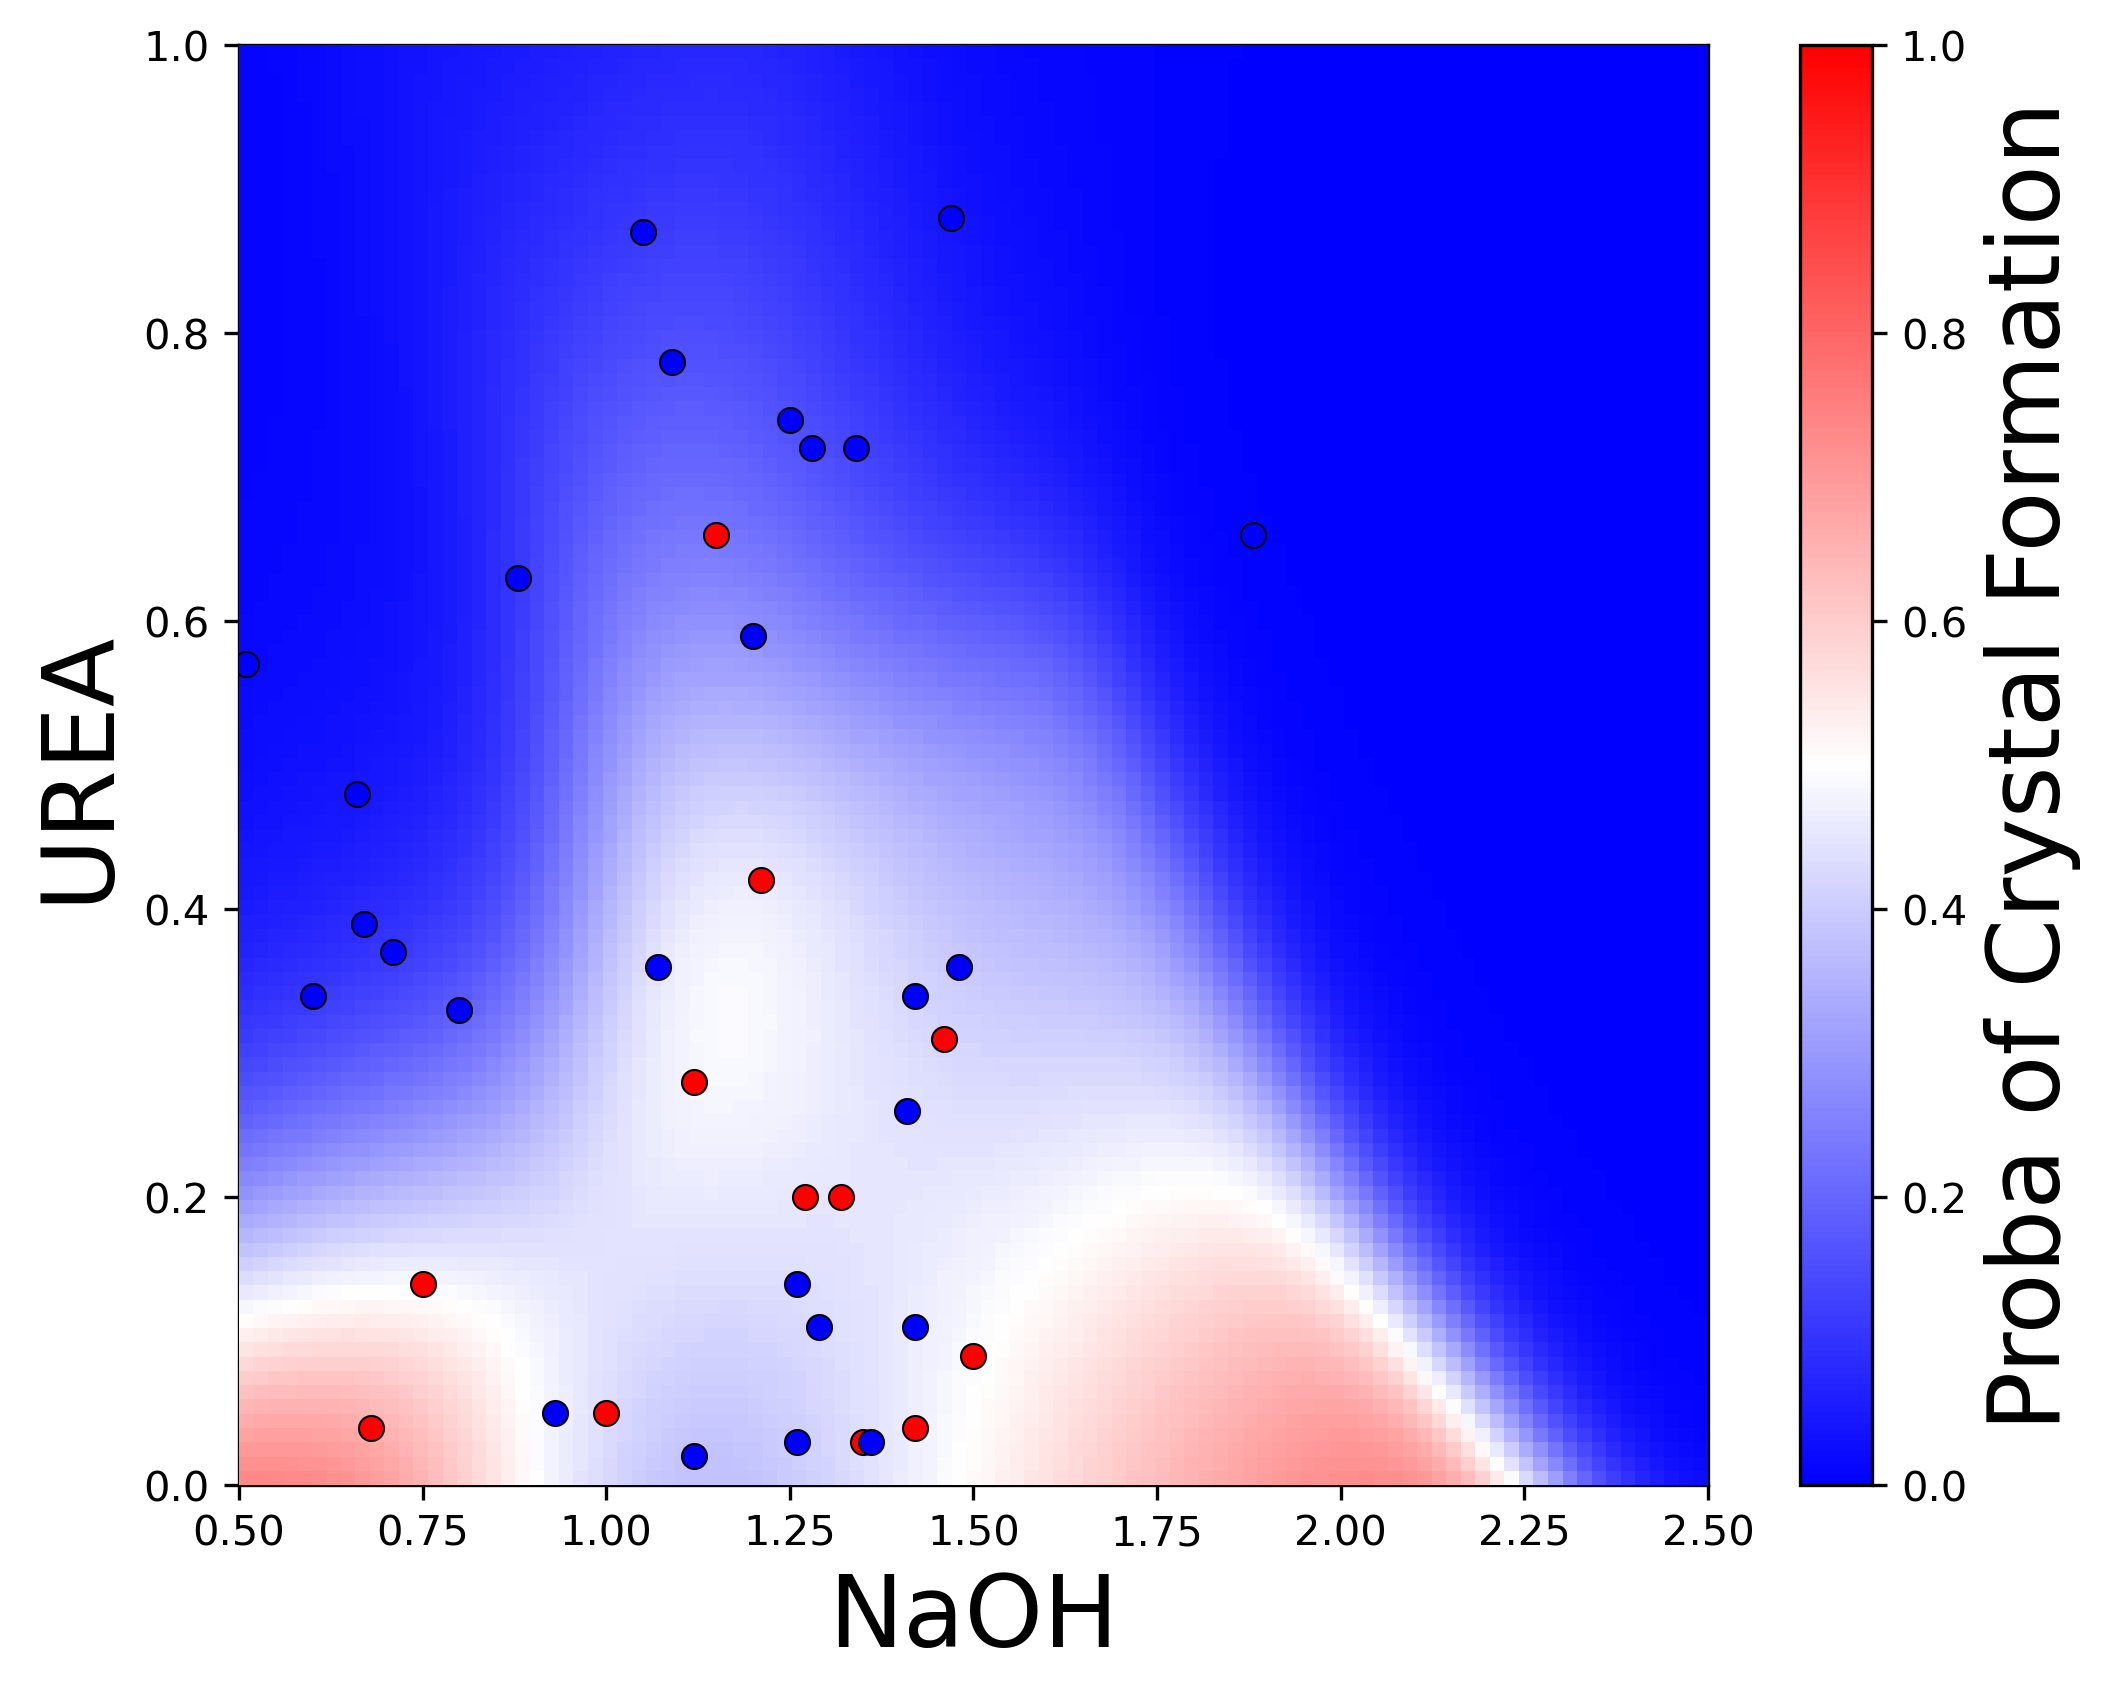

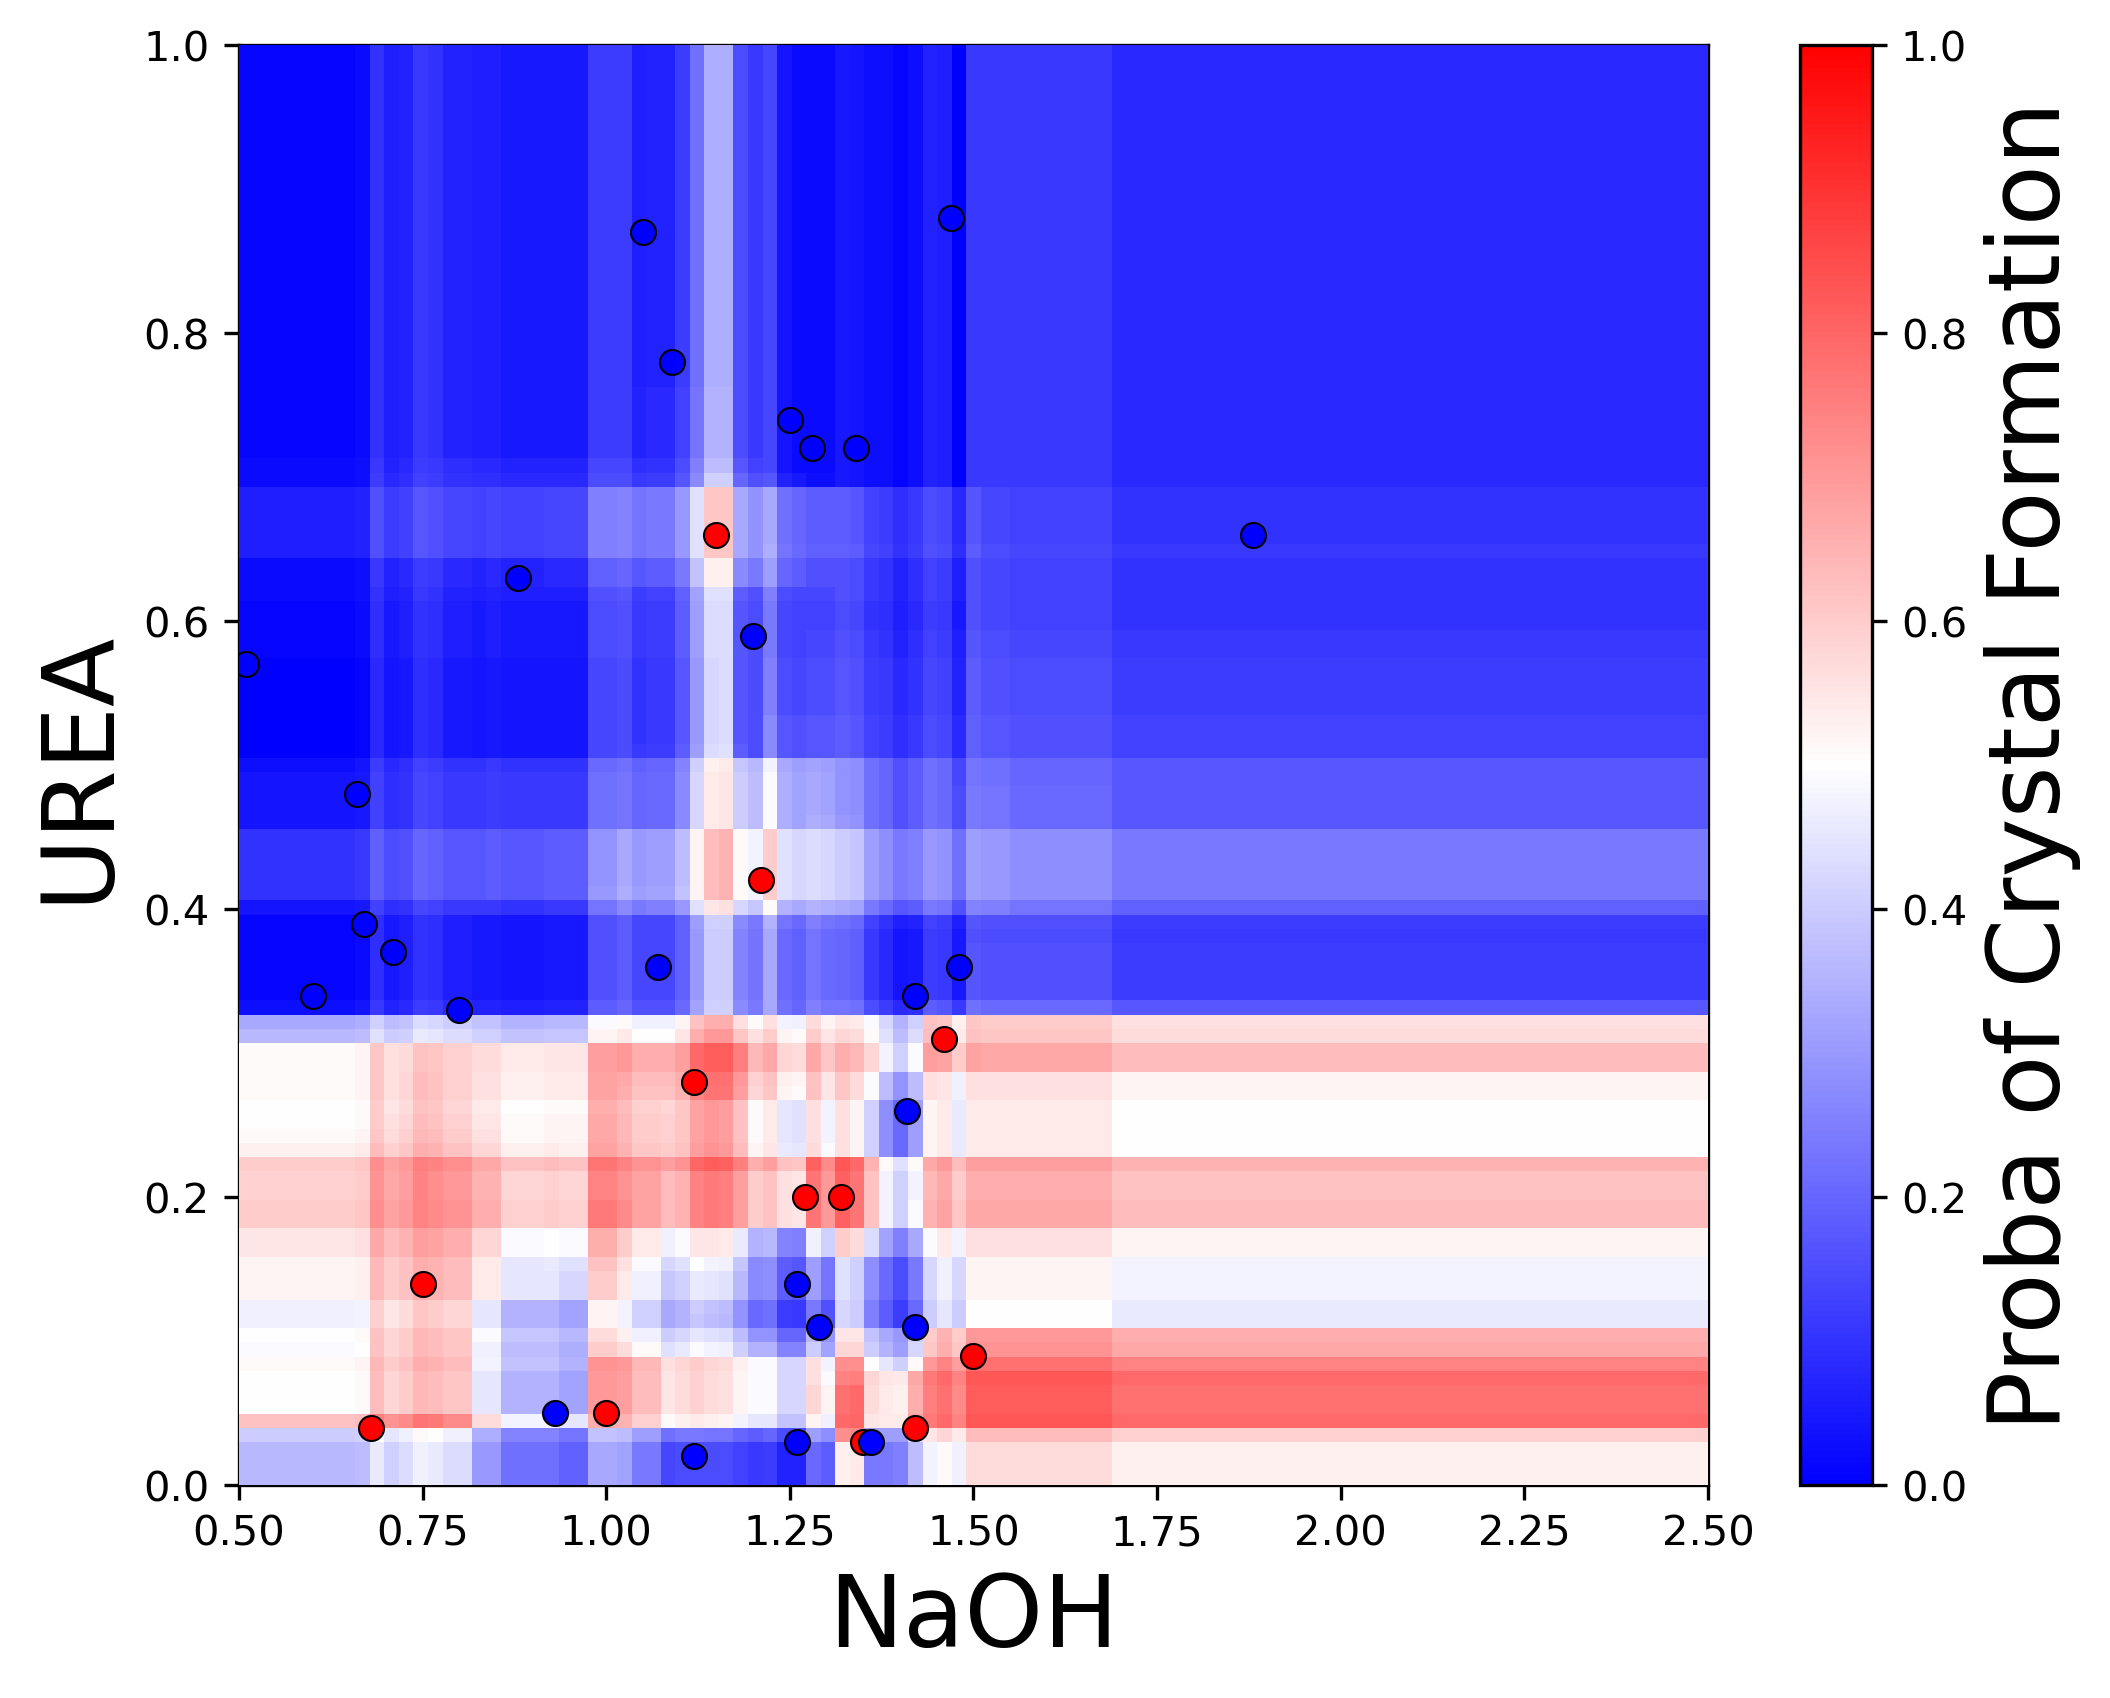

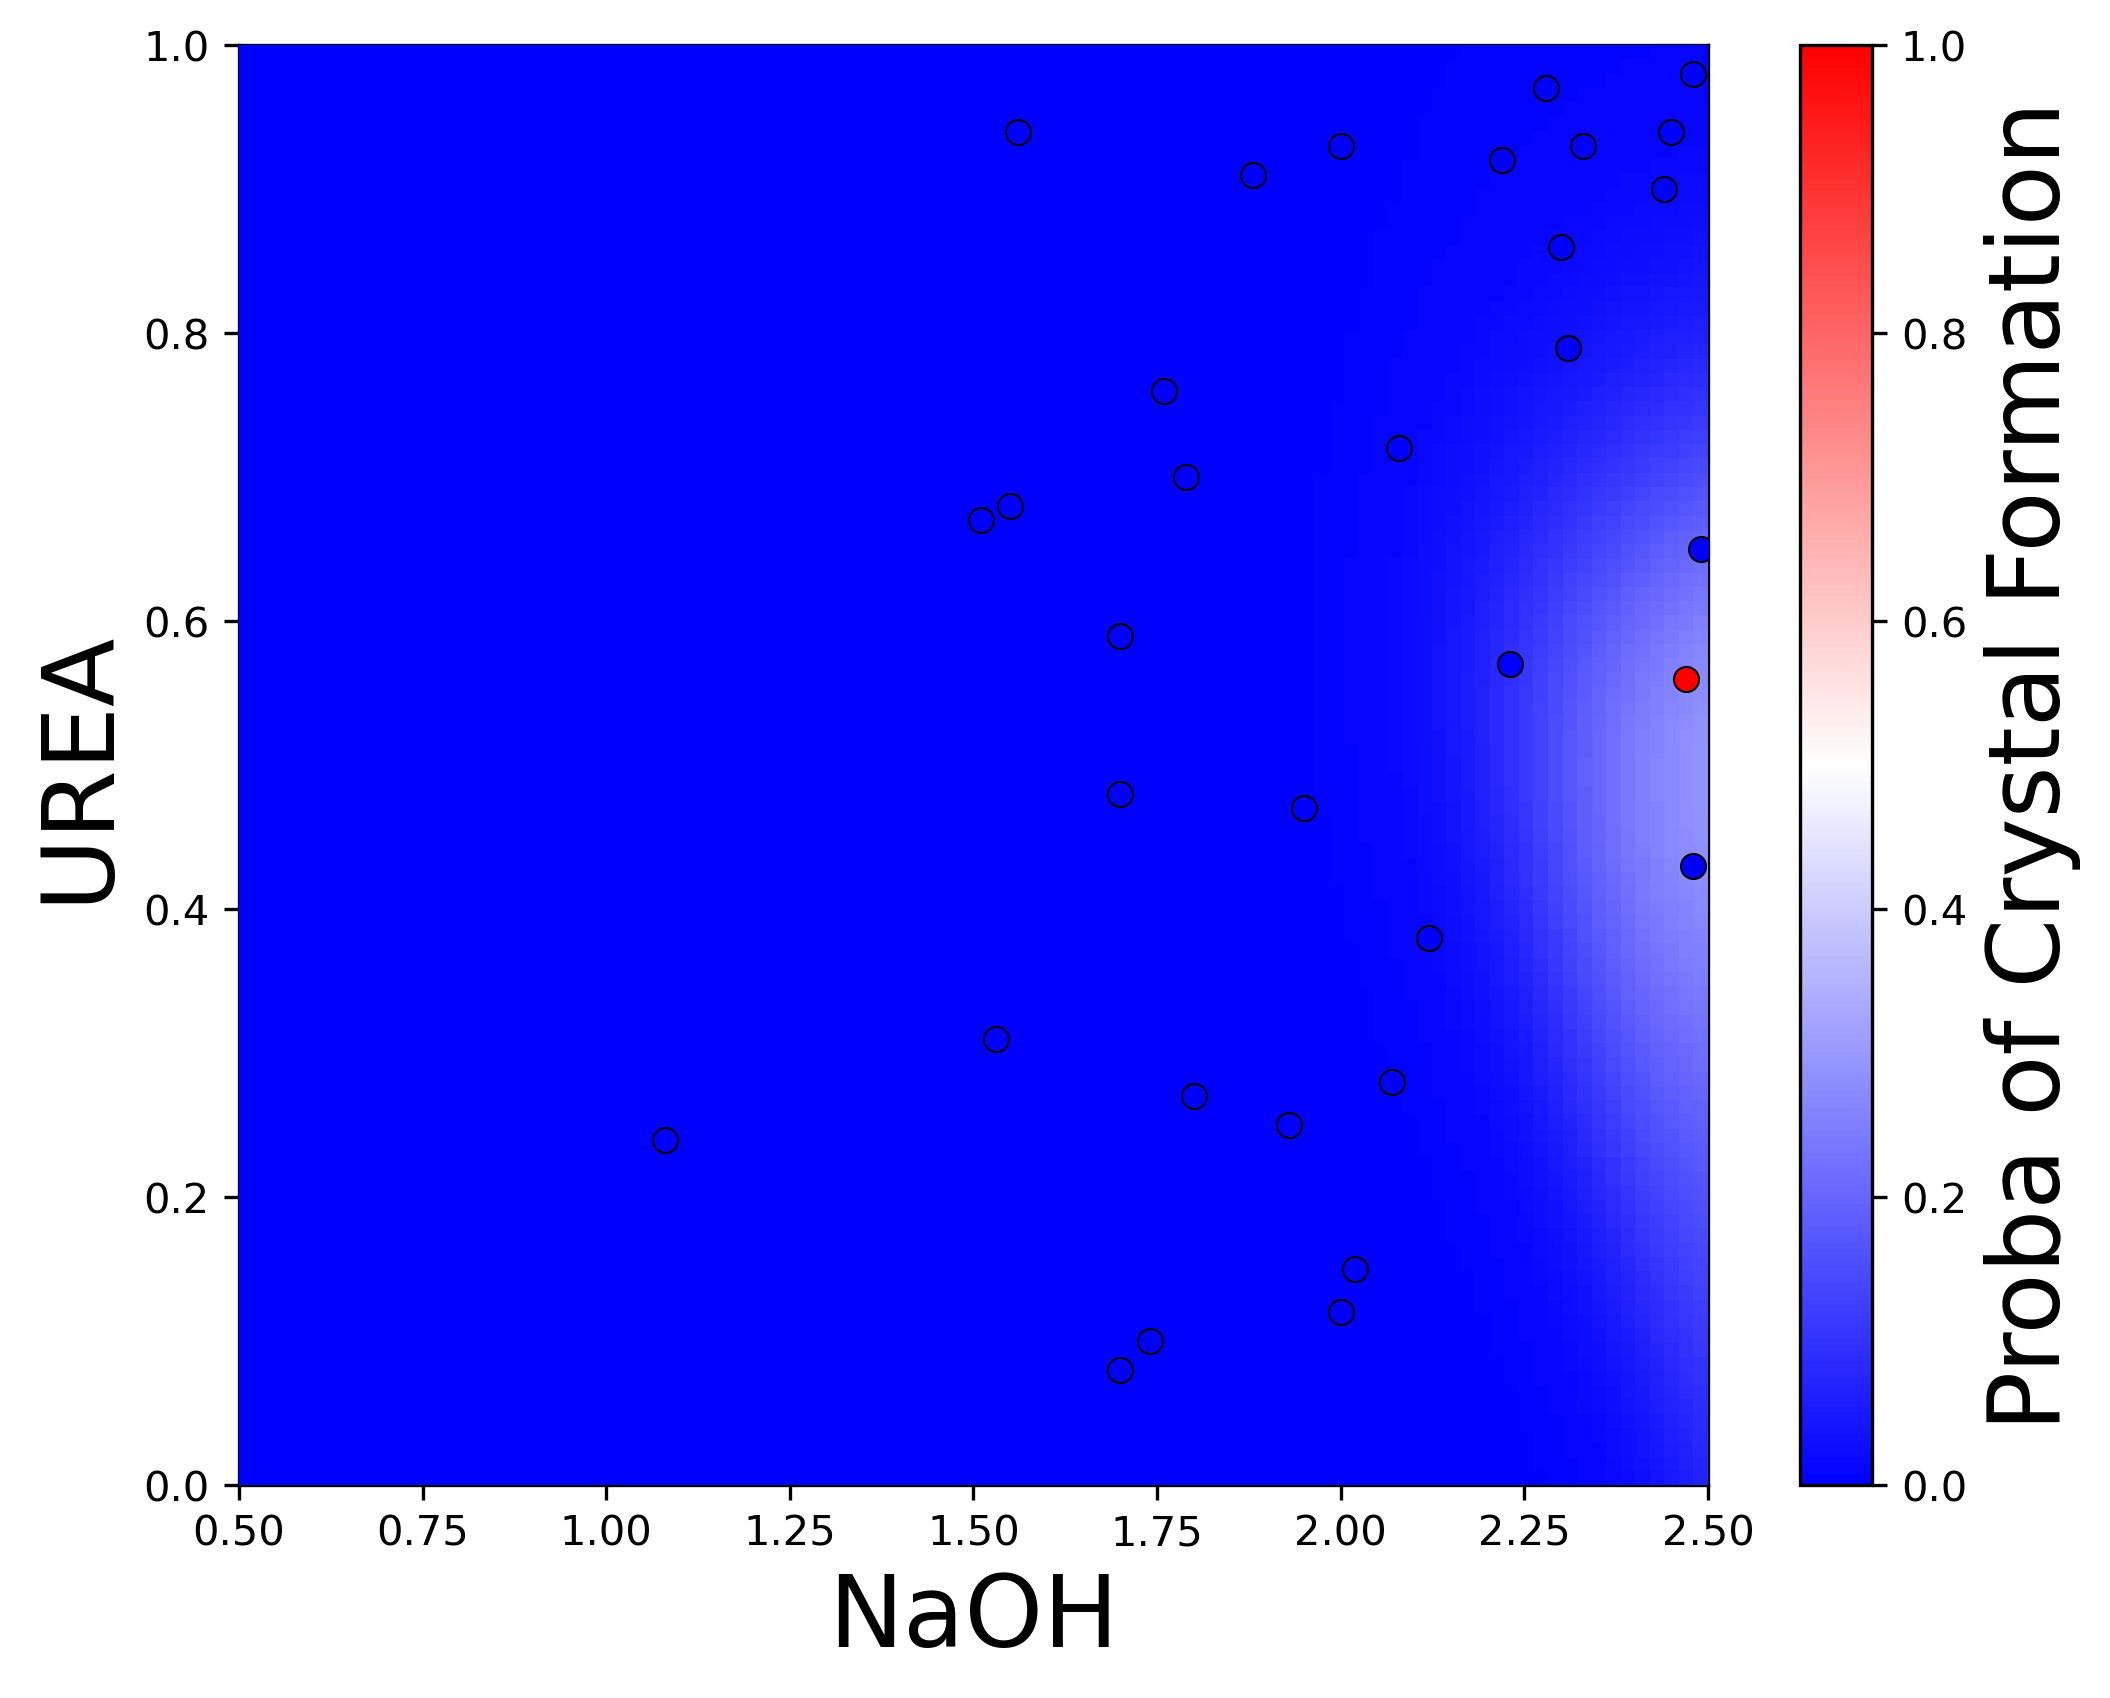

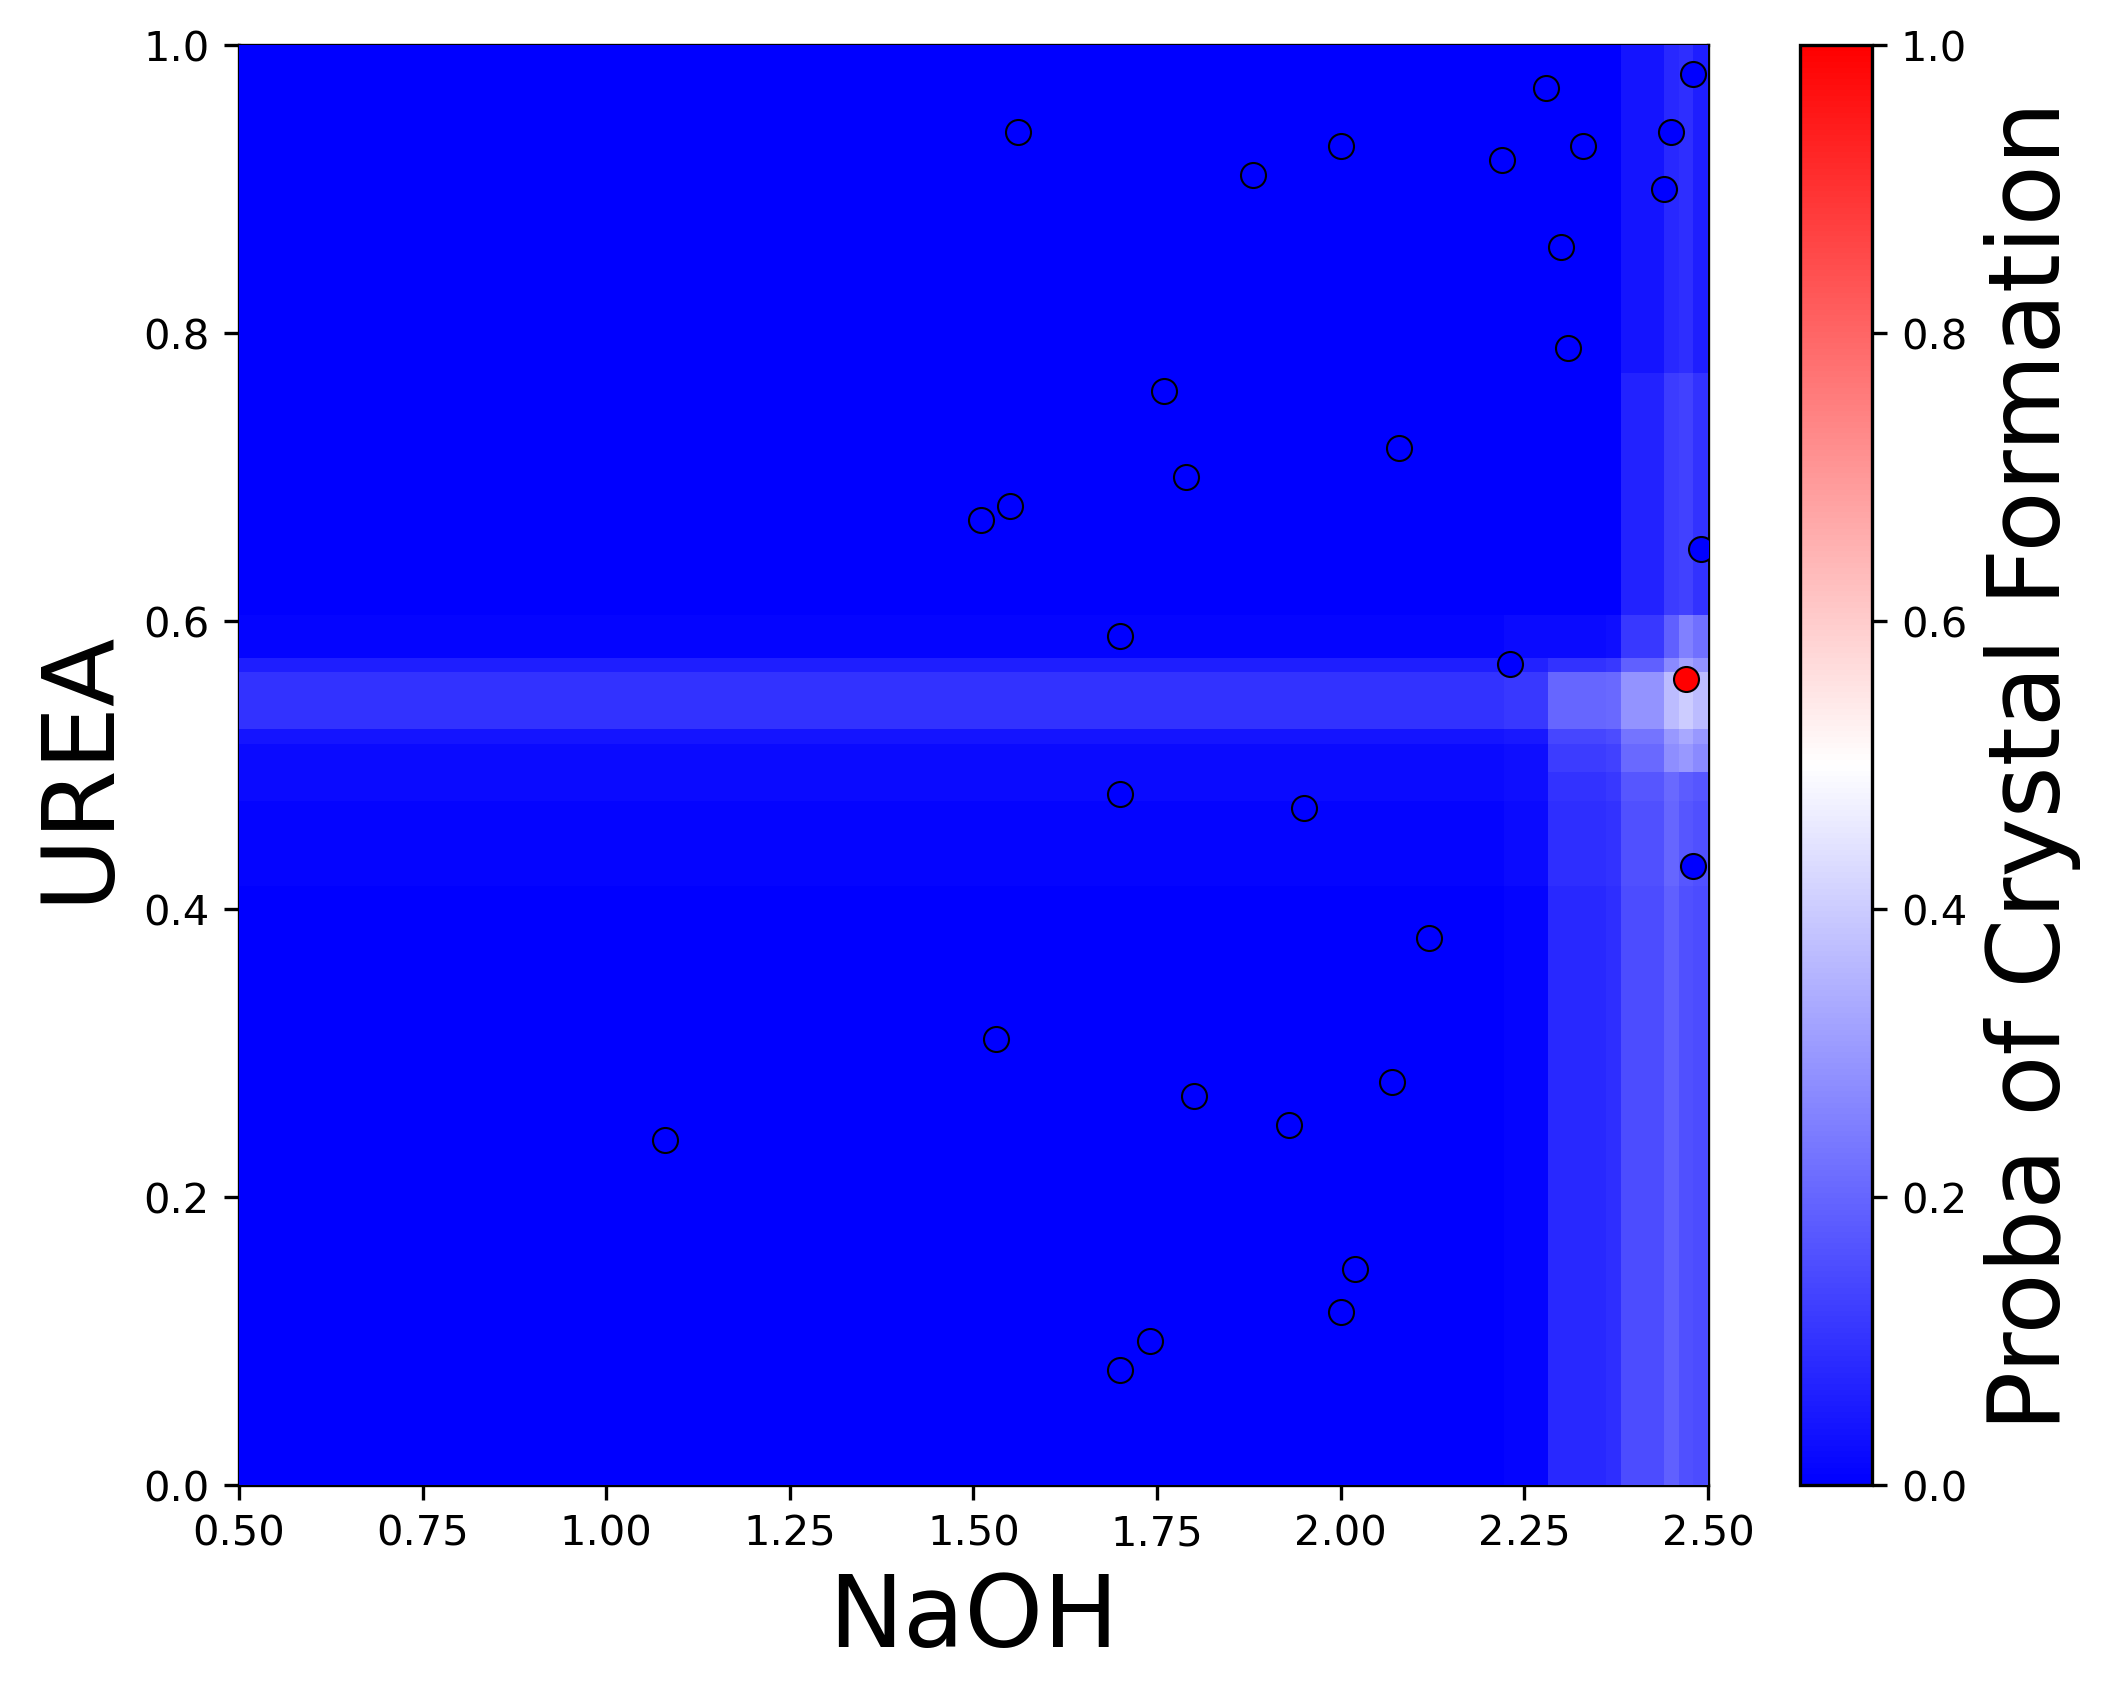

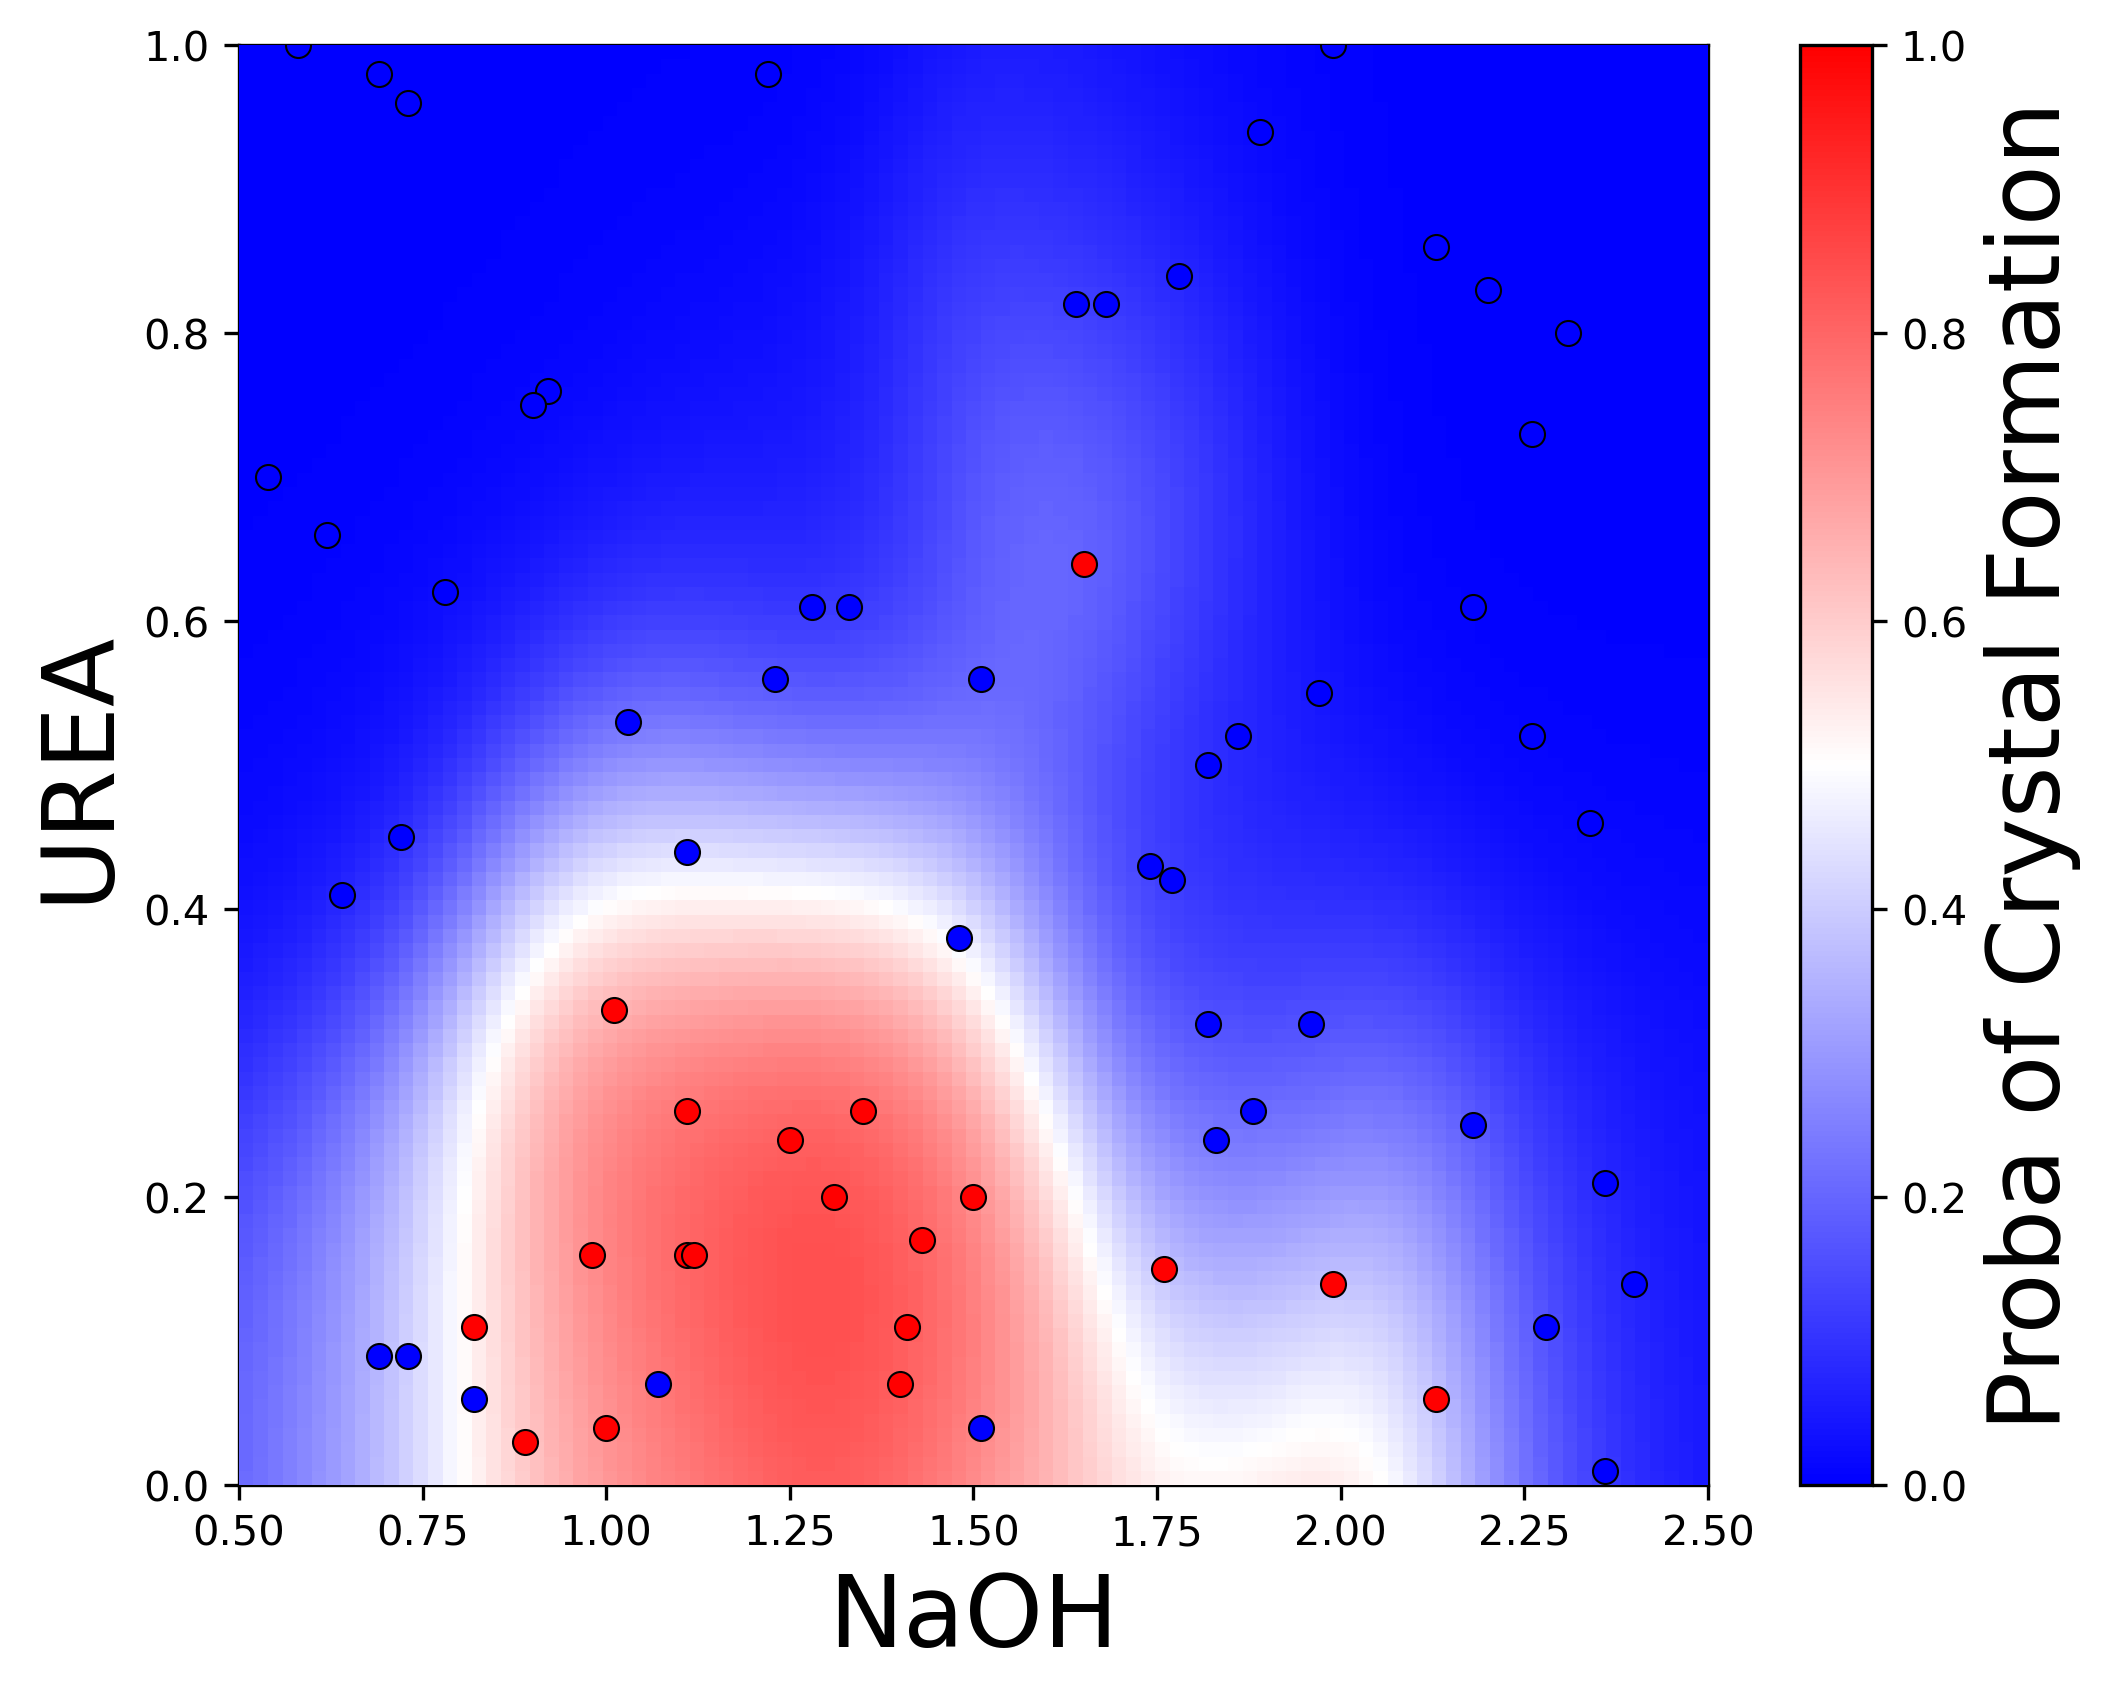

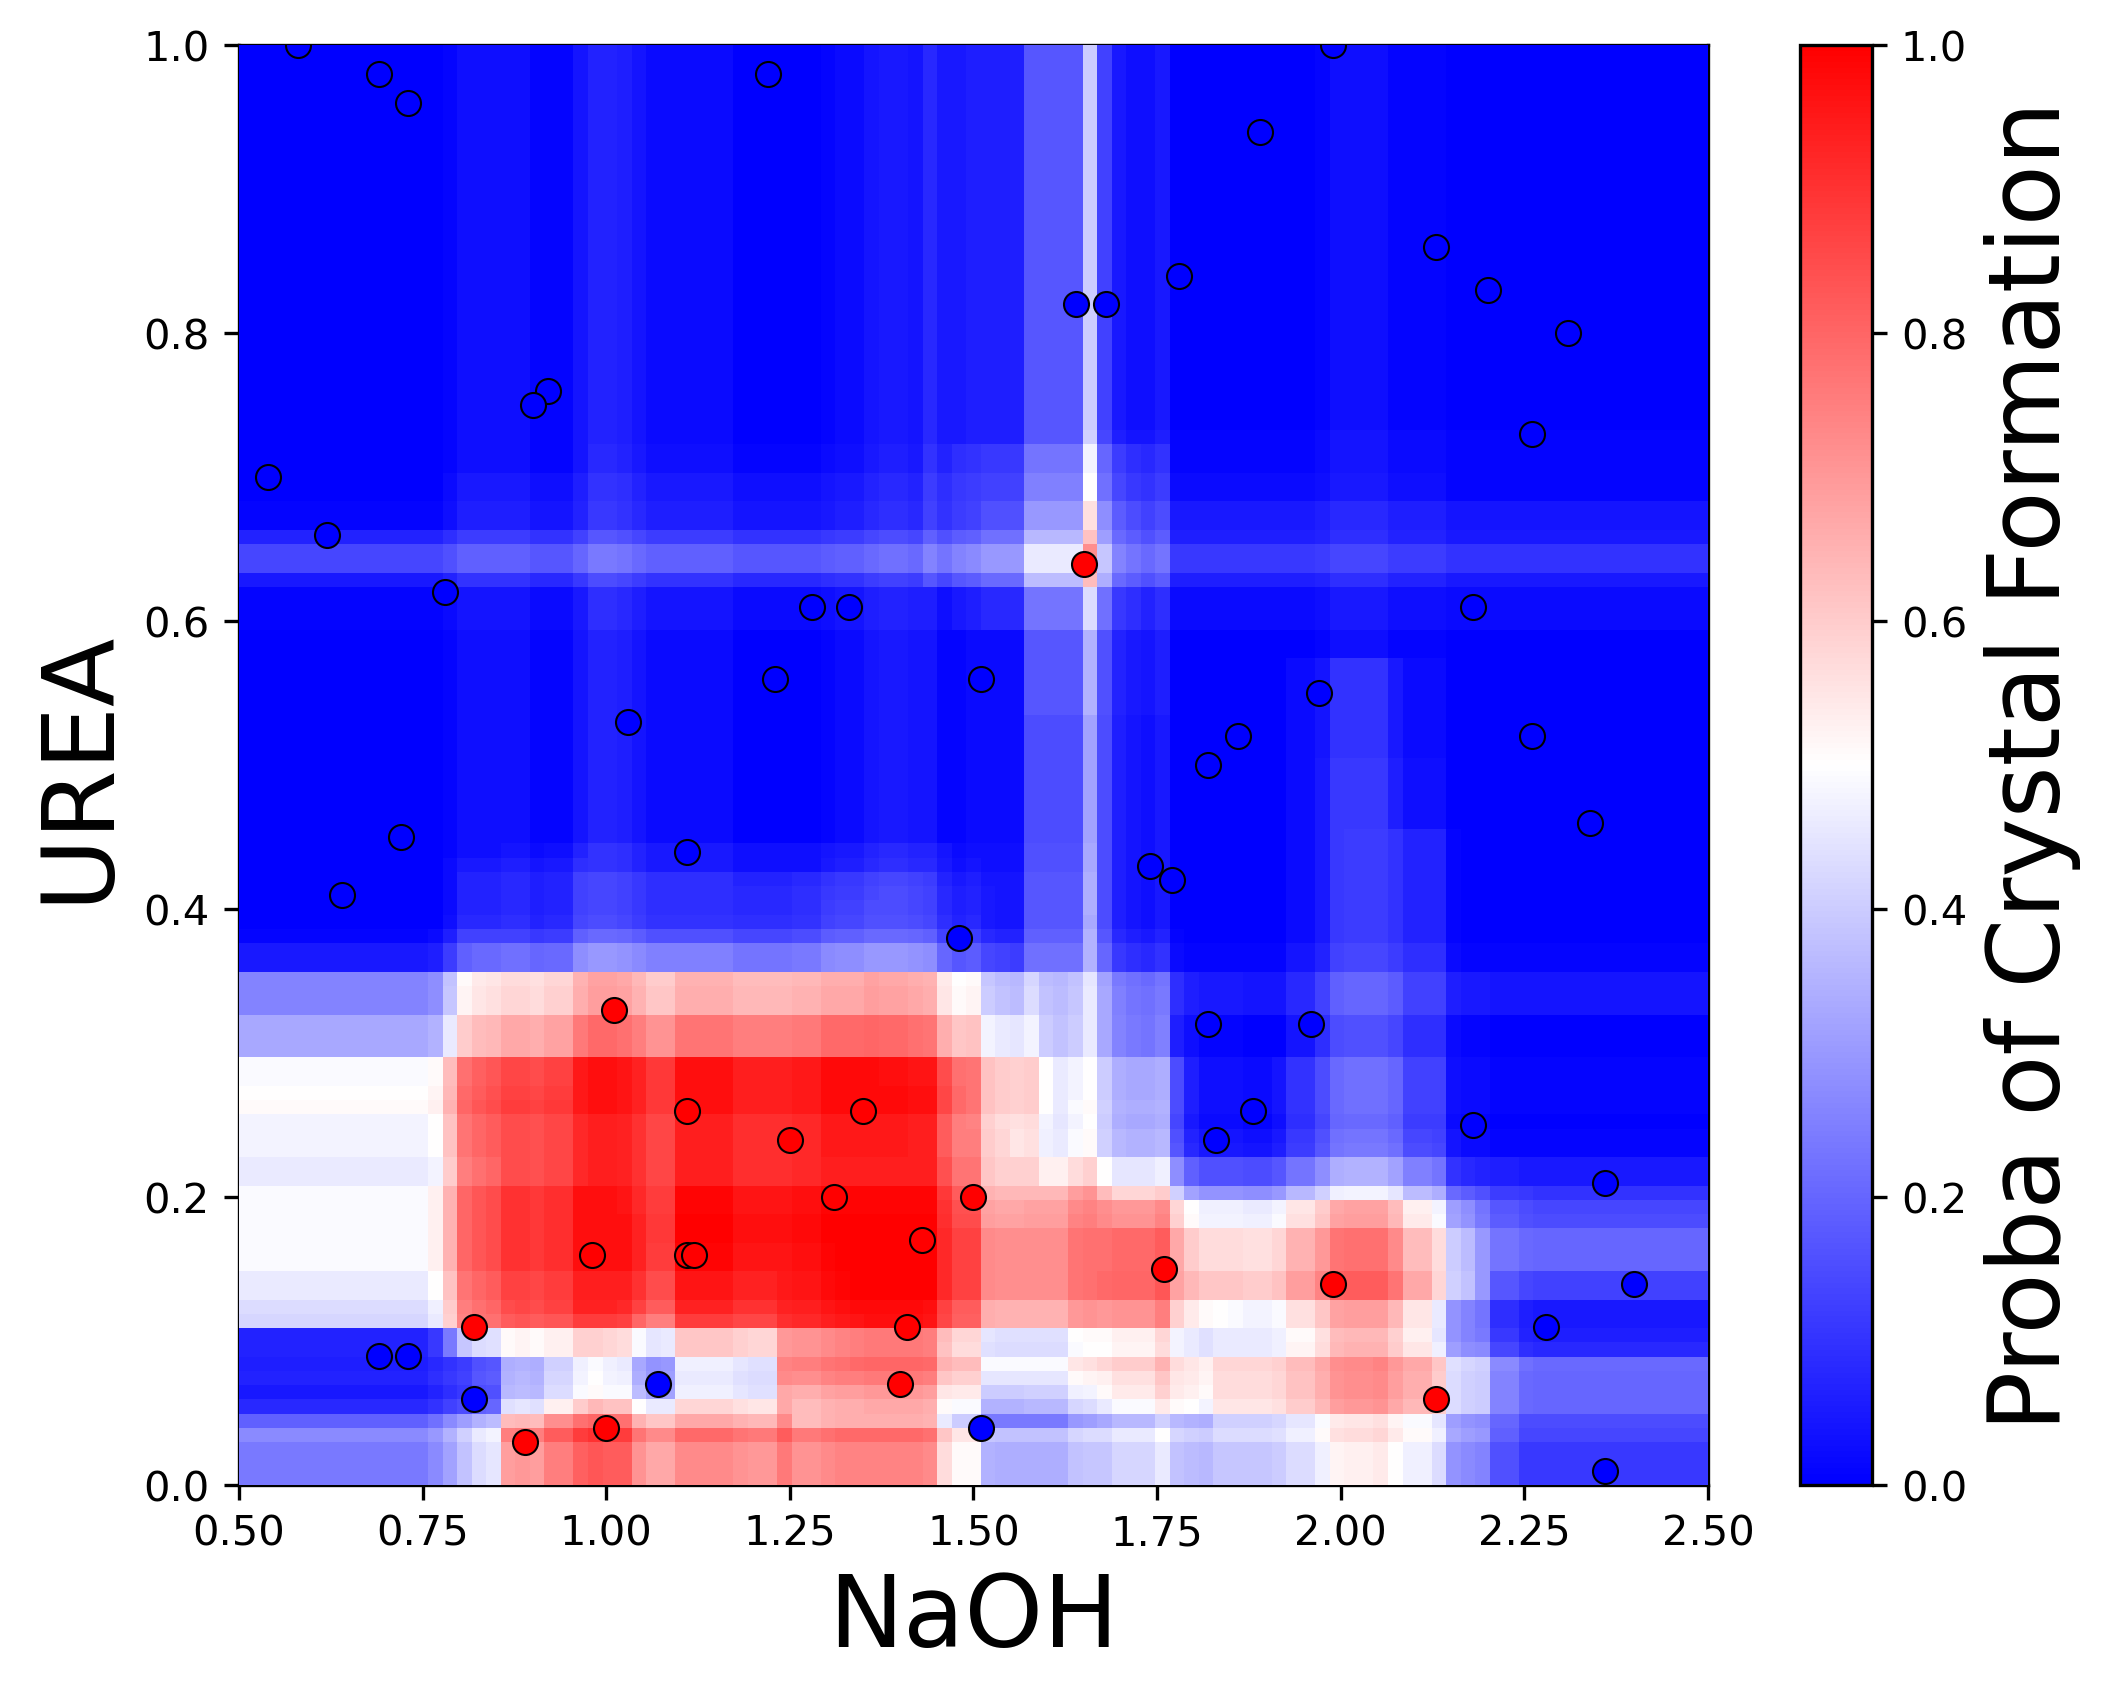

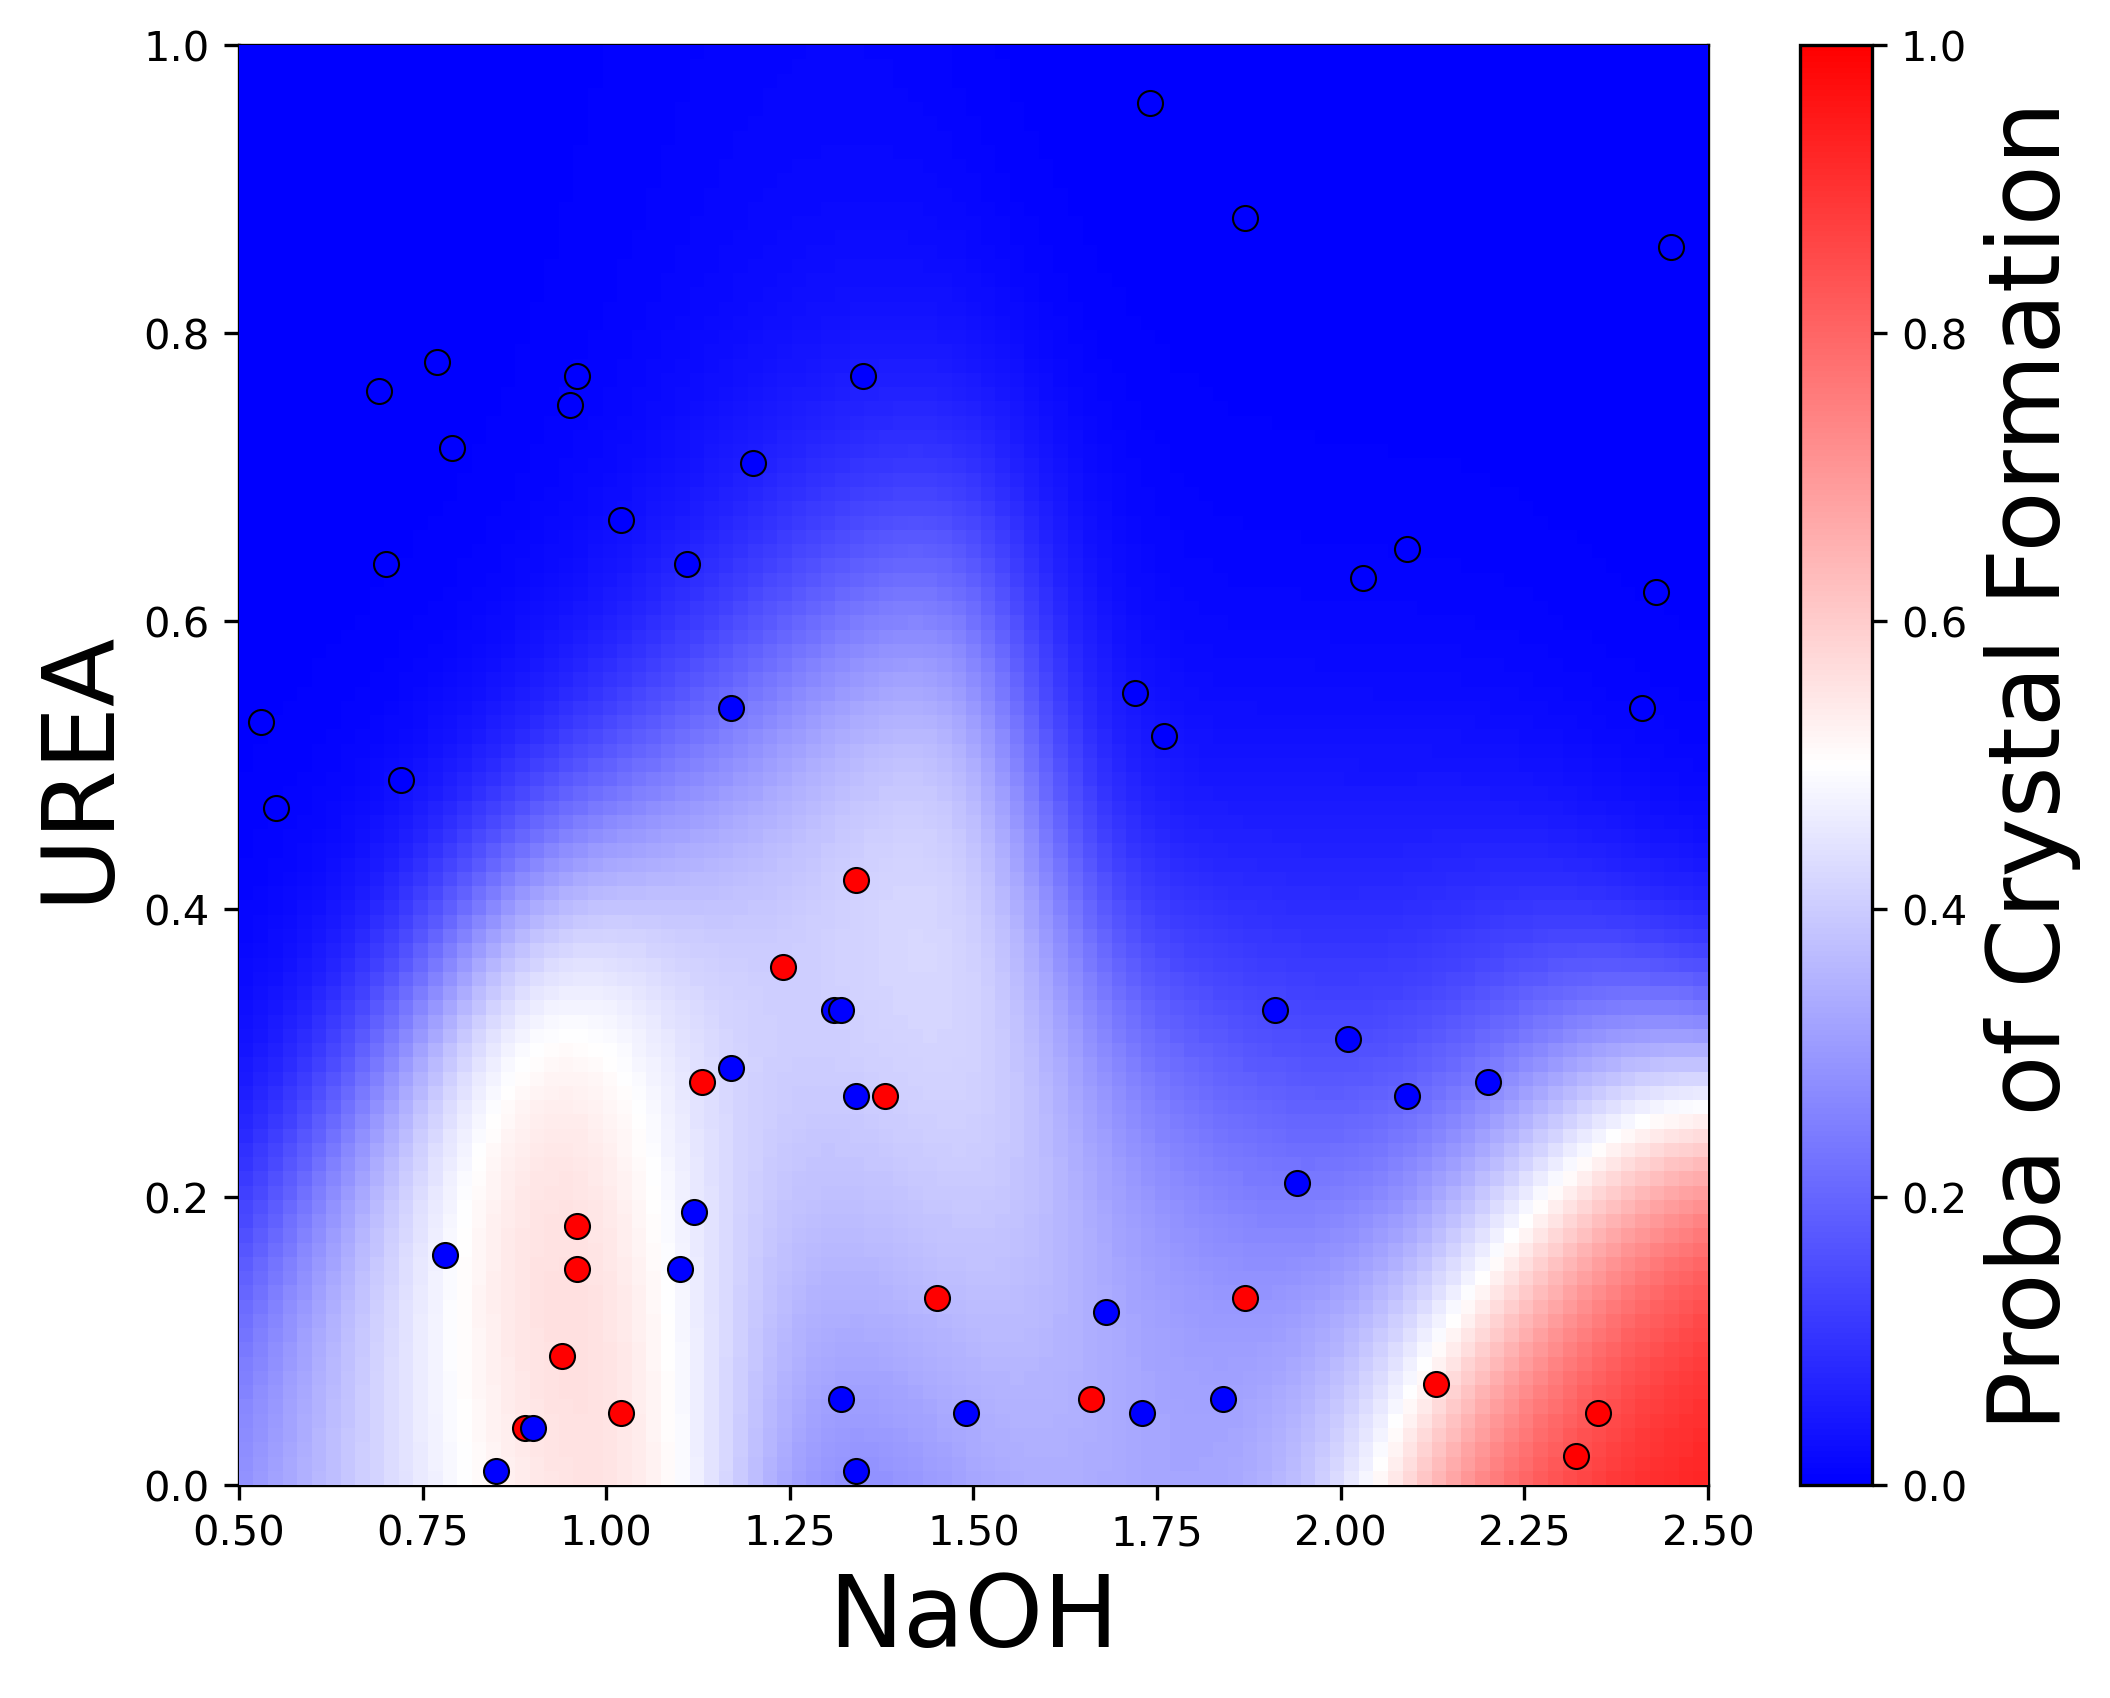

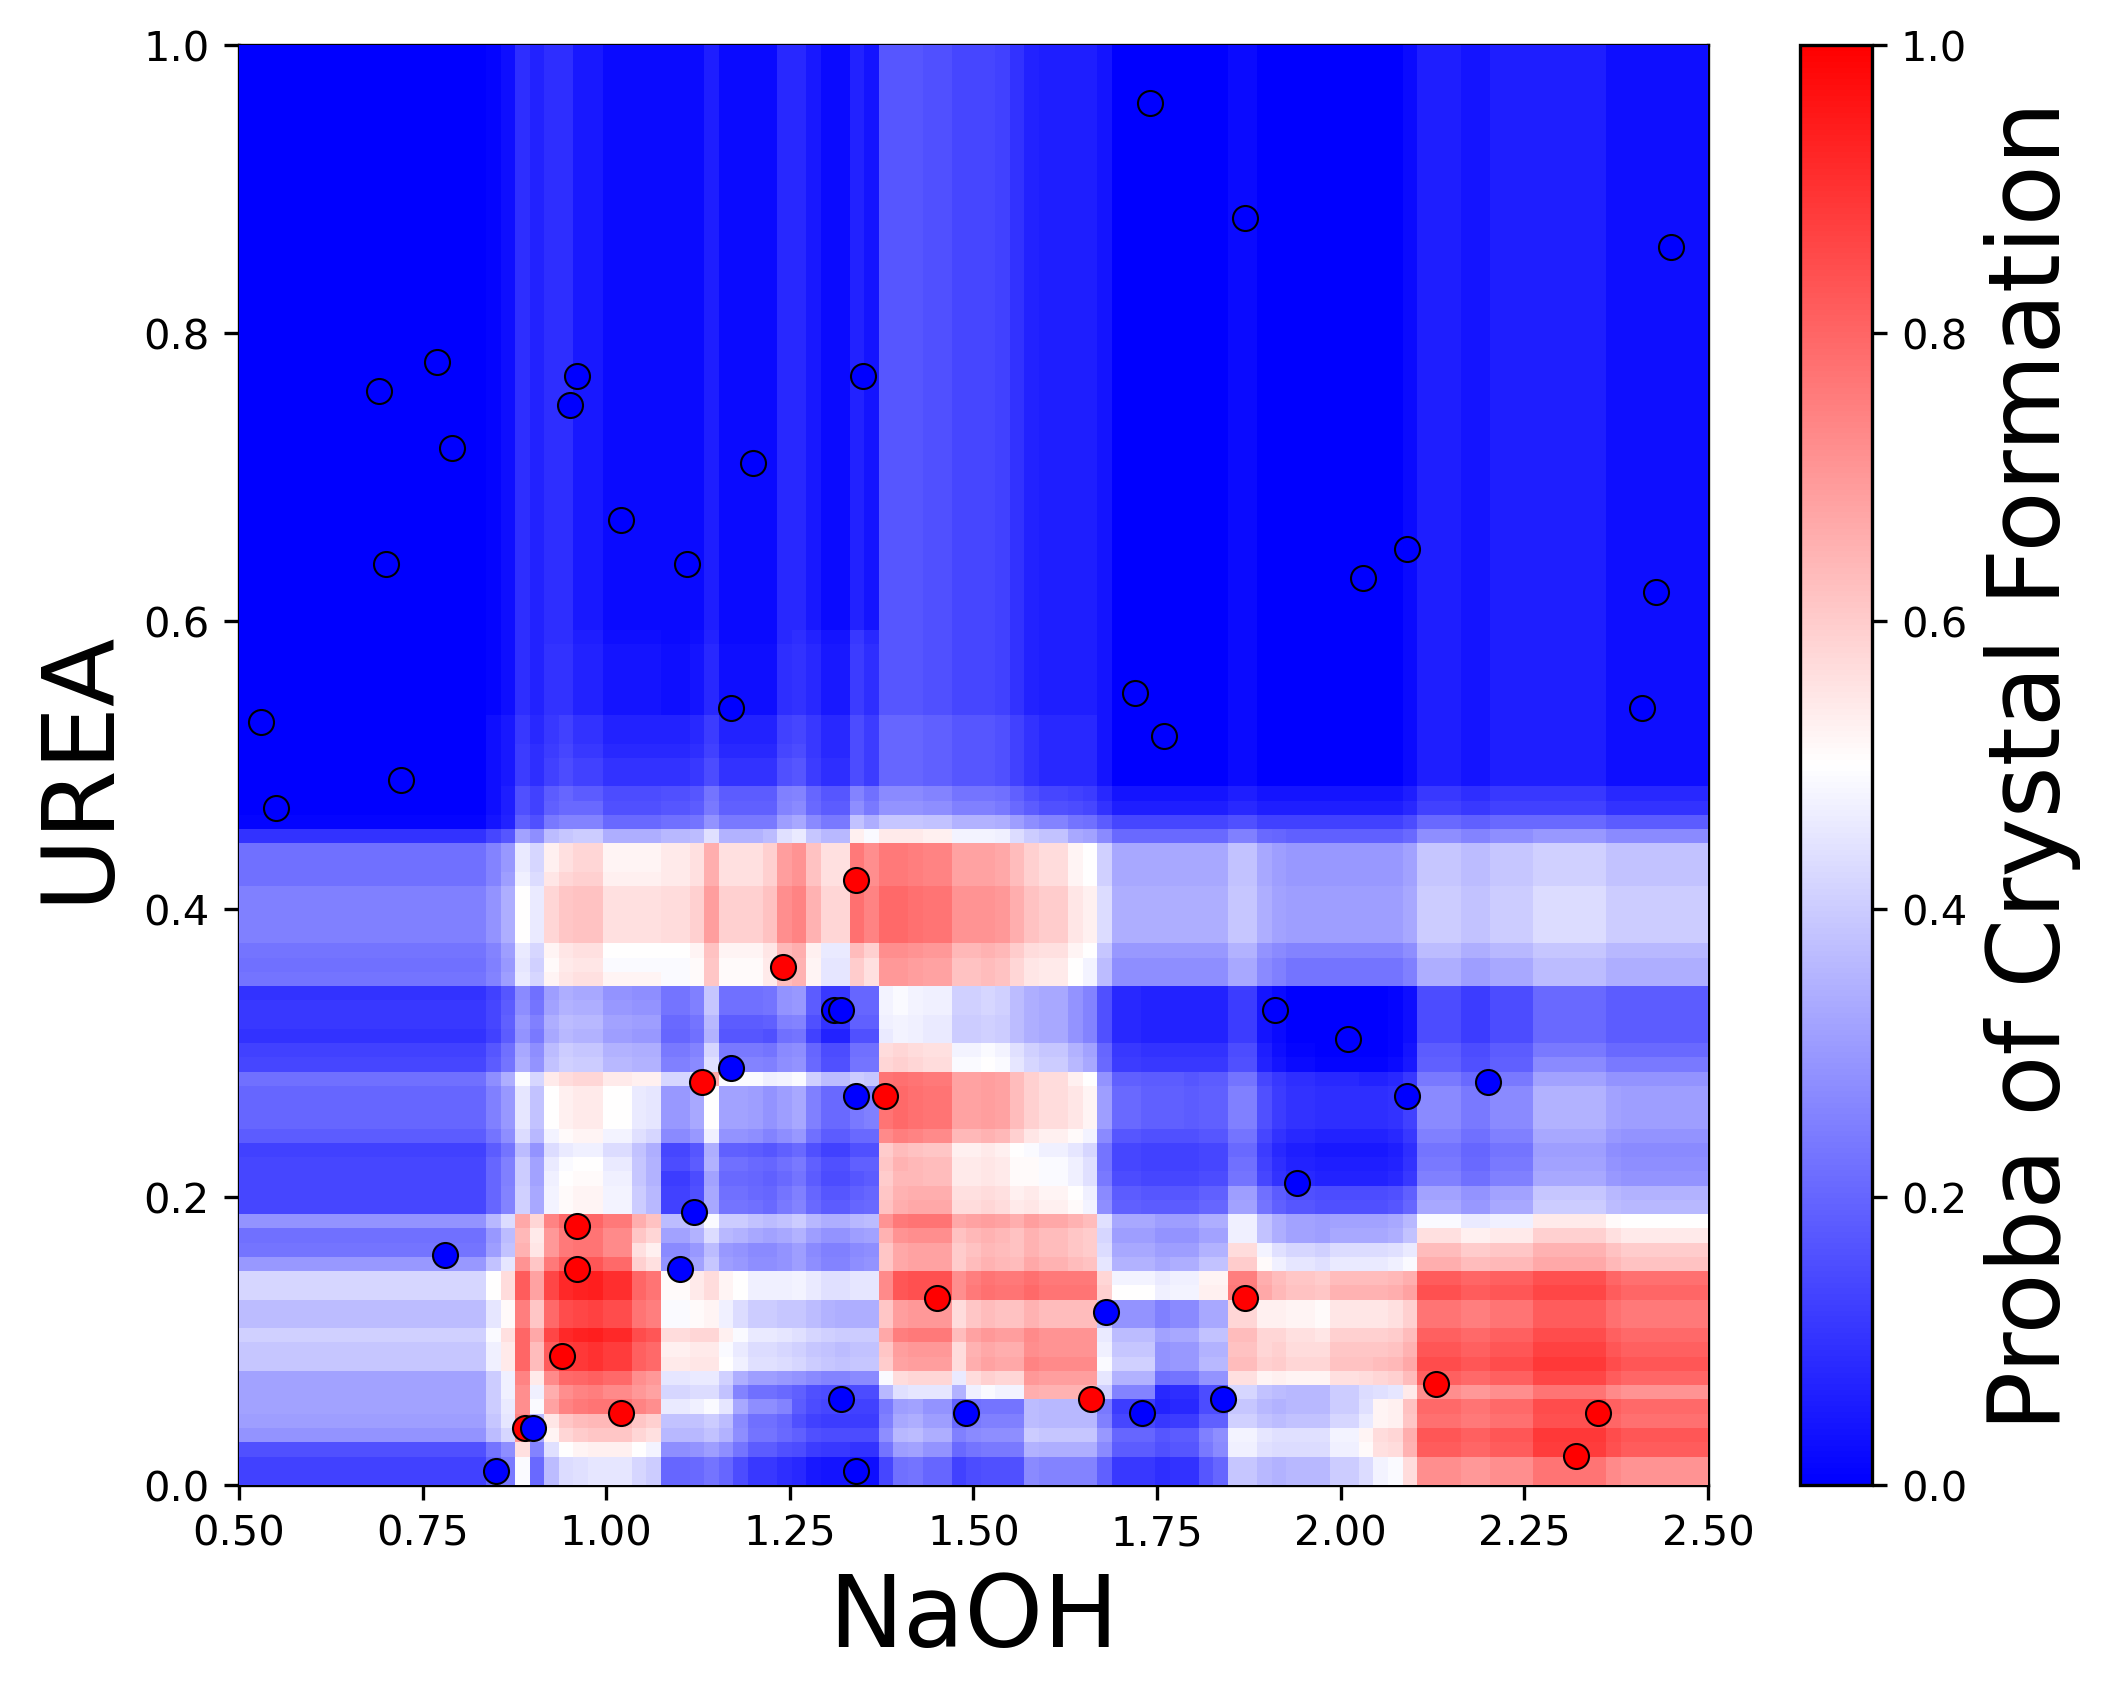

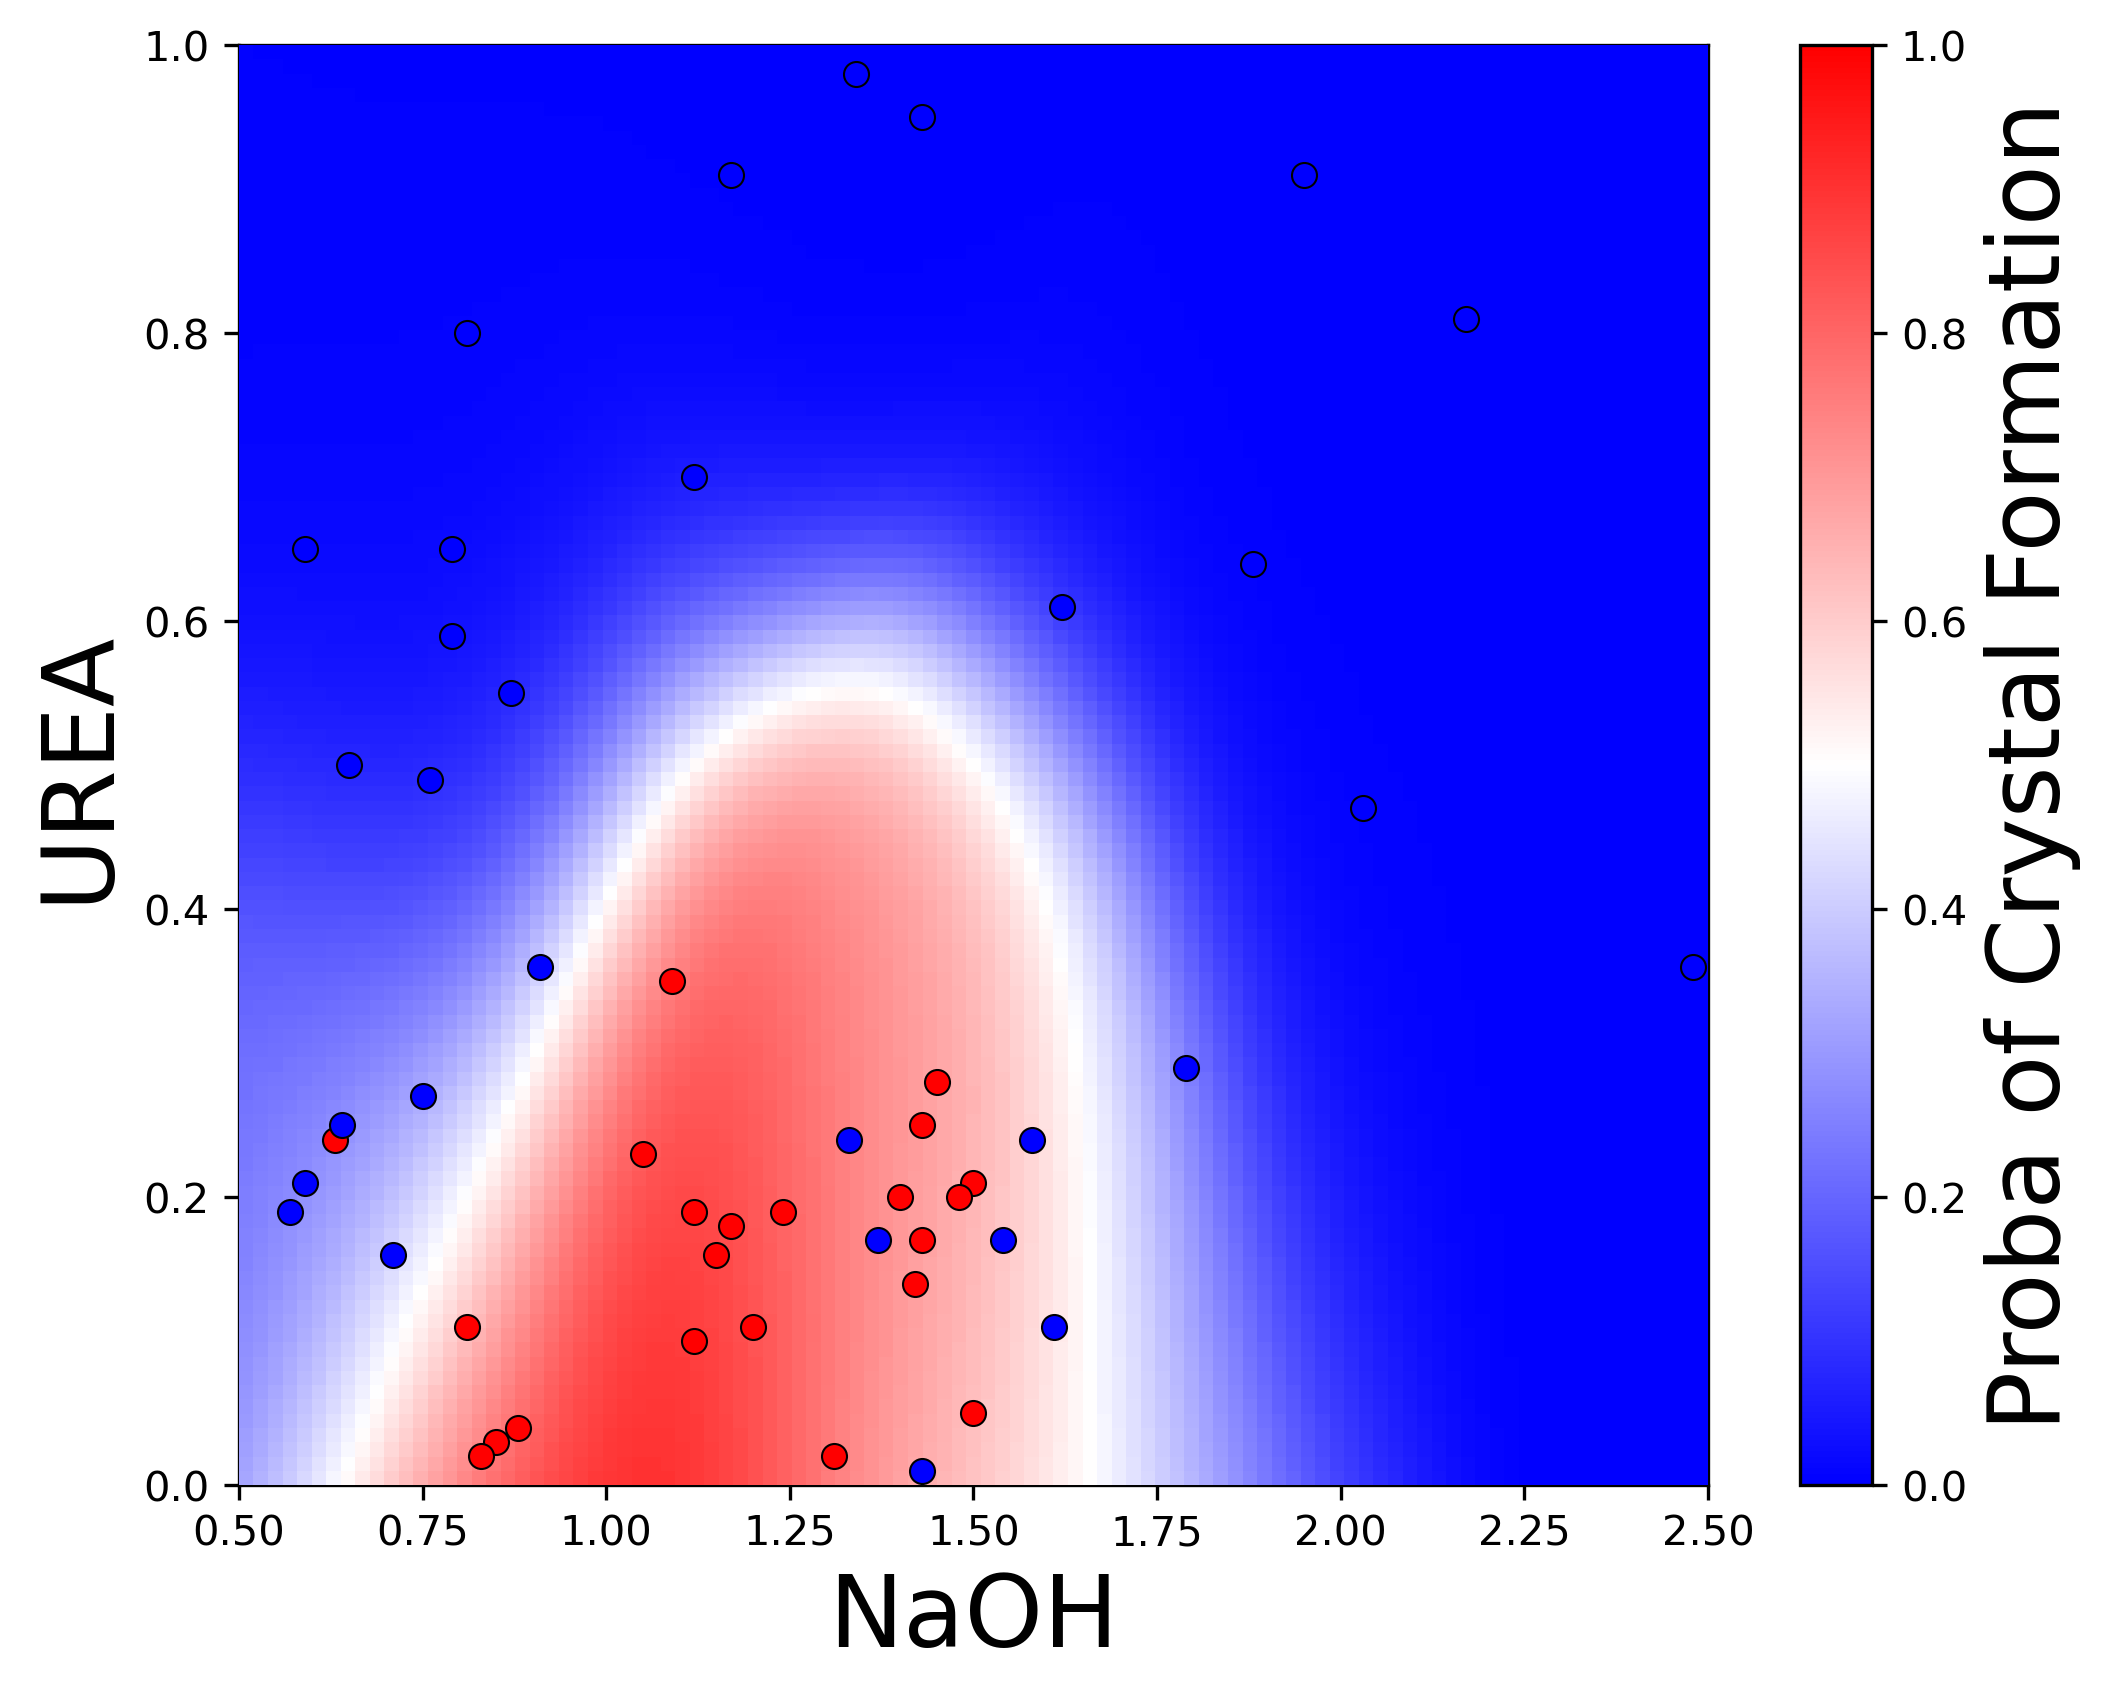

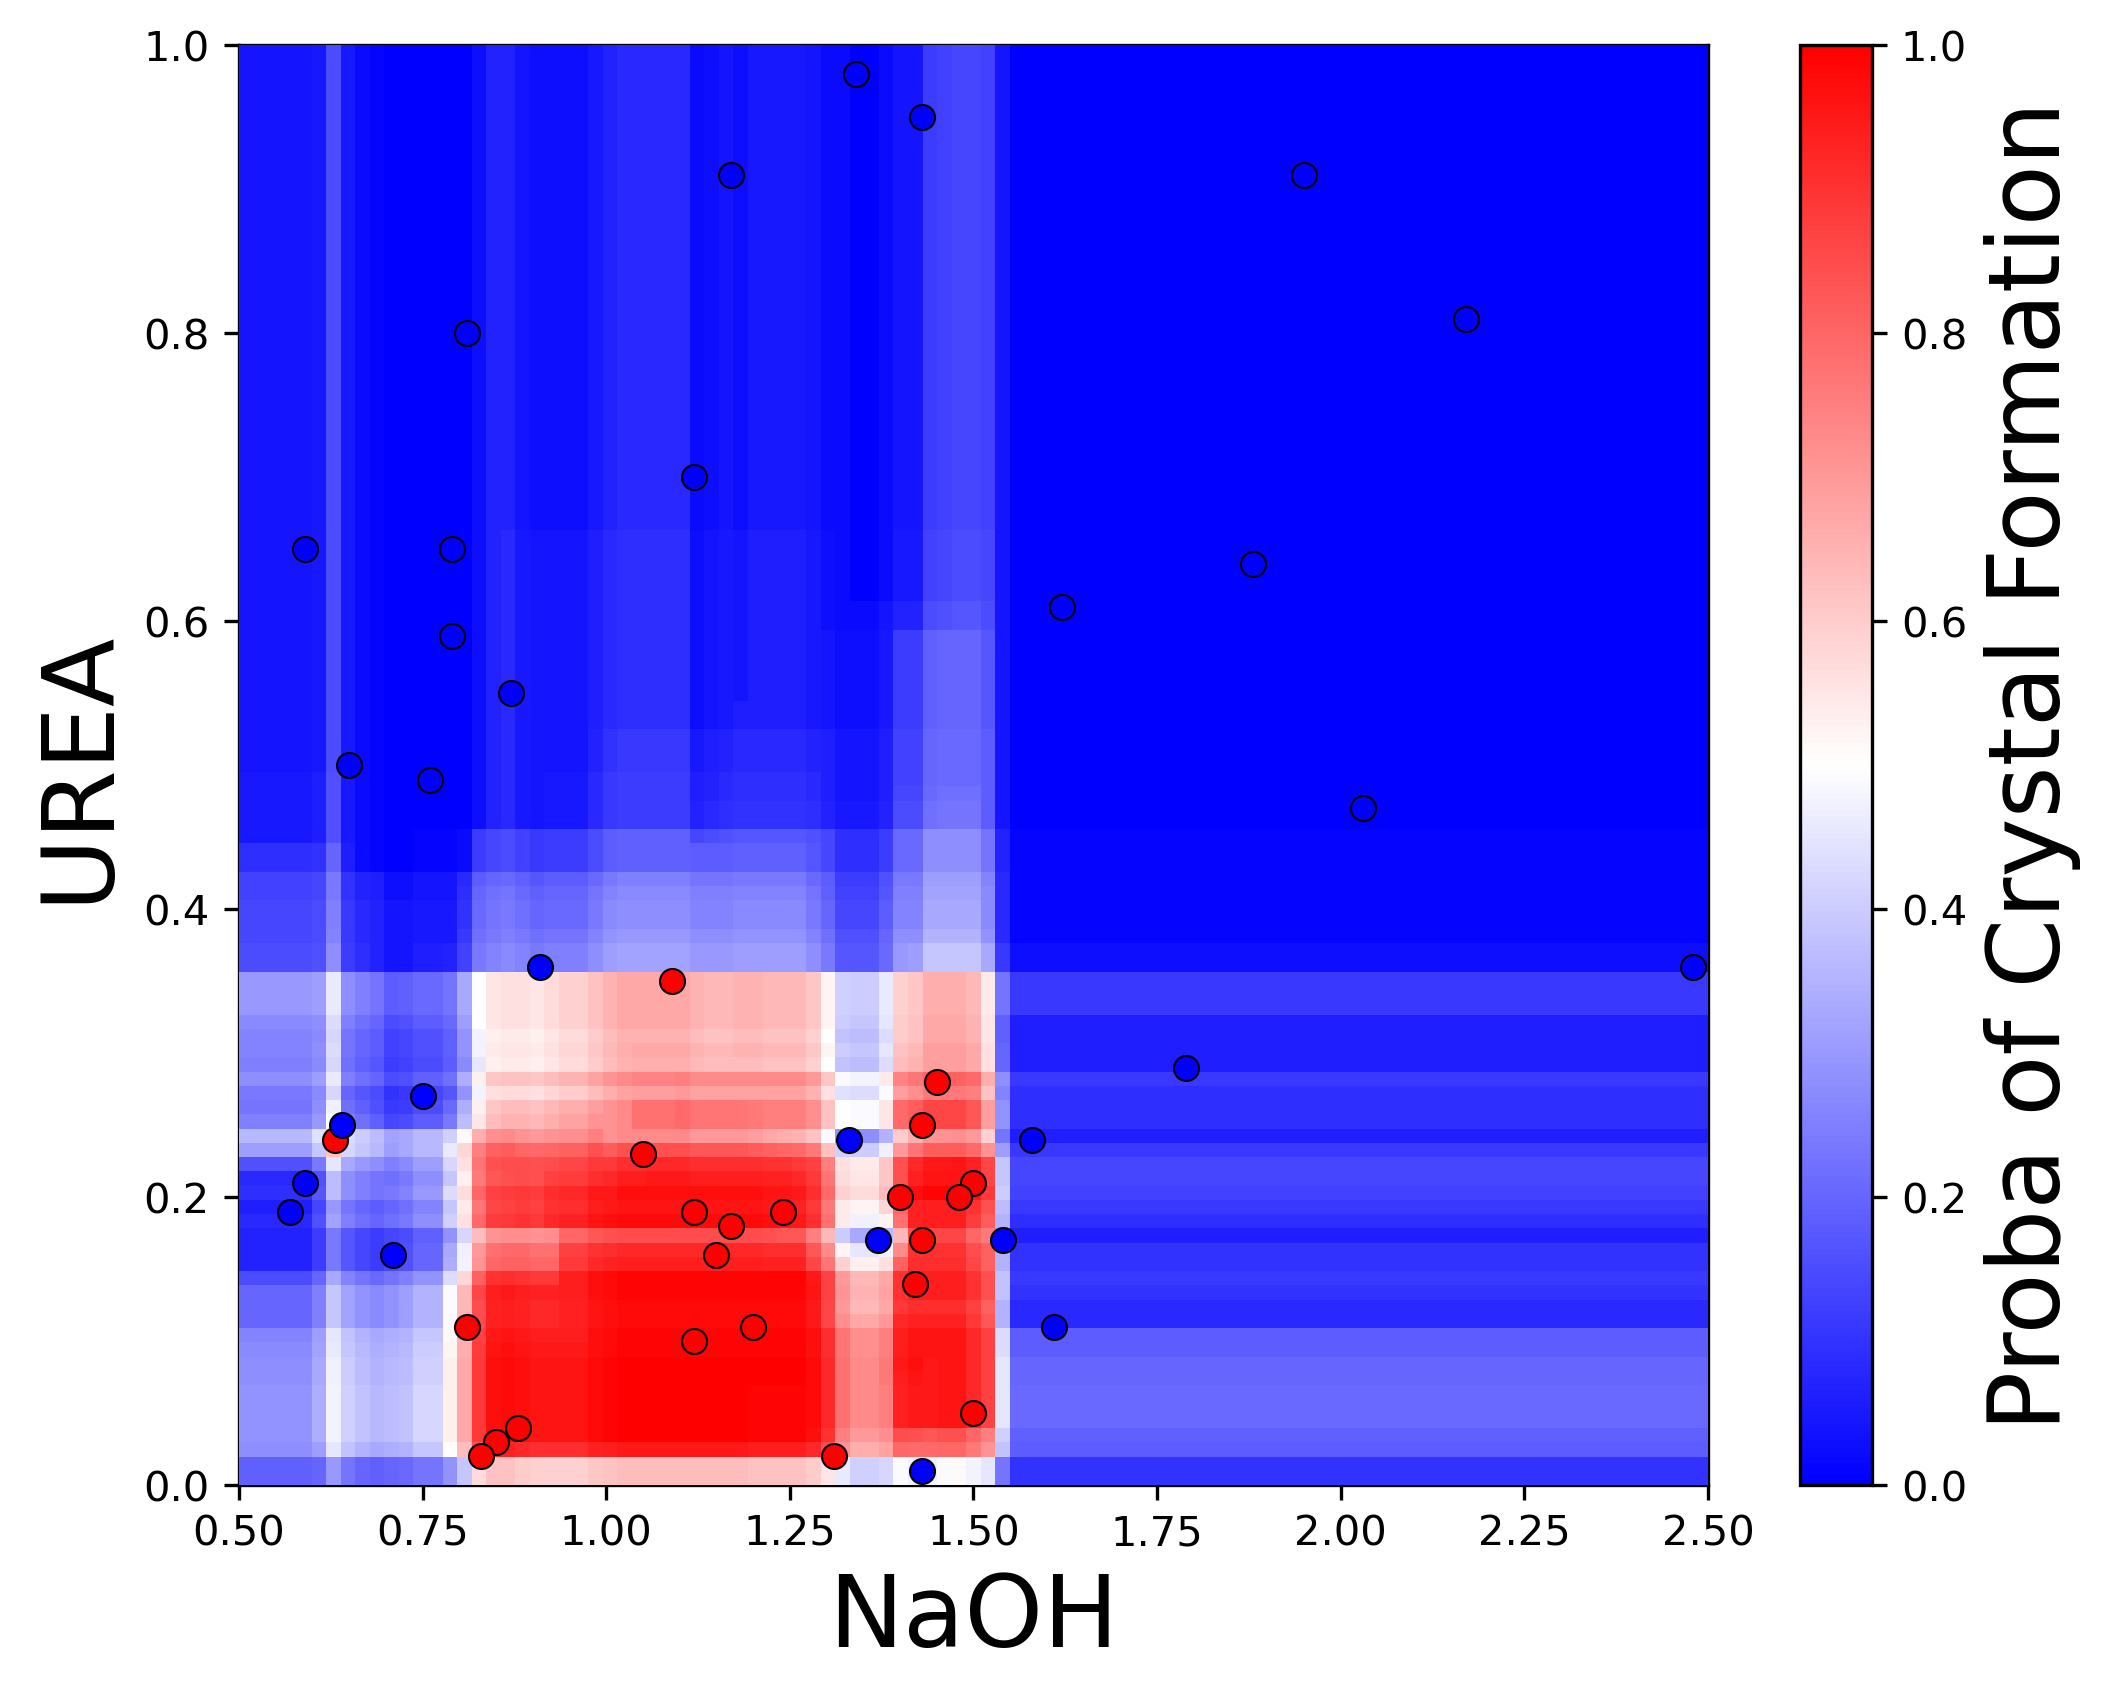

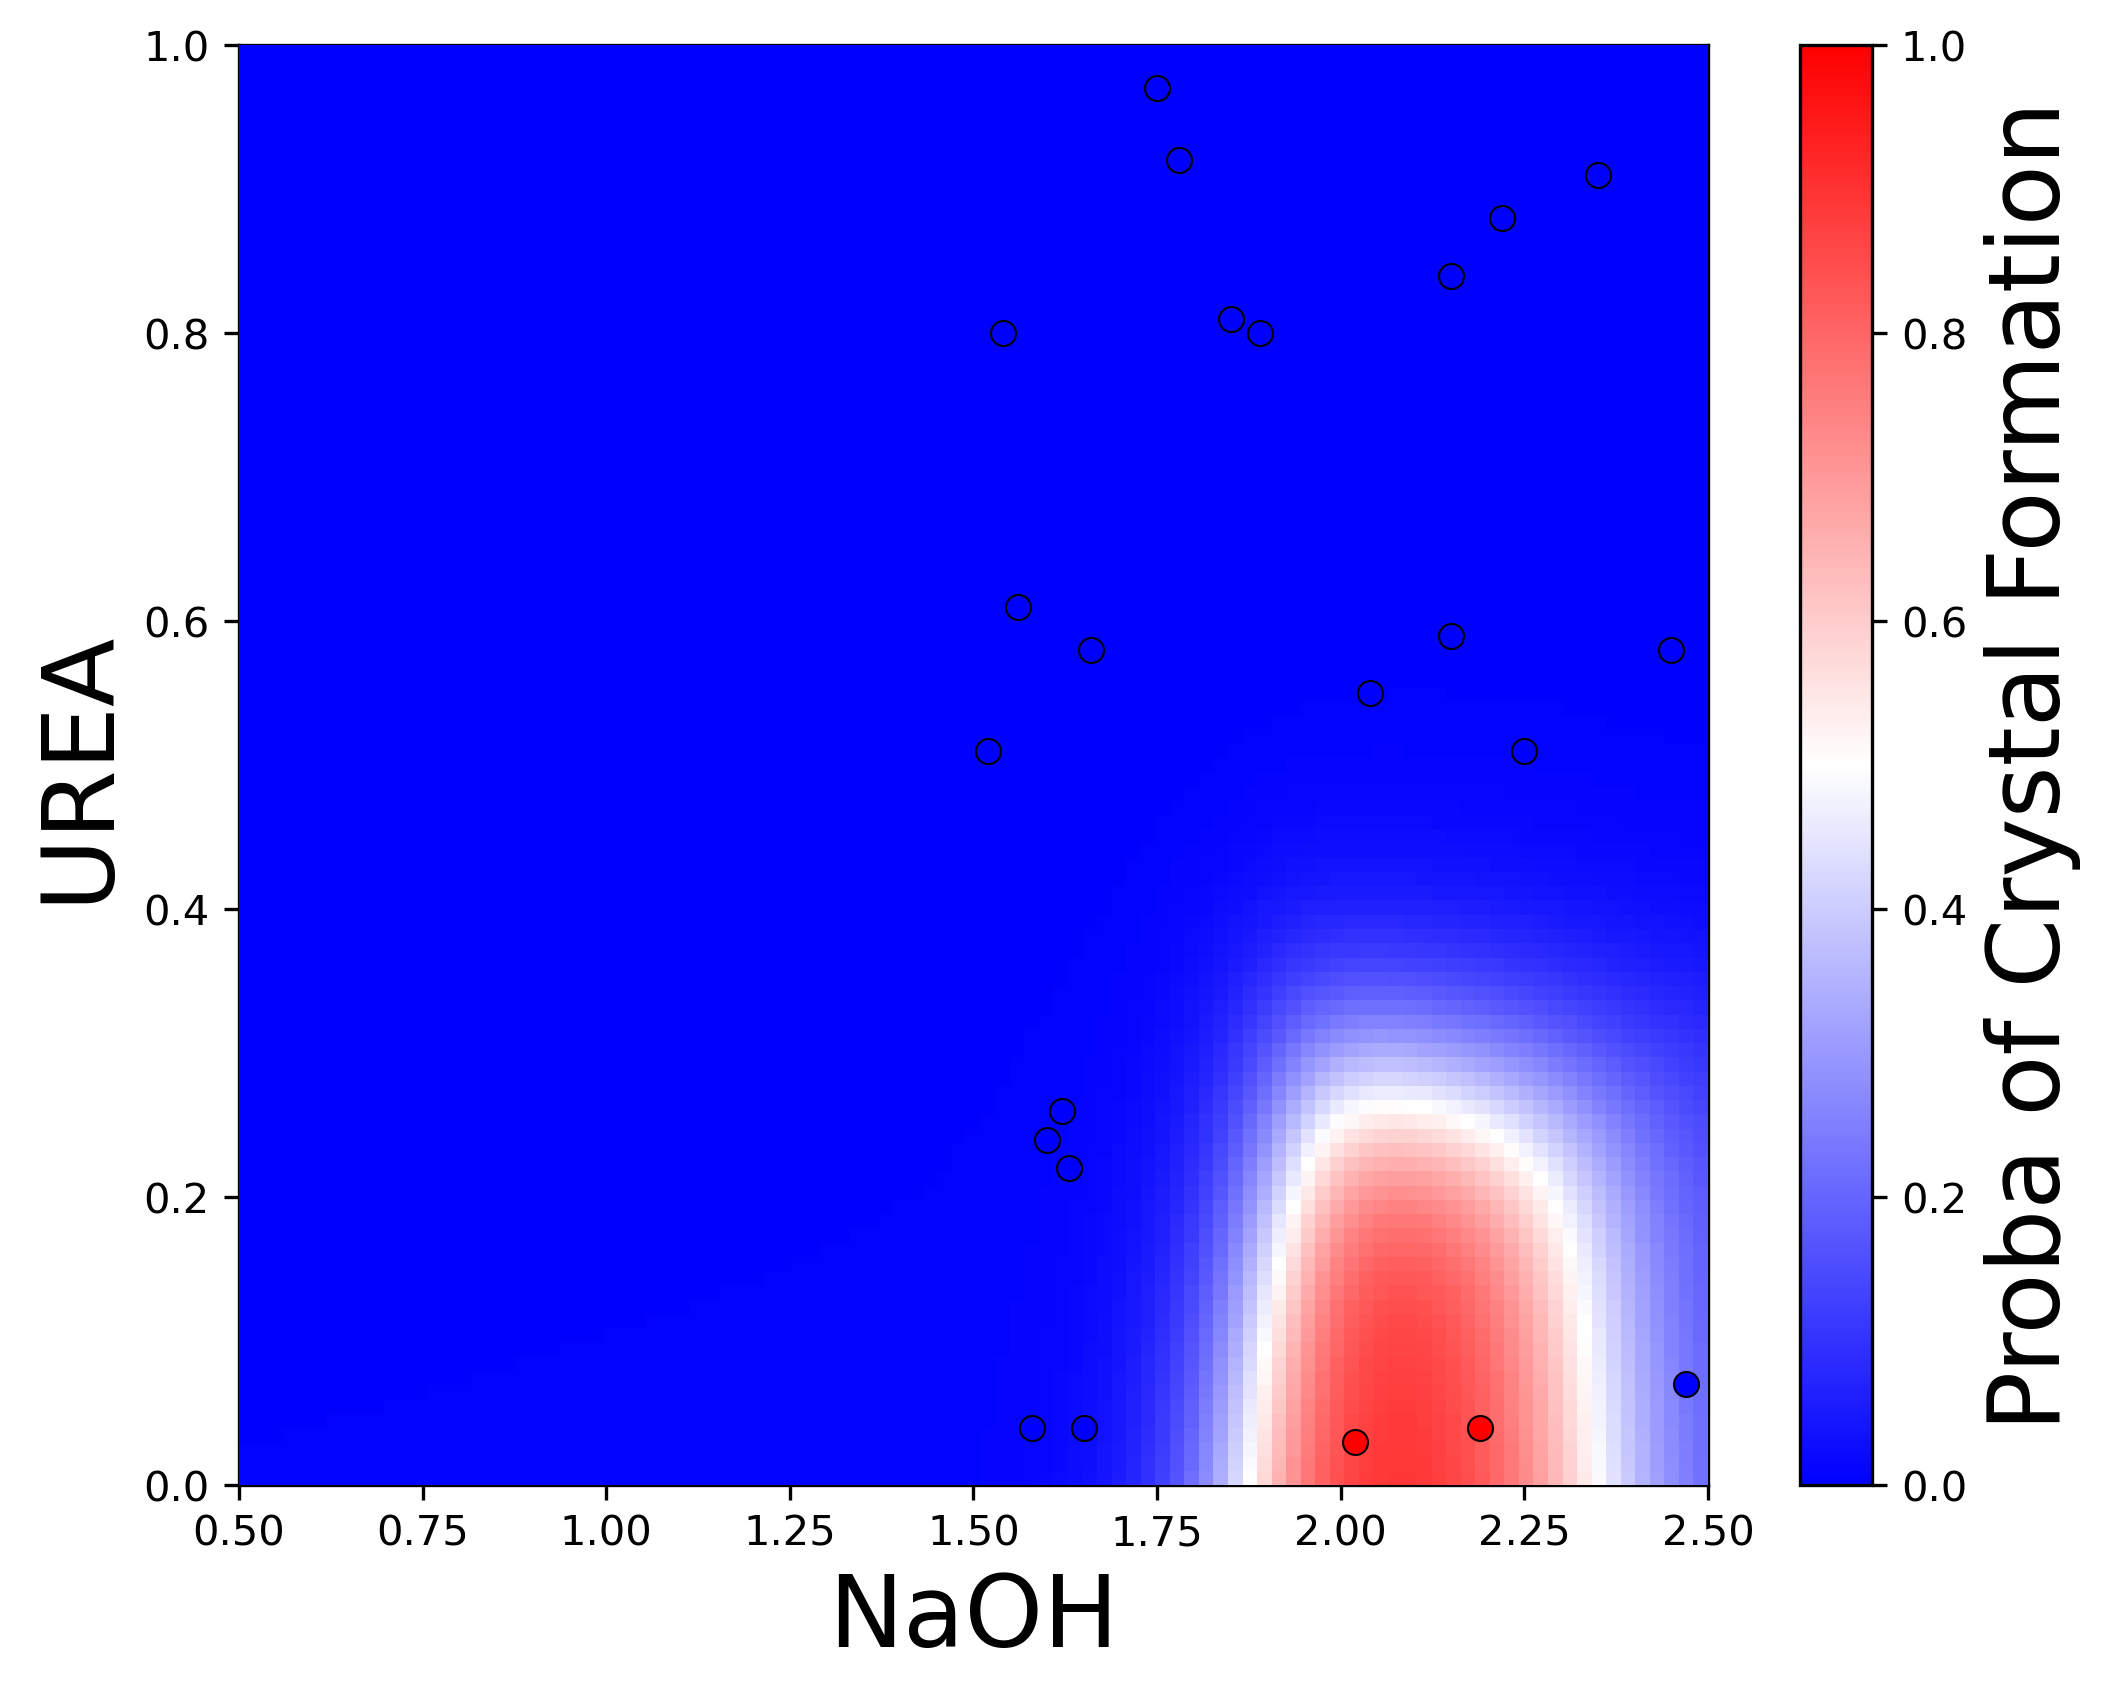

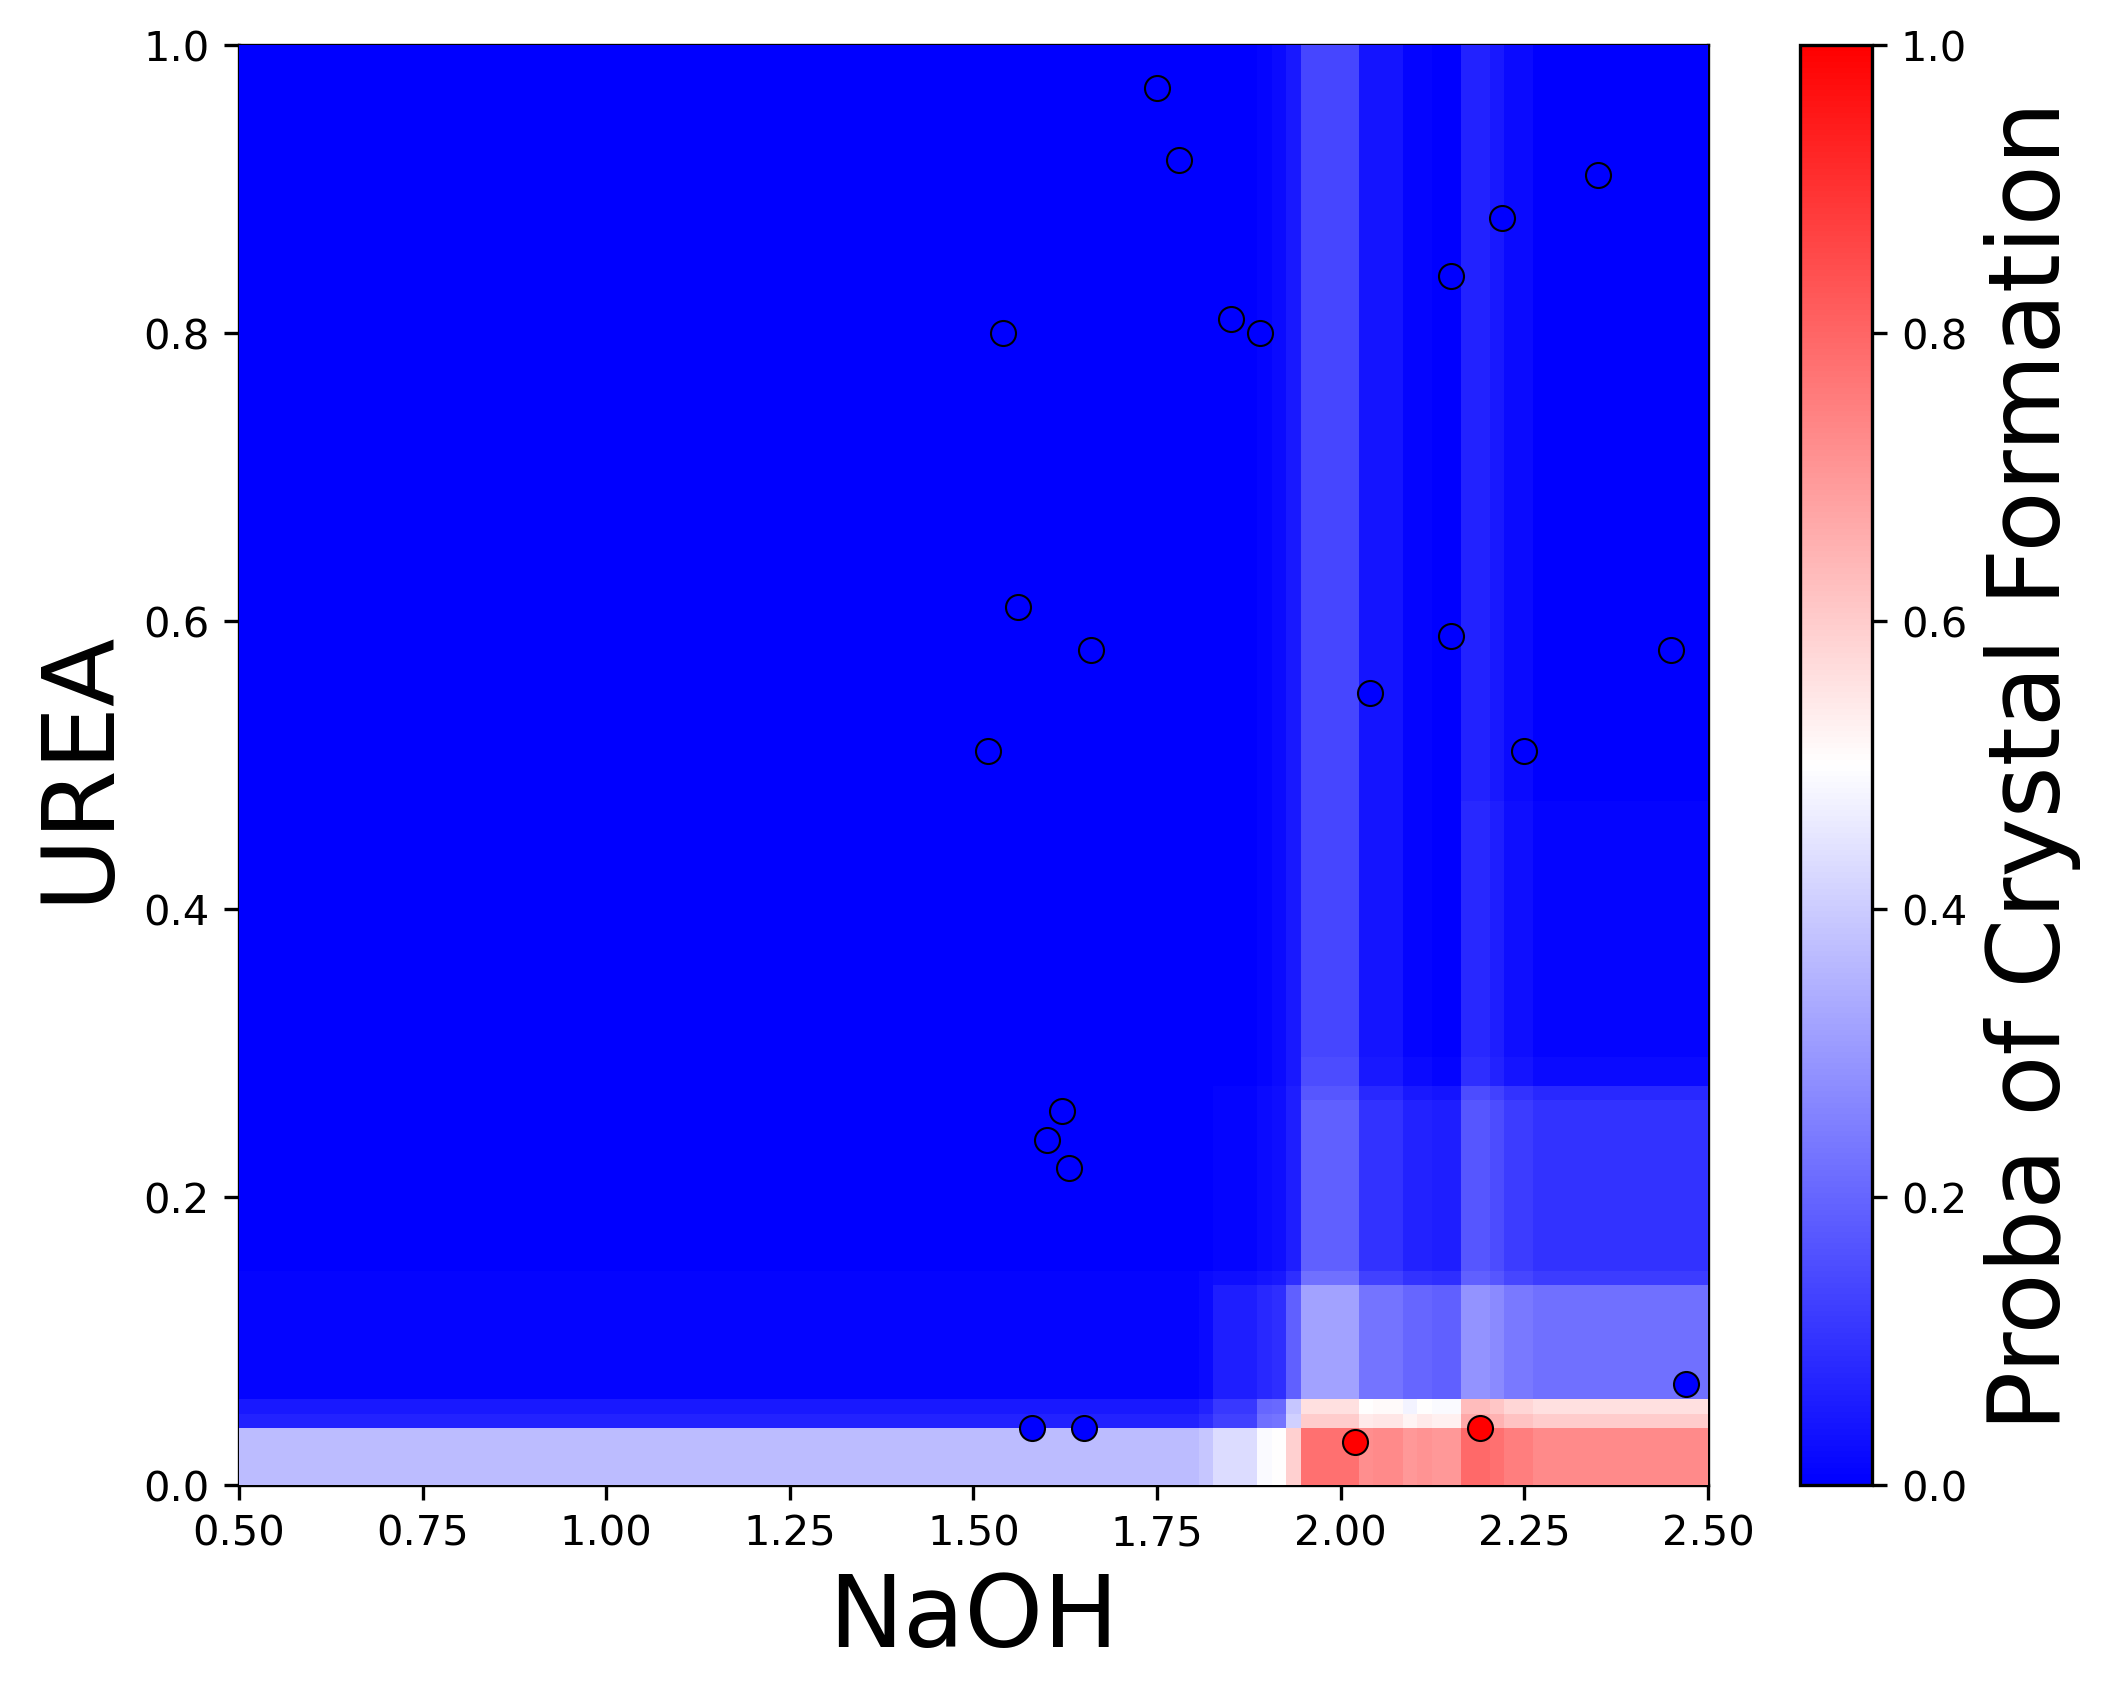

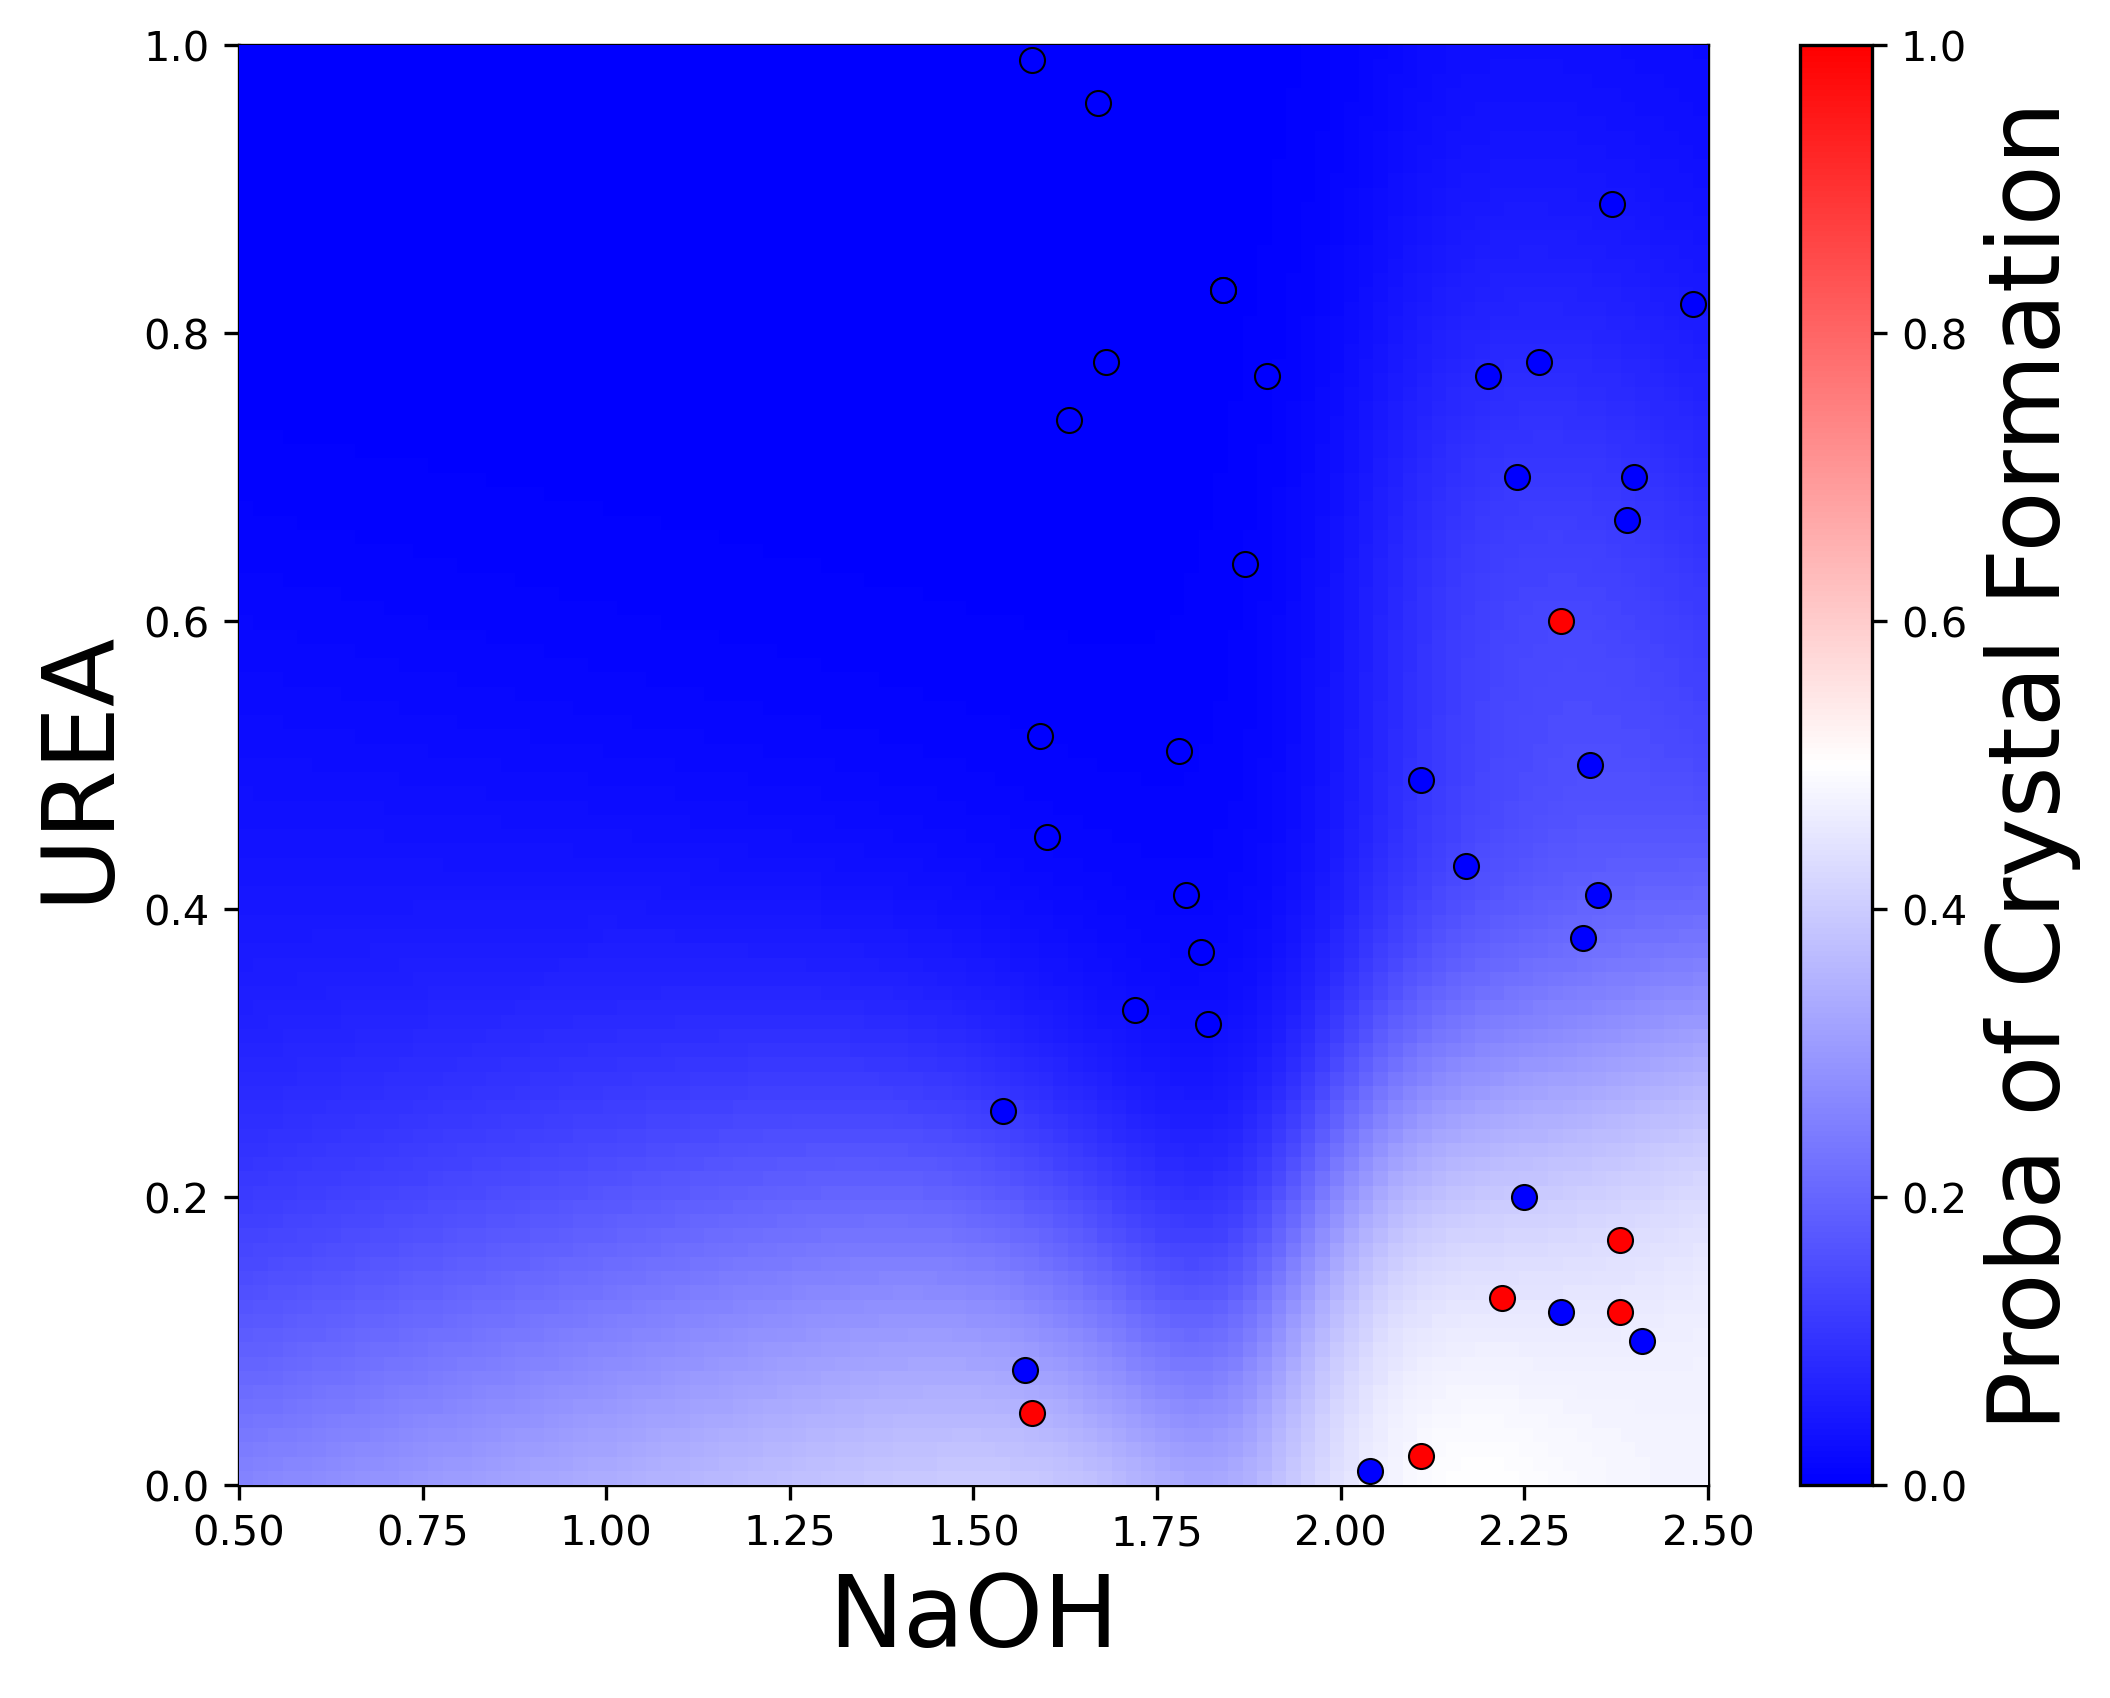

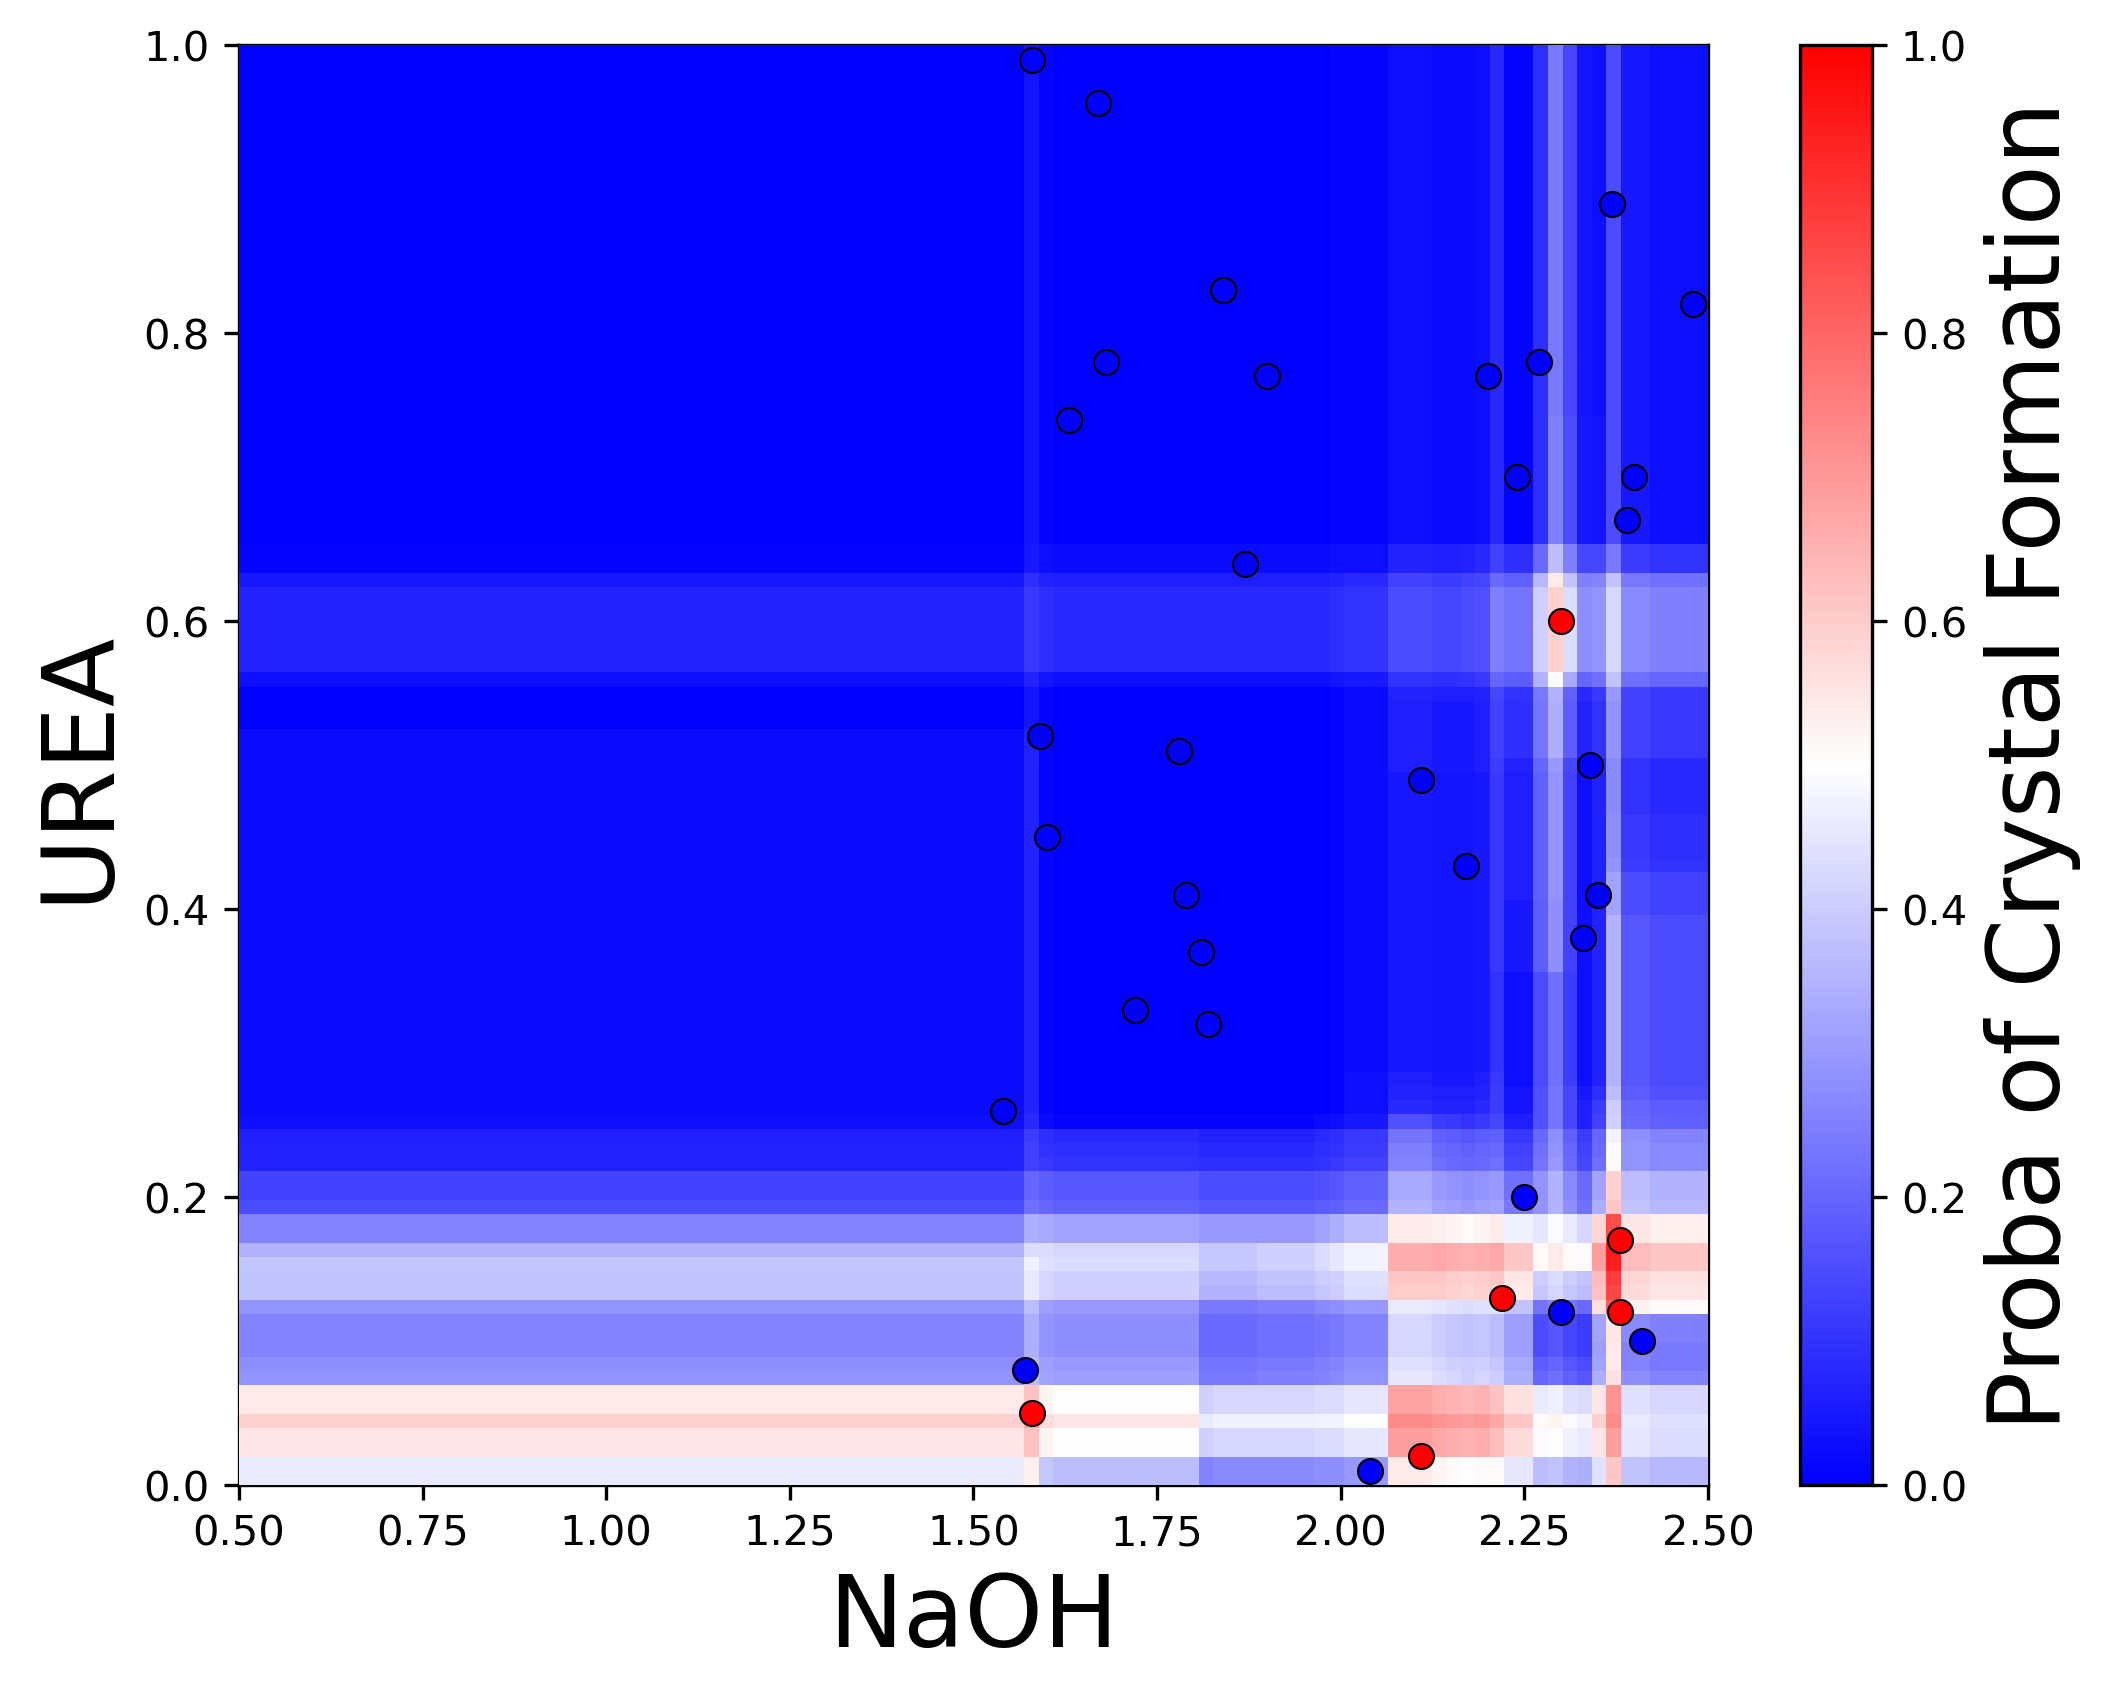

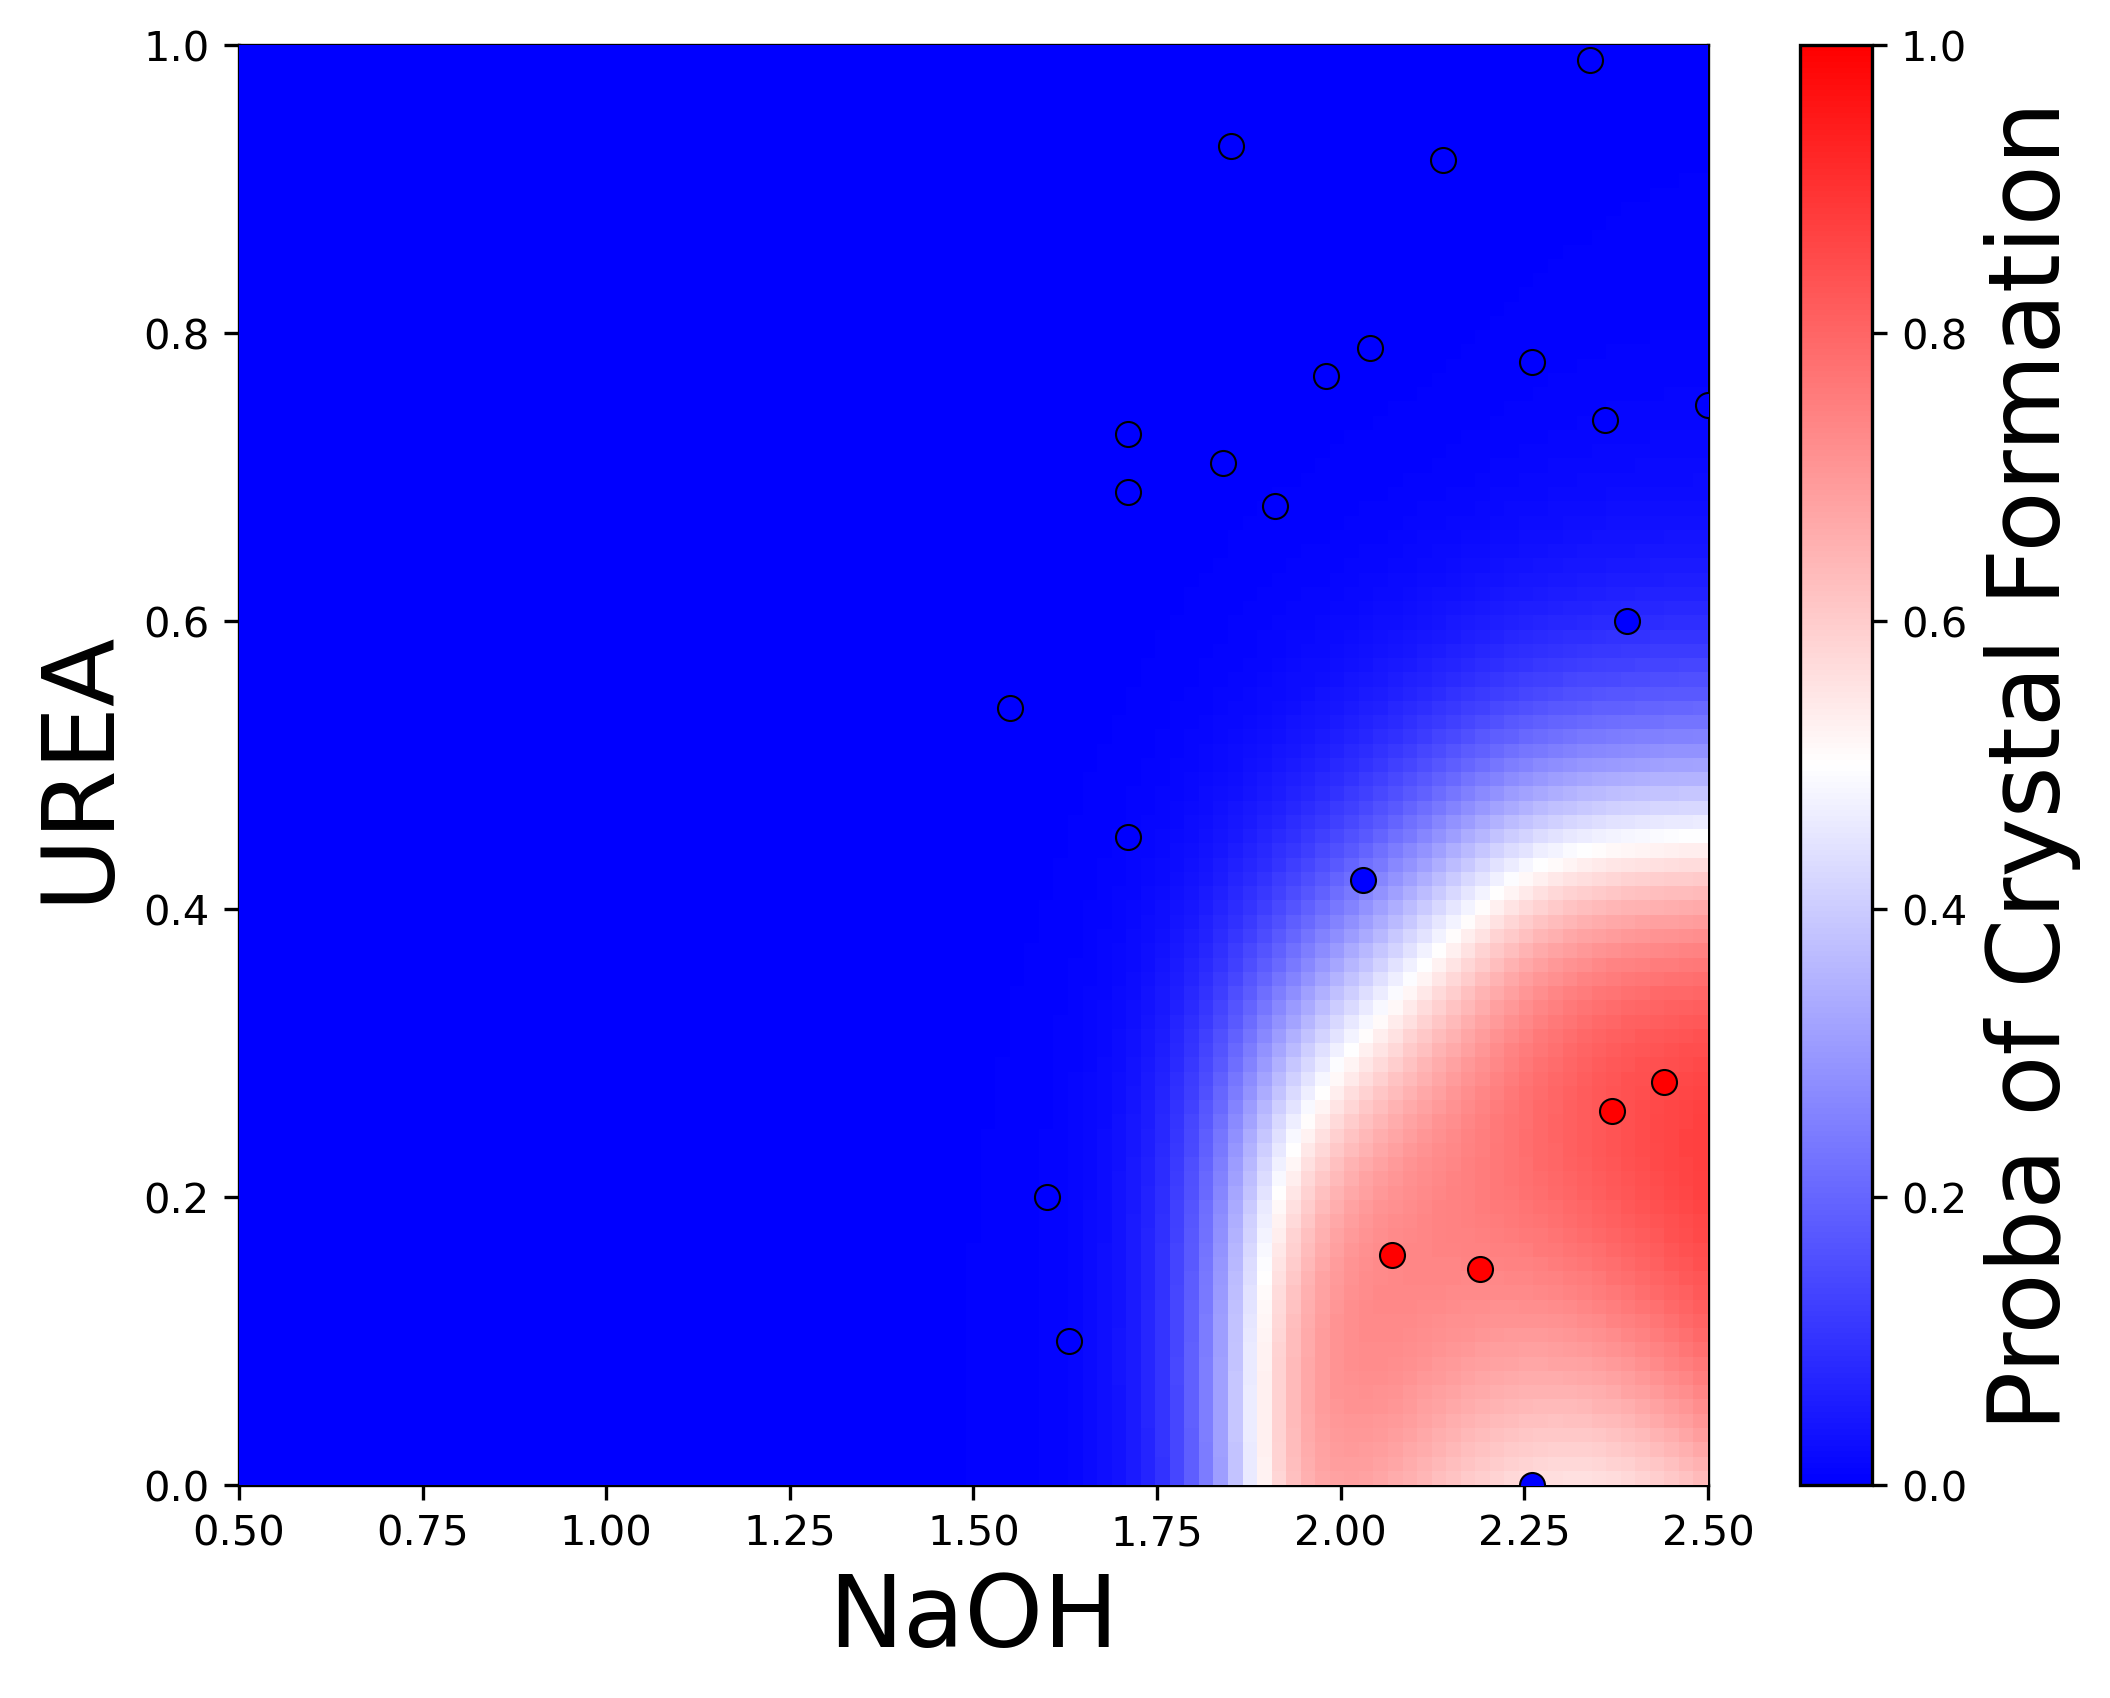

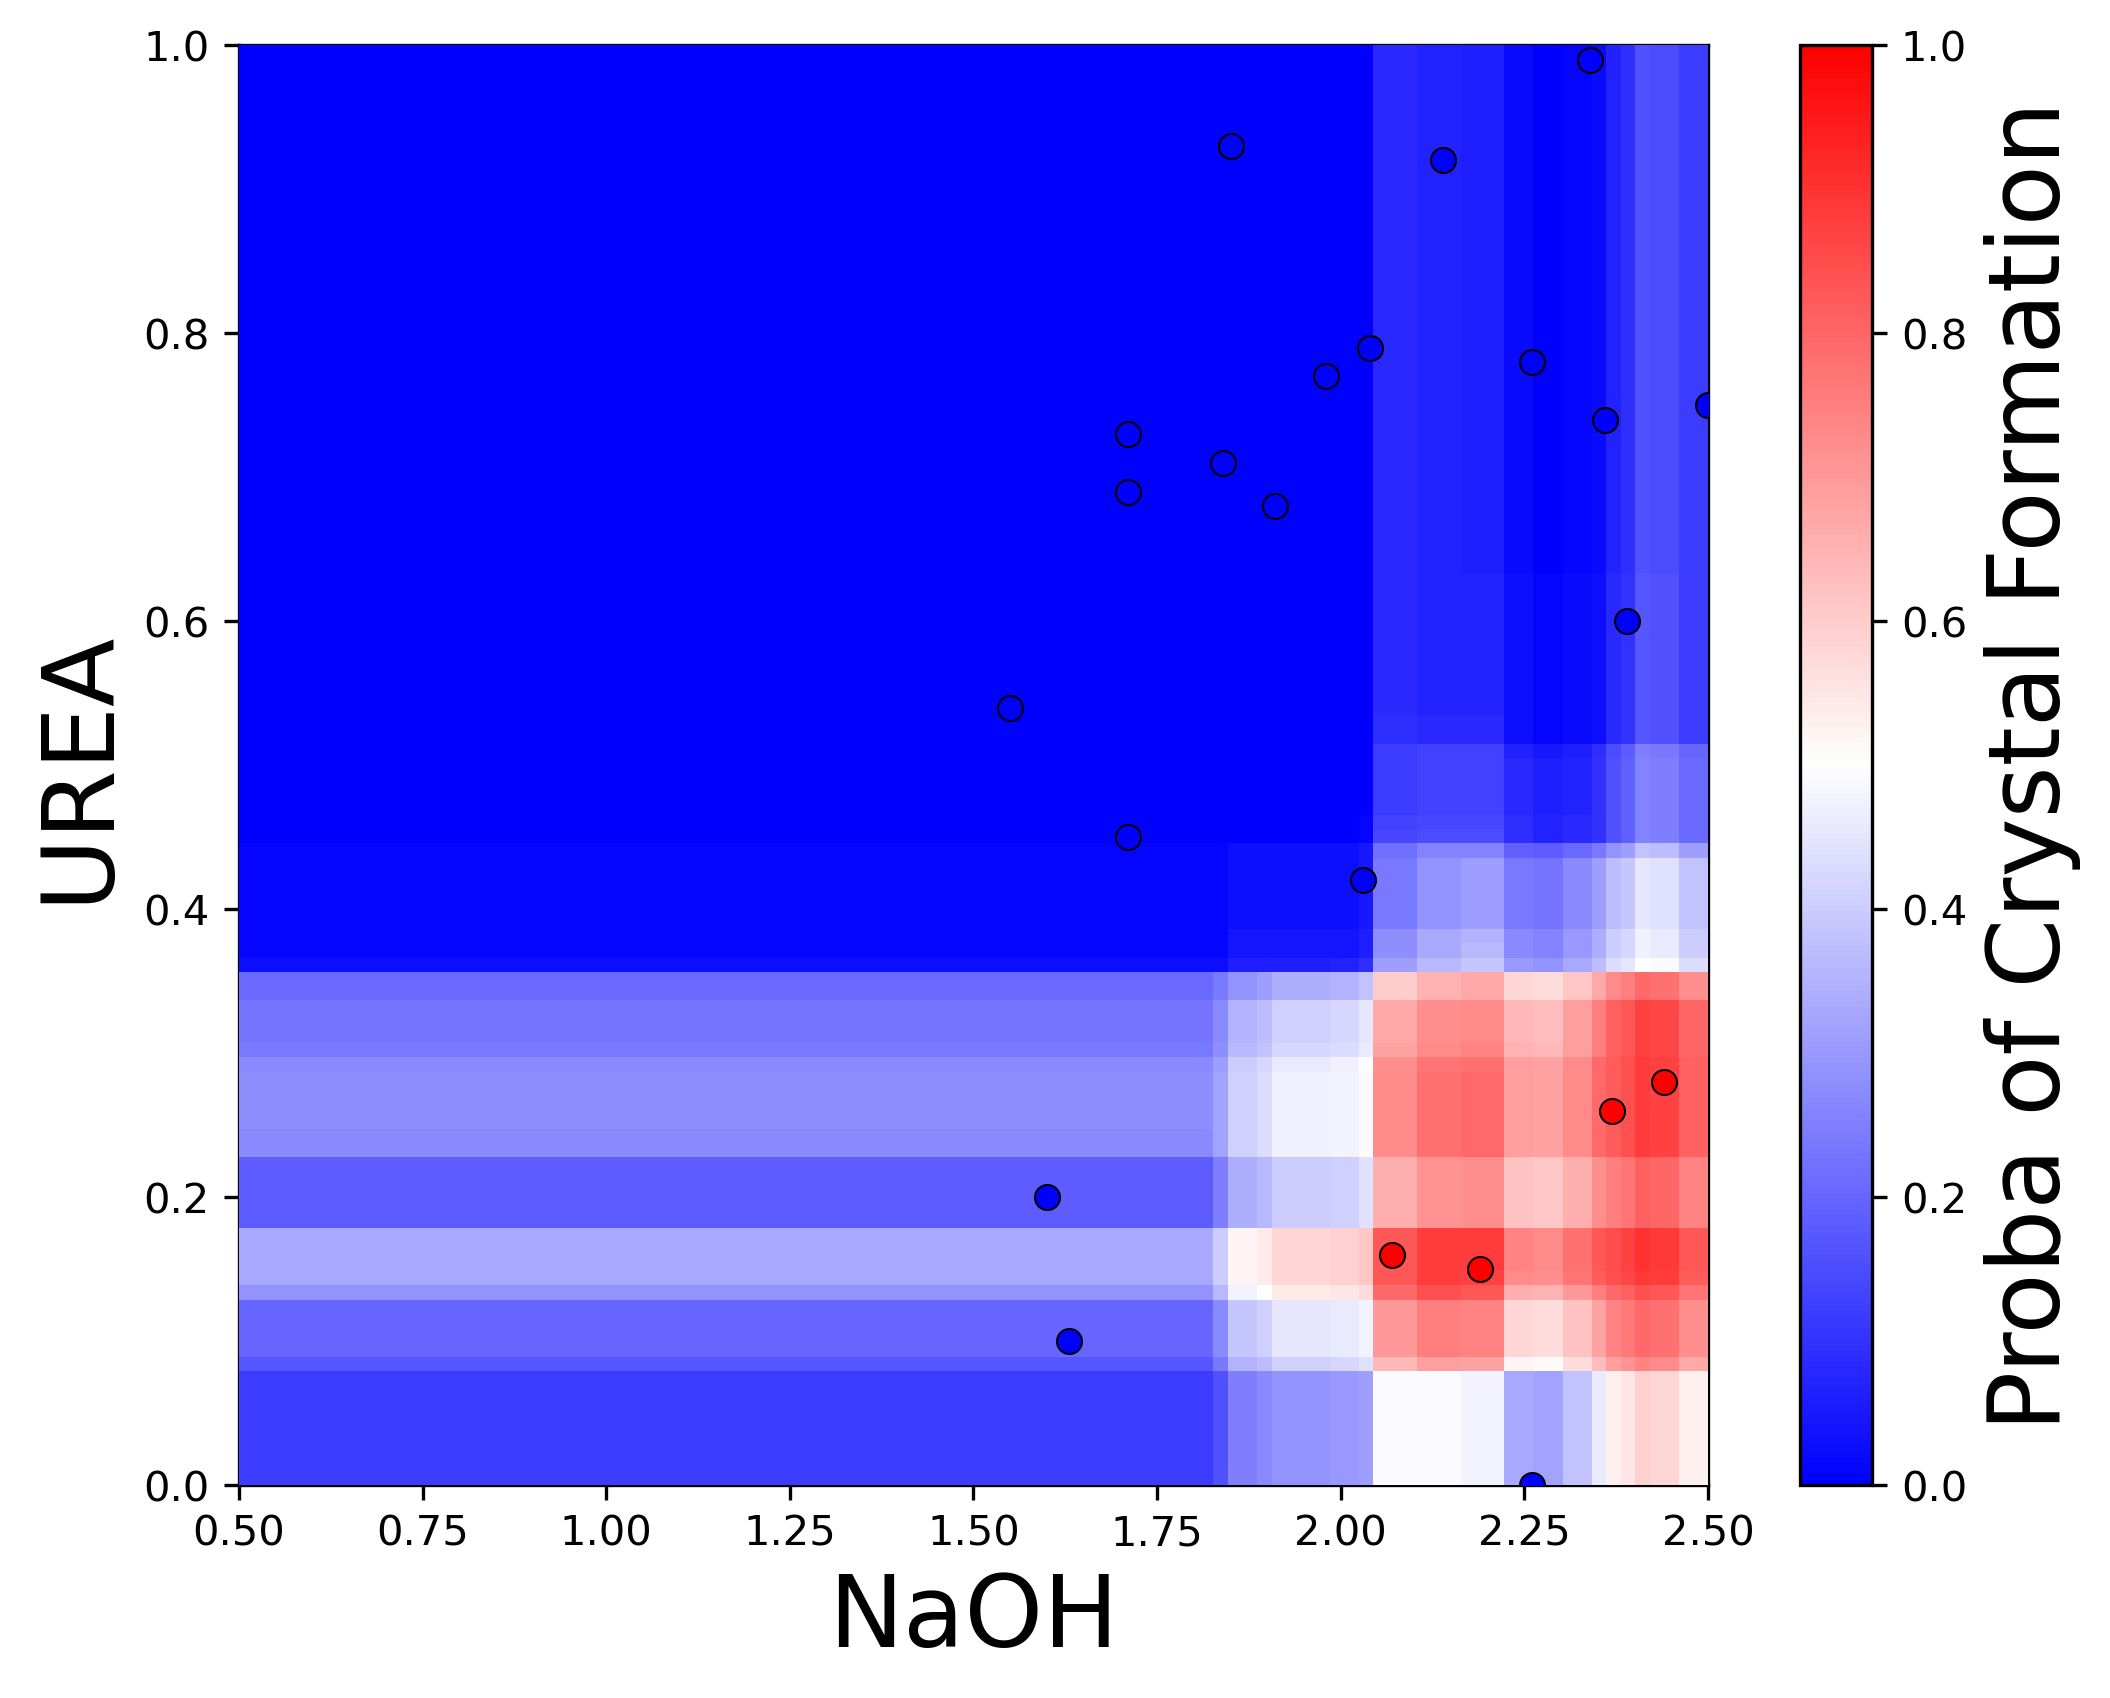

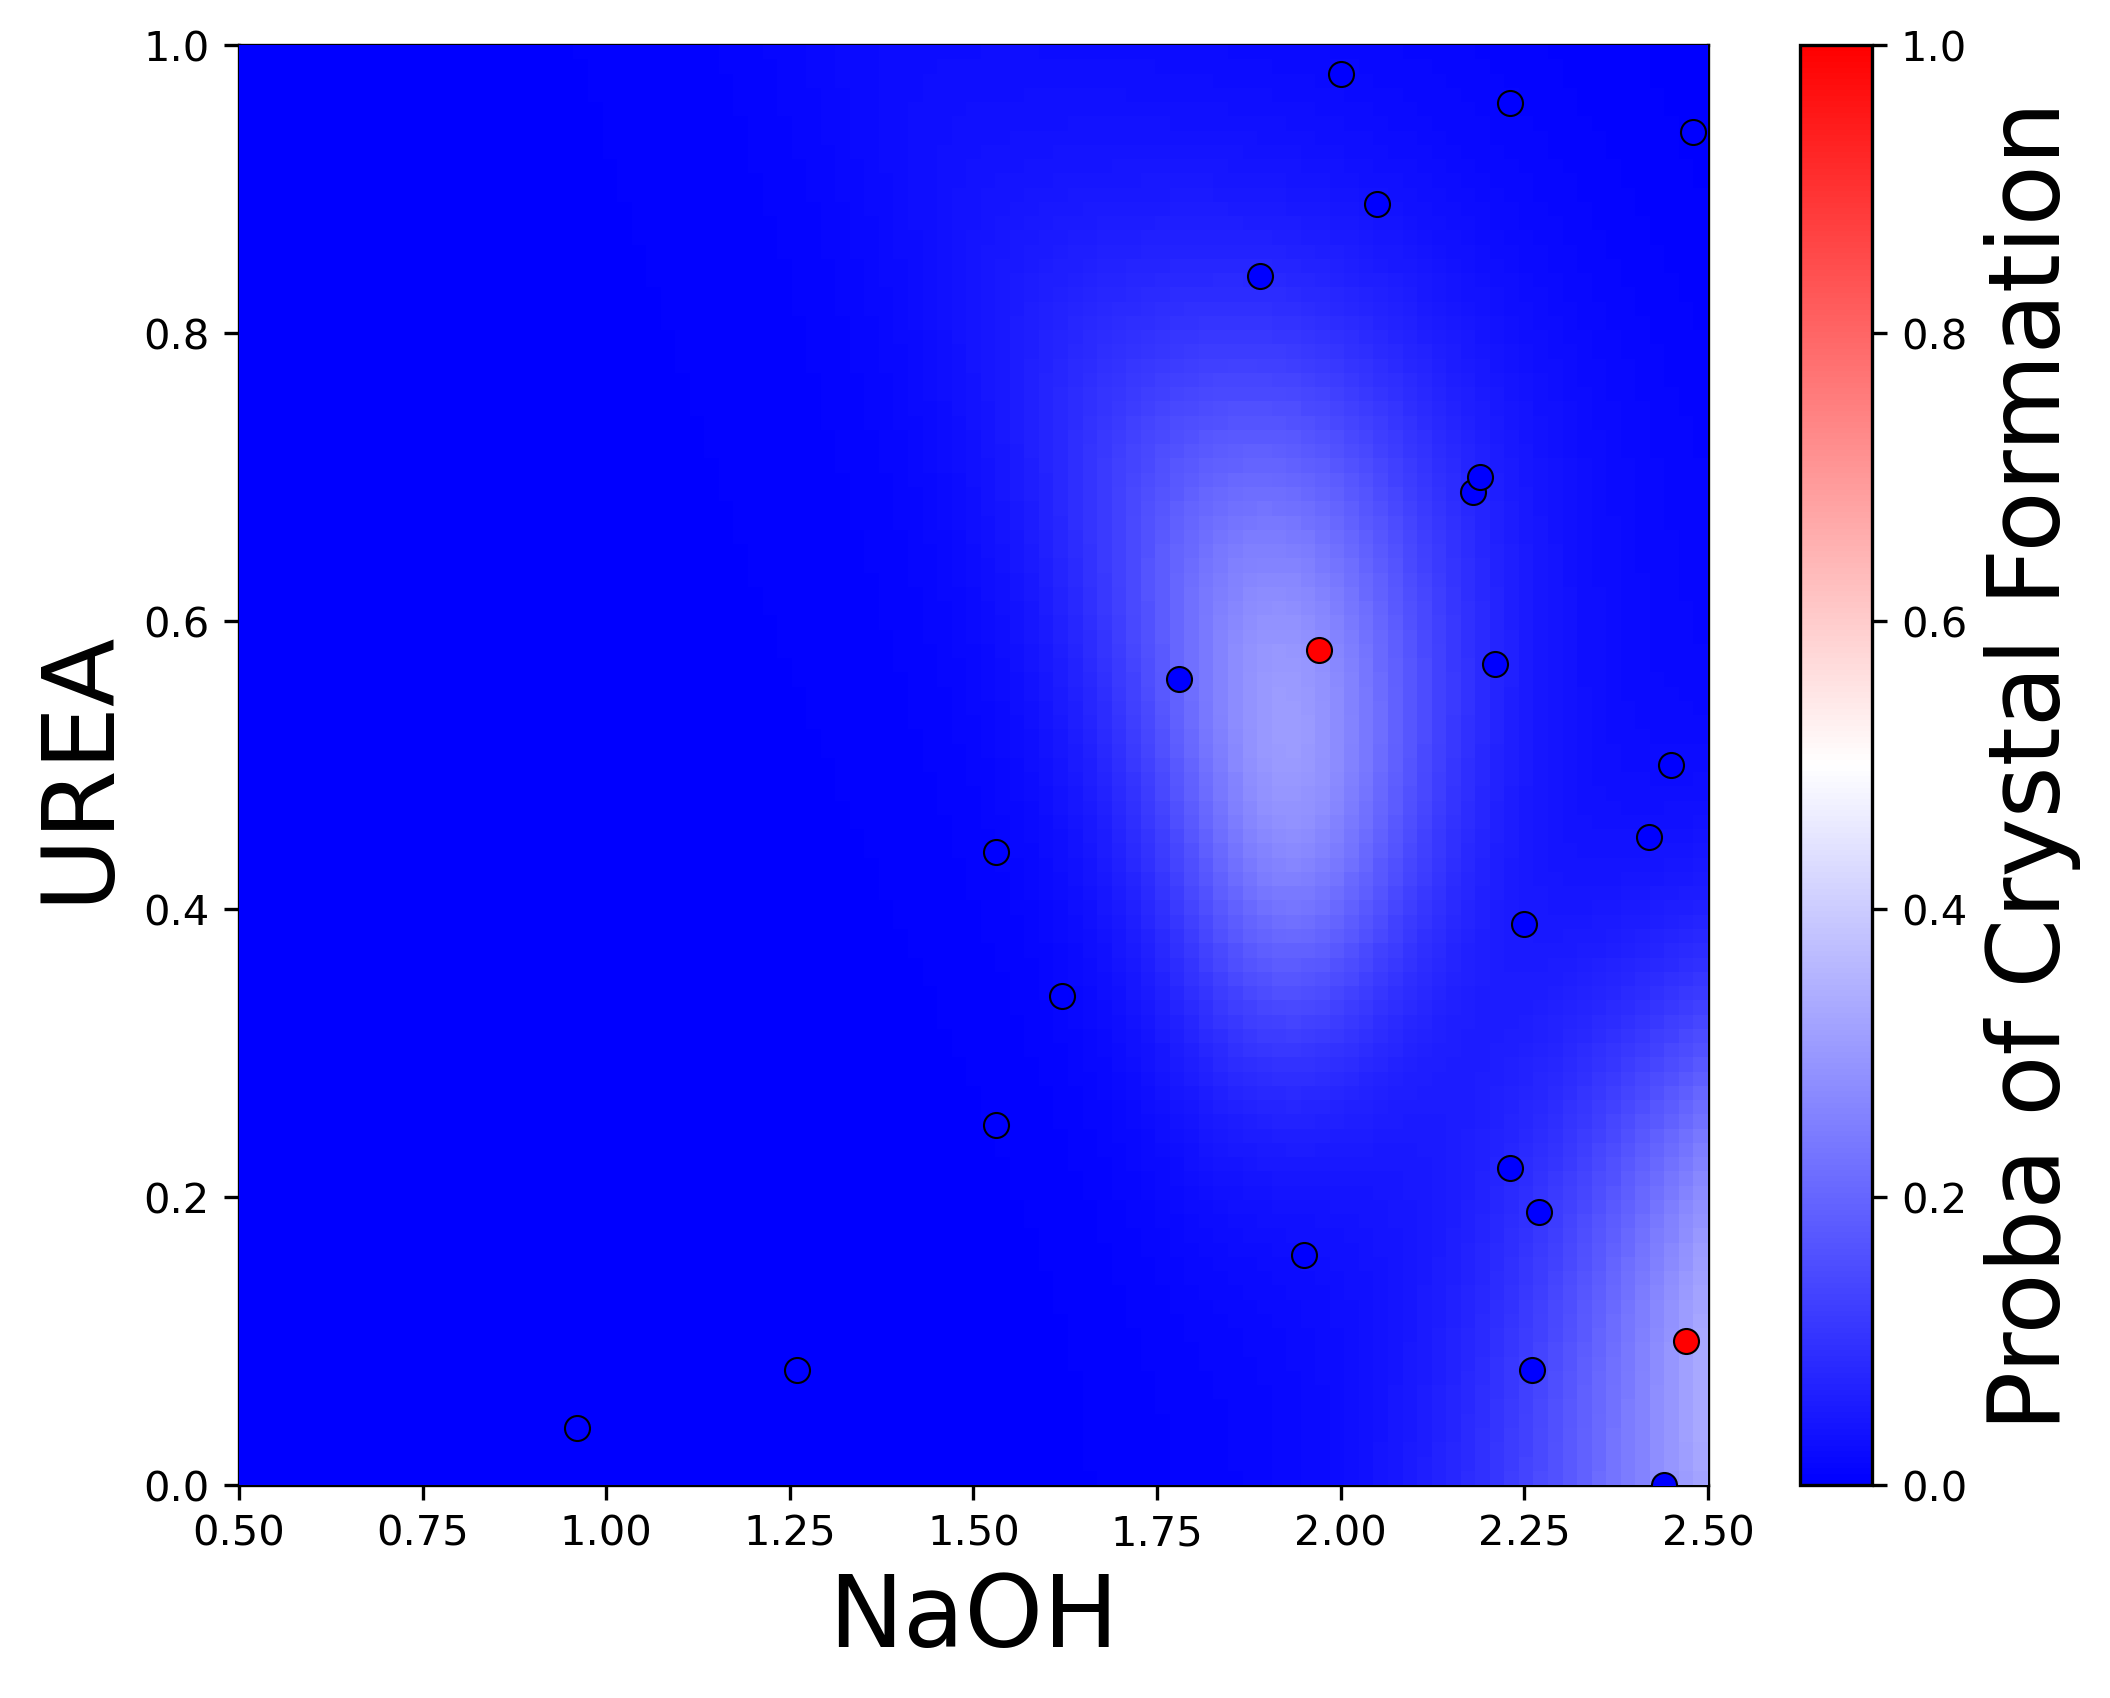

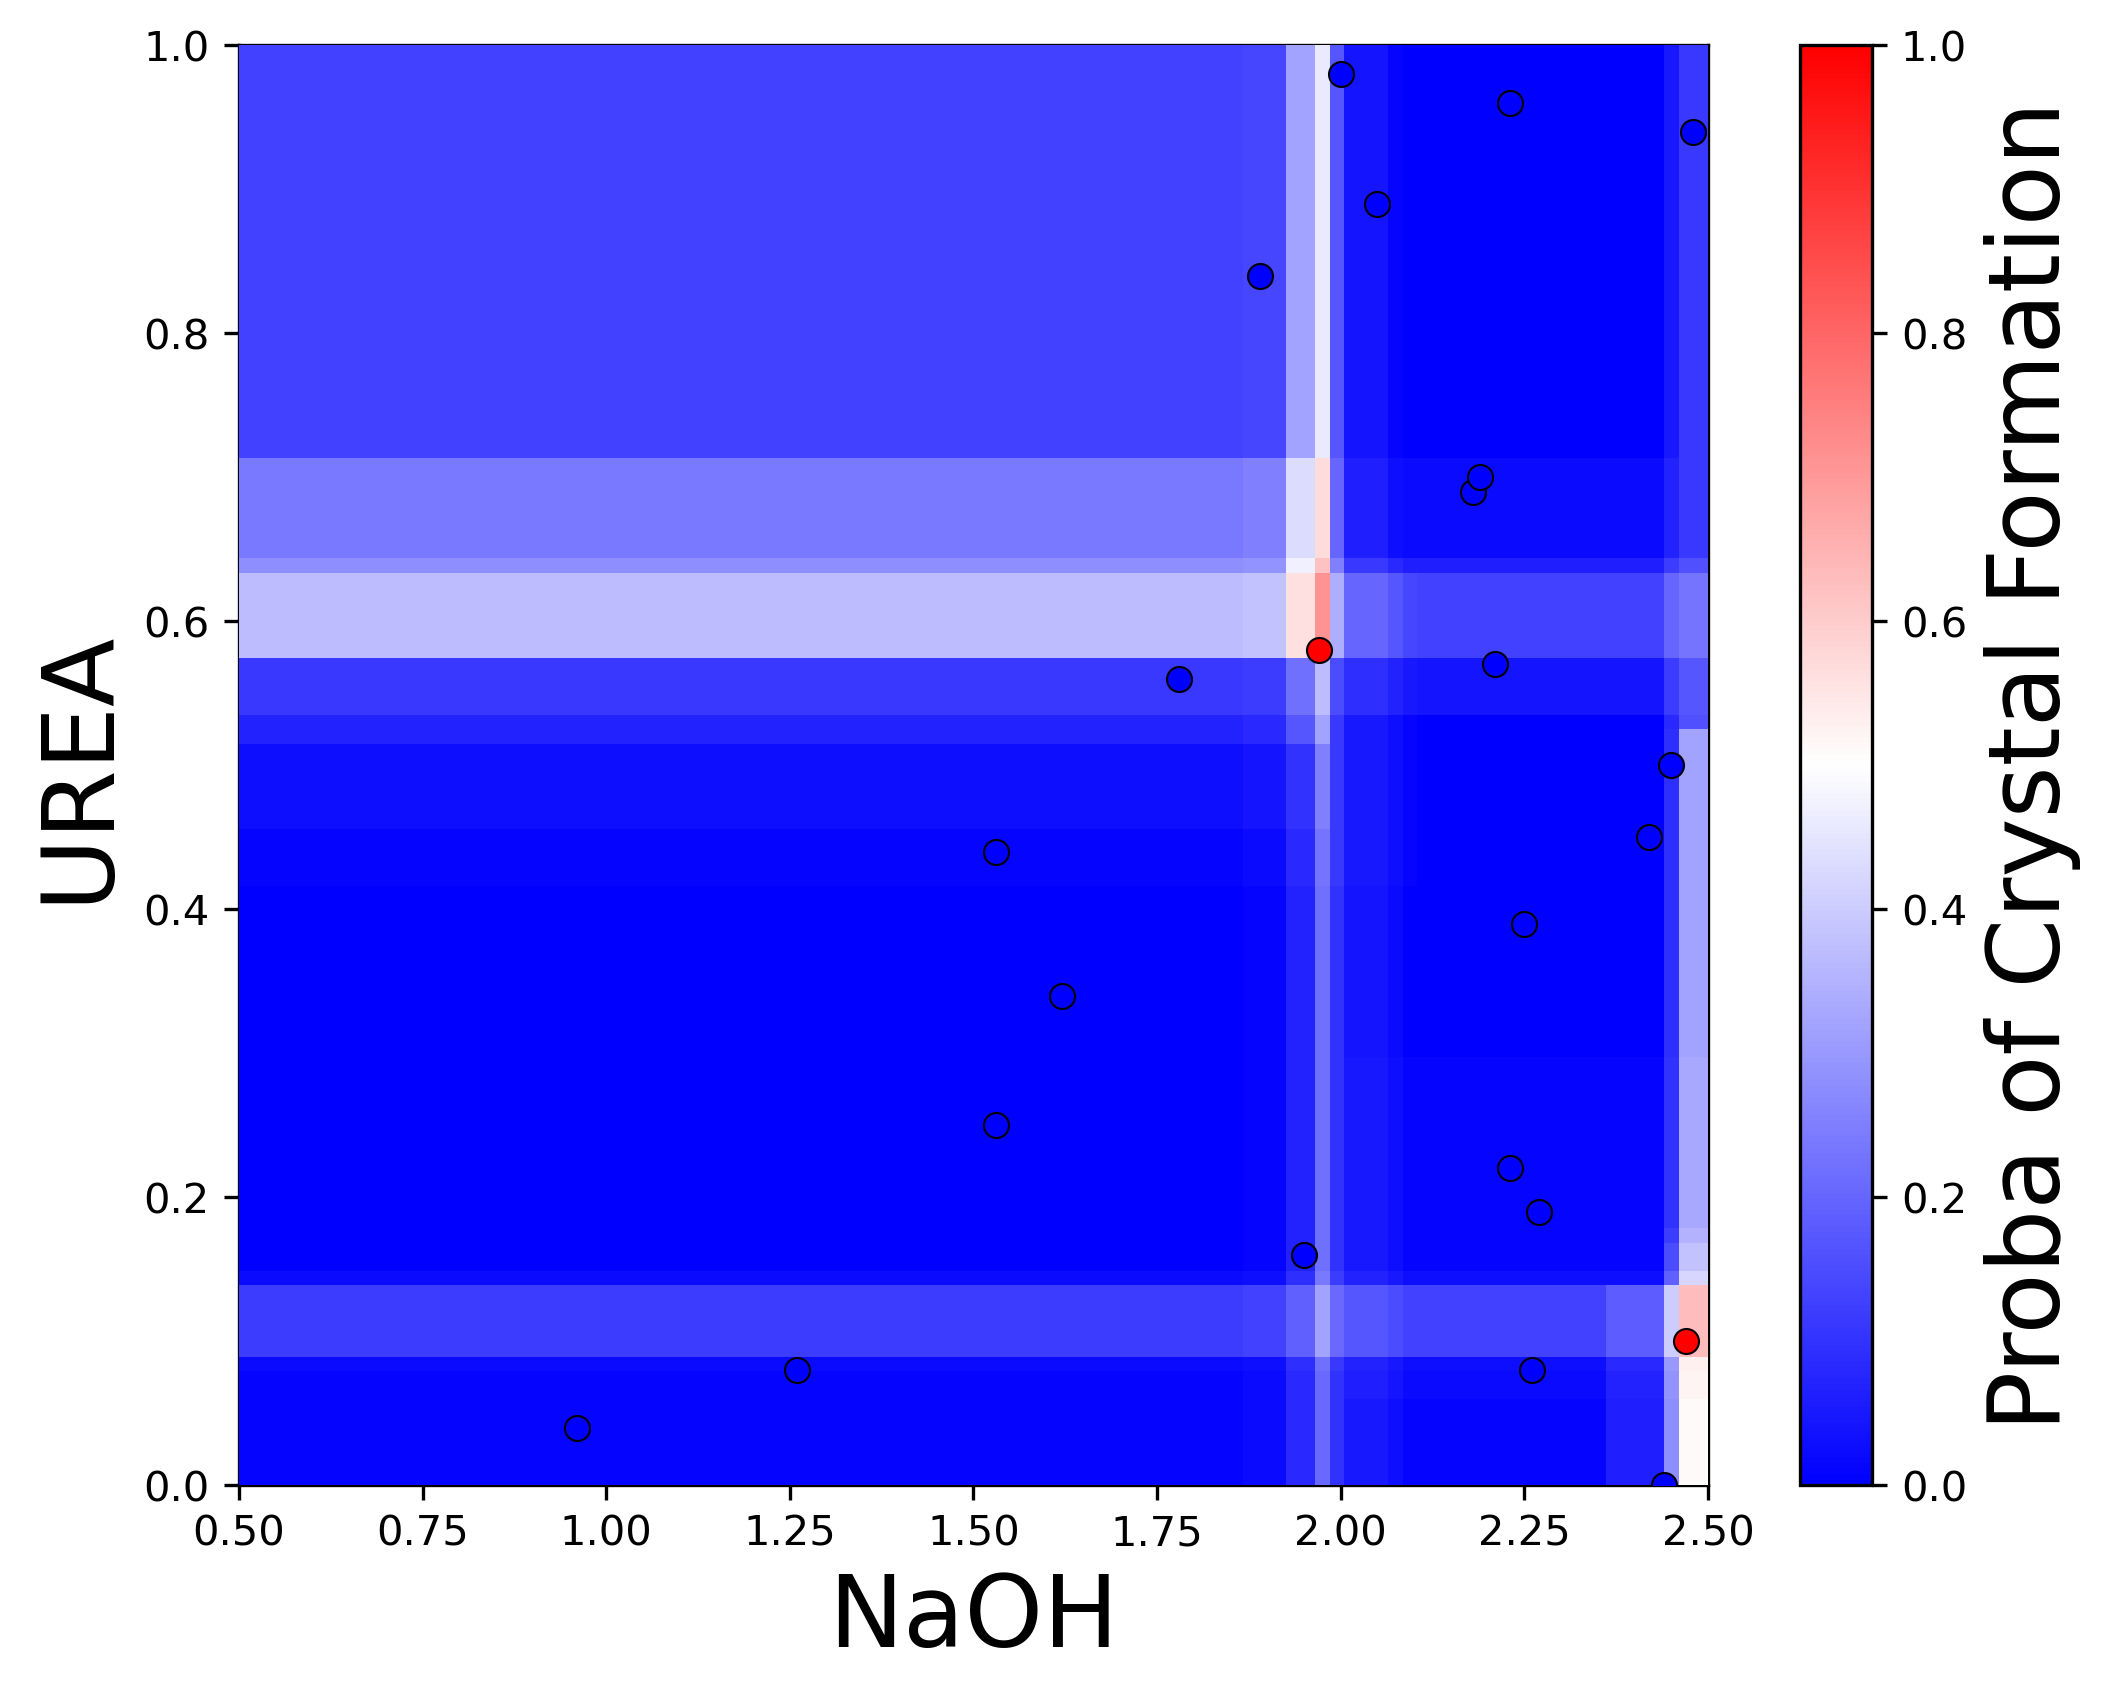

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.semi_supervised import LabelSpreading
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
os.mkdir("Slicing Diagram")
os.chdir("Slicing Diagram")
data = []
X_p = []
for p in range(101):
    for q in range(101):
        X_p.append([0.5+p*0.02,q*0.01])
X_p = np.array(X_p)
LS_model = LabelSpreading()
RF_model = RandomForestClassifier()
for i in range(4):
    for j in range(4):
        data_temp = []
        Y_temp = []
        for p in range(len(data_train_num)):
            if data_train_num[p][1] == i+1 and data_train_num[p][2] == j+1:
                data_temp.append(X_train[p])
                Y_temp.append(data_train_num[p][0])
        data_temp = np.array(data_temp)
        Y_temp = np.array(Y_temp)
        X_temp = data_temp[:,-2:]
        data_temp_T = []
        for p in range(len(data_train_num)):
            if data_train_num[p][0] == True and data_train_num[p][1] == i+1 and data_train_num[p][2] == j+1:
                data_temp_T.append(X_train[p])
        data_temp_T = np.array(data_temp_T)
        data_temp_F = []
        for p in range(len(data_train_num)):
            if data_train_num[p][0] == False and data_train_num[p][1] == i+1 and data_train_num[p][2] == j+1:
                data_temp_F.append(X_train[p])
        data_temp_F = np.array(data_temp_F)
        data_test_temp = []
        data_test_true = []
        for p in range(len(data_test_num)):
            if data_test_num[p][1] == i+1 and data_test_num[p][2] == j+1:
                data_test_temp.append(X_test[p])
                data_test_true.append(data_test_num[p][0])
        data_test_temp = np.array(data_test_temp)
        data_test_true = np.array(data_test_true)
        X_test_temp = data_test_temp[:,-2:]

        
        # LabelSpreading predict
        LS_model.fit(X_temp, Y_temp)
        LS_score_temp = LS_model.predict_proba(X_p)
        fig = plt.figure(figsize=(7.2,6), dpi=300)
        ax = fig.add_axes([0.12, 0.12, 0.85, 0.8])
        im = ax.imshow(np.transpose(LS_score_temp.T[1].reshape([101,101])), cmap='bwr', origin='lower', aspect='auto', 
                       extent=[0.5,2.5,0.0,1.0], vmin=0.0, vmax=1.0, zorder=5)
        cb = plt.colorbar(im)
        cb.set_label('Proba of Crystal Formation', fontsize=24)
        ax.set_xlabel("NaOH", fontsize=24)
        ax.set_ylabel("UREA", fontsize=24)
        ax.scatter(data_temp_T.T[3], data_temp_T.T[4], edgecolors='black', linewidths=0.5, c='red', zorder=10)
        ax.scatter(data_temp_F.T[3], data_temp_F.T[4], edgecolors='black', linewidths=0.5, c='blue', zorder=10)
        pic_name = "LS_Slicing" + str(i+1) + str(j+1) + ".png"
        plt.savefig(pic_name, dpi = 300)


        LS_data_test_pre = LS_model.predict(X_test_temp)
        LS_confu_mat_temp = confusion_matrix(data_test_true, LS_data_test_pre)
        print("LS",i+1,j+1)
        print("X_real:",data_test_true)
        print("X_pre:",LS_data_test_pre)
        print("confusion_matrix:",LS_confu_mat_temp)


        # RandomForest predict
        RF_model.fit(X_temp, Y_temp)
        RF_score_temp = RF_model.predict_proba(X_p)
        fig = plt.figure(figsize=(7.2,6), dpi=300)
        ax = fig.add_axes([0.12, 0.12, 0.85, 0.8])
        im = ax.imshow(np.transpose(RF_score_temp.T[1].reshape([101,101])), cmap='bwr', origin='lower', aspect='auto', 
                       extent=[0.5,2.5,0.0,1.0], vmin=0.0, vmax=1.0, zorder=5)
        cb = plt.colorbar(im)
        cb.set_label('Proba of Crystal Formation', fontsize=24)
        ax.set_xlabel("NaOH", fontsize=24)
        ax.set_ylabel("UREA", fontsize=24)
        ax.scatter(data_temp_T.T[3], data_temp_T.T[4], edgecolors='black', linewidths=0.5, c='red', zorder=10)
        ax.scatter(data_temp_F.T[3], data_temp_F.T[4], edgecolors='black', linewidths=0.5, c='blue', zorder=10)
        pic_name = "RF_Slicing" + str(i+1) + str(j+1) + ".png"
        plt.savefig(pic_name, dpi = 300)


        RF_data_test_pre = RF_model.predict(X_test_temp)
        RF_confu_mat_temp = confusion_matrix(data_test_true, RF_data_test_pre)
        print("RF",i+1,j+1)
        print("X_real:",data_test_true)
        print("X_pre:",RF_data_test_pre)
        print("confusion_matrix:",RF_confu_mat_temp)